In [23]:
#piece of code that hides code cells
import ipywidgets as widgets
from IPython.display import display, HTML

javascript_functions = {False: "hide()", True: "show()"}
button_descriptions  = {False: "Show code", True: "Hide code"}

def toggle_code(state):
    """
    Toggles the JavaScript show()/hide() function on the div.input element.
    """
    output_string = "<script>$(\"div.input\").{}</script>"
    output_args   = (javascript_functions[state],)
    output        = output_string.format(*output_args)
    display(HTML(output))


def button_action(value):
    """
    Calls the toggle_code function and updates the button description.
    """
    state = value.new
    toggle_code(state)
    value.owner.description = button_descriptions[state]
state = False
toggle_code(state)
button = widgets.ToggleButton(state, description = button_descriptions[state])
button.observe(button_action, "value")
display(button)

ToggleButton(value=False, description='Show code')

In [24]:
import math as m
import numpy as np
import copy as copy
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import itertools
from operator import itemgetter,add
import scipy as scipy
from scipy import linalg,special,interpolate,signal
import pickle
import scipy.sparse.linalg as SLA
from pylab import *
import sys as sys
import matplotlib.patches as patch
from mpl_toolkits.mplot3d import Axes3D
localtime = time.asctime( time.localtime(time.time()) )

In [25]:
# set up dictionary of parameters: key=Z val=[n,l,ml,Hii,alpha]         Hoffmann parameters used

#this is a dictionary of single zeta values - only for debugging purposes
parameters_sz={1:[1,0,-13.6,1.3],                                           #H
       2:[2,0,-23.4,1.688],                                              #He
       3:[[2,0,-5.4,0.650],[2,1,-3.5,0.65]],                             #Li
       4:[[2,0,-10.0,0.975],[2,1,-6.0,0.975]],                           #Be
       5:[[2,0,-15.2,1.300],[2,1,-8.5,1.300]],                           #B
       6:[[2,0,-21.4,1.625],[2,1,-11.4,1.625]],                          #C
       7:[[2,0,-26.0,2.140],[2,1,-13.4,1.950]],                          #N
       8:[[2,0,-32.3,2.275],[2,1,-14.8,2.275]],                          #O
       9:[[2,0,-40.0,2.425],[2,1,-18.1,2.425]],                          #F
       10:[[2,0,-43.2,2.879],[2,1,-20.0,2.879]],                         #Ne
       11:[[3,0,-5.1,0.733],[3,1,-3.0,0.733]],                           #Na
       12:[[3,0,-9.0,1.100],[3,1,-4.5,1.100]],                           #Mg
       13:[[3,0,-12.3,1.167],[3,1,-6.5,1.167]],                          #Al
       14:[[3,0,-17.3,1.383],[3,1,-9.2,1.383]],                          #Si
       15:[[3,0,-18.6,1.750],[3,1,-14.0,1.300]],                         #P
       16:[[3,0,-20.0,2.122],[3,1,-13.3,1.827]],                         #S
       17:[[3,0,-26.3,2.183],[3,1,-14.2,1.733]],                         #Cl
       18:[[3,0,-27.63,2.585],[3,1,-15.76,2.255]],                       #Ar
       19:[[4,0,-4.34,0.874],[4,1,-2.73,0.874]],                         #K
       20:[[4,0,-7.0,1.2],[4,1,-4.0,1.2]],                               #Ca
       21:[[4,0,-8.87,1.3],[4,1,-2.75,1.3],[3,2,-8.51,4.34]],            #Sc 3d
       22:[[4,0,-8.97,1.075],[4,1,-5.44,0.675],[3,2,-10.81,4.55]],       #Ti 3d
       23:[[4,0,-8.81,1.3],[4,1,-5.52,1.30],[3,2,-11.00,4.75]],          #V 3d
       24:[[4,0,-8.66,1.7],[4,1,-5.24,1.7],[3,2,-11.22,4.95]],           #Cr 3d
       25:[[4,0,-9.75,1.8],[4,1,-5.89,1.80],[3,2,-11.67,5.15]],          #Mn 3d
       26:[[4,0,-9.10,1.9],[4,1,-5.32,1.90],[3,2,-12.60,5.35],],         #Fe 3d
       27:[[4,0,-9.21,2.00],[4,1,-5.29,2.00],[3,2,-13.18,5.55]],         #Co 3d
       28:[[4,0,-9.17,1.825],[4,1,5.15,1.125],[3,2,-13.49,5.75]],        #Ni 3d
       29:[[4,0,-11.40,2.20],[4,1,-6.06,2.20],[3,2,-14.00,5.95]],        #Cu 3d
       30:[[4,0,-12.40,2.01],[4,1,-6.53,1.70],[3,2,-21.30,0.00]],        #Zn 3d
       31:[[4,0,-14.58,1.77],[4,1,-6.75,1.55]],                          #Ga 4p
       32:[[4,0,-16.00,2.16],[4,1,-9.00,1.85]],                          #Ge 4p
       33:[[4,0,-16.22,2.23],[4,1,-12.16,1.89]],                         #As 4p
       34:[[4,0,-20.50,2.44],[4,1,-14.40,2.07]],                         #Se 4p
       35:[[4,0,-22.07,2.588],[4,1,-13.10,2.131]],                       #Br 4p
       36:[[4,0,-24.36,2.829],[4,1,-13.99,2.442]],                       #Kr 4p
       37:[[5,0,-4.180,0.997],[5,1,-2.60,0.997]],                        #Rb 5s
       38:[[5,0,-6.620,1.214],[5,1,-3.92,1.214]],                        #Sr 5s
       39:[[5,0,0.00,0.000],[5,1,0.000,0.00],[4,2,0.000,0.00]],          #Y  4d
       40:[[5,0,-8.000,1.817],[5,1,-5.40,1.776],[4,2,-10.20,3.83]],      #Zr 4d
       41:[[5,0,-10.10,1.890],[5,1,-6.86,1.85],[4,2,-12.10,4.08]],       #Nb 4d
       42:[[5,0,-8.340,1.96],[5,1,-5.24,1.90],[4,2,-10.50,4.54]],        #Mo 4d
       43:[[5,0,-10.07,2.018],[5,1,-5.40,1.984],[4,2,-12.82,4.90]],      #Tc 4d
       44:[[5,0,-10.40,2.08],[5,1,-6.87,2.04],[4,2,-14.90,5.38]],        #Ru 4d
       45:[[5,0,-8.090,2.135],[5,1,-4.57,2.10],[4,2,-12.50,4.29]],       #Rh 4d
       46:[[5,0,-7.320,2.19],[5,1,-3.75,2.152],[4,2,-12.02,5.983]],      #Pd 4d
       47:[[5,0,0.0000,0.00],[5,1,0.00,0.00],[4,2,0.00,0.00]],           #Ag 4d
       48:[[5,0,0.0000,0.000],[5,1,0.00,0.00],[4,2,0.00,0.00]],          #Cd 4d
       79:[[6,0,-10.92,2.6020],[6,1,-5.50,2.5840],[5,2,-15.076,6.1630]], #Au 5d
       179:[[6,0,-10.92,2.6020]], #Au 5d
       } 

#these are Hoffmann's parameters - appropriate for molecular calculations but will lead to convergence issues
#if used in the solid state
#note the tuple (exponent,coefficient) as the last entry. For s and p this is redundant for Hoffmann parameters
#as coefficient is always 1, but it is in place here to be compatible with Cerda's parameters where the
#p orbitals are sometimes double zeta as well as d.
Hoffmann={1:[1,0,-13.6,(1.3,1.)],                                           #H
       2:[2,0,-23.4,(1.688,1.)],                                              #He
       3:[[2,0,-5.4,(0.650,1.)],[2,1,-3.5,(0.65,1.)]],                             #Li
       4:[[2,0,-10.0,(0.975,1.)],[2,1,-6.0,(0.975,1.)]],                           #Be
       5:[[2,0,-15.2,(1.300,1.)],[2,1,-8.5,(1.300,1.)]],                           #B
       6:[[2,0,-21.4,(1.625,1.)],[2,1,-11.4,(1.625,1.)]],                          #C
       7:[[2,0,-26.0,(2.140,1.)],[2,1,-13.4,(1.950,1.)]],                          #N
       8:[[2,0,-32.3,(2.275,1.)],[2,1,-14.8,(2.275,1.)]],                          #O
       9:[[2,0,-40.0,(2.425,1.)],[2,1,-18.1,(2.425,1.)]],                          #F
       10:[[2,0,-43.2,(2.879,1.)],[2,1,-20.0,(2.879,1.)]],                         #Ne
       11:[[3,0,-5.1,(0.733,1.)],[3,1,-3.0,(0.733,1.)]],                           #Na
       12:[[3,0,-9.0,(1.100,1.)],[3,1,-4.5,(1.100,1.)]],                           #Mg
       13:[[3,0,-12.3,(1.167,1.)],[3,1,-6.5,(1.167,1.)]],                          #Al
       14:[[3,0,-17.3,(1.383,1.)],[3,1,-9.2,(1.383,1.)]],                          #Si
       15:[[3,0,-18.6,(1.750,1.)],[3,1,-14.0,(1.600,1.)]],                         #P
       16:[[3,0,-20.0,(2.122,1.)],[3,1,-13.3,(1.827,1.)]],                         #S
       17:[[3,0,-26.3,(2.183,1.)],[3,1,-14.2,(1.733,1.)]],                         #Cl
       18:[[3,0,-27.63,(2.585,1.)],[3,1,-15.76,(2.255,1.)]],                       #Ar
       19:[[4,0,-4.34,(0.874,1.)],[4,1,-2.73,(0.874,1.)]],                         #K
       20:[[4,0,-7.0,(1.2,1.)],[4,1,-4.0,(1.2,1.)]],                               #Ca
       21:[[4,0,-8.87,(1.3,1.)],[4,1,-2.75,(1.3,1.)],[3,2,-8.51,((4.35,0.422783),(1.70,0.72757))]],            #Sc 3d
       22:[[4,0,-8.97,(1.075,1.)],[4,1,-5.44,(0.675,1.)],[3,2,-10.81,((4.55,0.420607),(1.40,0.783913))]],       #Ti 3d
       23:[[4,0,-8.81,(1.3,1.)],[4,1,-5.52,(1.30,1.)],[3,2,-11.00,((4.75,0.475509),(1.70,0.705213))]],     #     #V 3d
       24:[[4,0,-8.66,(1.7,1.)],[4,1,-5.24,(1.7,1.)],[3,2,-11.22,((4.95,0.505792),(1.80,0.674723))]],           #Cr 3d
       25:[[4,0,-9.75,(1.8,1.)],[4,1,-5.89,(1.80,1.)],[3,2,-11.67,((5.15,0.513906),(1.70,0.692909))]],          #Mn 3d
       26:[[4,0,-9.10,(1.9,1.)],[4,1,-5.32,(1.90,1.)],[3,2,-12.60,((5.35,0.5505),(2.00,0.626))]],         #Fe 3d
       27:[[4,0,-9.21,(2.00,1.)],[4,1,-5.29,(2.00,1.)],[3,2,-13.18,((5.55,0.567865),(2.10,0.605856))]],         #Co 3d
       28:[[4,0,-9.17,(1.825,1.)],[4,1,-5.15,(1.125,1.)],[3,2,-13.49,((5.75,0.549306),(2.30,0.60817))]],        #Ni 3d
       29:[[4,0,-11.40,(2.20,1.)],[4,1,-6.06,(2.20,1.)],[3,2,-14.00,((5.95,0.593322),(2.30,0.574421))]],        #Cu 3d
       30:[[4,0,-12.96,(2.37,1.)],[4,1,-9.23,(1.63,0.42)],[3,2,-18.03,((3.565,0.87781),(2.01,0.1554))]],                          #Zn 4p
       31:[[4,0,-14.58,(1.77,1.)],[4,1,-6.75,(1.55,1.)]],                          #Ga 4p
       32:[[4,0,-16.00,(2.16,1.)],[4,1,-9.00,(1.85,1.)]],                          #Ge 4p
       33:[[4,0,-16.22,(2.23,1.)],[4,1,-12.16,(1.89,1.)]],                         #As 4p
       34:[[4,0,-20.50,(2.44,1.)],[4,1,-14.40,(2.07,1.)]],                         #Se 4p
       35:[[4,0,-22.07,(2.588,1.)],[4,1,-13.10,(2.131,1.)]],                       #Br 4p
       36:[[4,0,-24.36,(2.829,1.)],[4,1,-13.99,(2.442,1.)]],                       #Kr 4p
       37:[[5,0,-4.180,(0.997,1.)],[5,1,-2.60,(0.997,1.)]],                        #Rb 5s
       38:[[5,0,-6.620,(1.214,1.)],[5,1,-3.92,(1.214,1.)]],                        #Sr 5s
       39:[[5,0,-5.337,(1.279,1.)],[5,1,-3.515,(1.079,1.)],[4,2,-6.799,((2.554,0.601963),(1.068,0.577964))]],          #Y  4d  Muller (nb energies rather diff from Hoffman)
       40:[[5,0,-9.87,(1.817,1.)],[5,1,-6.76,(1.776,1.)],[4,2,-11.18,((3.835,0.622416),(1.505,0.578216))]],      #Zr 4d
       41:[[5,0,-10.10,(1.890,1.)],[5,1,-6.86,(1.85,1.)],[4,2,-12.10,((4.08,0.640101),(1.64,0.551601))]],       #Nb 4d
       42:[[5,0,-8.340,(1.96,1.)],[5,1,-5.24,(1.90,1.)],[4,2,-10.50,((4.54,0.589879),(1.9,0.589879))]],        #Mo 4d
       43:[[5,0,-10.07,(2.018,1.)],[5,1,-5.40,(1.984,1.)],[4,2,-12.82,((4.9,0.5715),(2.094,0.6012))]],      #Tc 4d
       44:[[5,0,-10.40,(2.08,1.)],[5,1,-6.87,(2.04,1.)],[4,2,-14.90,((5.38,0.534242),(2.3,0.636789))]],        #Ru 4d
       45:[[5,0,-8.090,(2.135,1.)],[5,1,-4.57,(2.10,1.)],[4,2,-12.50,((4.29,0.580698),(1.97,0.568498))]],       #Rh 4d
       46:[[5,0,-7.320,(2.19,1.)],[5,1,-3.75,(2.152,1.)],[4,2,-12.02,((5.983,0.526436),(2.613,0.637334))]],      #Pd 4d
       47:[[5,0,-7.054,(1.662,1.)],[5,1,-4.133,(1.397,1.)],[4,2,-19.24,((3.912,0.824441),(1.545,0.328777))]],    #Ag 4d  taken from Muller parameterisation in ATK
       48:[[5,0,-7.242,(1.706,1.)],[5,1,-4.196,(1.432,1.)],[4,2,-20.78,((4.094,0.823957),(1.64,0.324983))]],      #Cd  Muller                                               #Cd 4d
       78:[[6,0,-9.077,(2.554,1.)],[6,1,-5.475,(2.554,1.)],[5,2,-12.59,((6.013,0.633378),(2.696,0.551281))]],
       79:[[6,0,-10.92,(2.6020,1.)],[6,1,-5.50,(2.5040,1.)],[5,2,-15.07,((6.163,0.644177),(2.794,0.535576))]],   #nb p exponent slightly different from literature to avoid singularities in linear chain
       179:[6,0,-10.92,(2.6020,1.)], #special Au 6s only for electrodes
       } 


#Muller's parameter set: note, most of these are still Hoffmann for now - need to change them
Muller={1:[1,0,-13.6,(1.3,1.)],                                           #H
       2:[2,0,-23.4,(1.688,1.)],                                              #He
       3:[[2,0,-5.4,(0.650,1.)],[2,1,-3.5,(0.65,1.)]],                             #Li
       4:[[2,0,-10.0,(0.975,1.)],[2,1,-6.0,(0.975,1.)]],                           #Be
       5:[[2,0,-15.2,(1.300,1.)],[2,1,-8.5,(1.300,1.)]],                           #B
       6:[[2,0,-21.4,(1.625,1.)],[2,1,-11.4,(1.625,1.)]],                          #C
       7:[[2,0,-26.0,(2.140,1.)],[2,1,-13.4,(1.950,1.)]],                          #N
       8:[[2,0,-32.3,(2.275,1.)],[2,1,-14.8,(2.275,1.)]],                          #O
       9:[[2,0,-40.0,(2.425,1.)],[2,1,-18.1,(2.425,1.)]],                          #F
       10:[[2,0,-43.2,(2.879,1.)],[2,1,-20.0,(2.879,1.)]],                         #Ne
       11:[[3,0,-5.1,(0.733,1.)],[3,1,-3.0,(0.733,1.)]],                           #Na
       12:[[3,0,-9.0,(1.100,1.)],[3,1,-4.5,(1.100,1.)]],                           #Mg
       13:[[3,0,-12.3,(1.167,1.)],[3,1,-6.5,(1.167,1.)]],                          #Al
       14:[[3,0,-17.3,(1.383,1.)],[3,1,-9.2,(1.383,1.)]],                          #Si
       15:[[3,0,-18.6,(1.750,1.)],[3,1,-14.0,(1.600,1.)]],                         #P
       16:[[3,0,-20.0,(2.122,1.)],[3,1,-13.3,(1.827,1.)]],                         #S
       17:[[3,0,-26.3,(2.183,1.)],[3,1,-14.2,(1.733,1.)]],                         #Cl
       18:[[3,0,-27.63,(2.585,1.)],[3,1,-15.76,(2.255,1.)]],                       #Ar
       19:[[4,0,-4.34,(0.874,1.)],[4,1,-2.73,(0.874,1.)]],                         #K
       20:[[4,0,-7.0,(1.2,1.)],[4,1,-4.0,(1.2,1.)]],                               #Ca
       21:[[4,0,-8.87,(1.3,1.)],[4,1,-2.75,(1.3,1.)],[3,2,-8.51,((4.35,0.422783),(1.70,0.72757))]],            #Sc 3d
       22:[[4,0,-8.97,(1.075,1.)],[4,1,-5.44,(0.675,1.)],[3,2,-10.81,((4.55,0.420607),(1.40,0.783913))]],       #Ti 3d
       23:[[4,0,-8.81,(1.3,1.)],[4,1,-5.52,(1.30,1.)],[3,2,-11.00,((4.75,0.475509),(1.70,0.705213))]],     #     #V 3d
       24:[[4,0,-8.66,(1.7,1.)],[4,1,-5.24,(1.7,1.)],[3,2,-11.22,((4.95,0.505792),(1.80,0.674723))]],           #Cr 3d
       25:[[4,0,-9.75,(1.8,1.)],[4,1,-5.89,(1.80,1.)],[3,2,-11.67,((5.15,0.513906),(1.70,0.692909))]],          #Mn 3d
       26:[[4,0,-9.10,(1.9,1.)],[4,1,-5.32,(1.90,1.)],[3,2,-12.60,((5.35,0.5505),(2.00,0.626))]],         #Fe 3d
       27:[[4,0,-9.21,(2.00,1.)],[4,1,-5.29,(2.00,1.)],[3,2,-13.18,((5.55,0.567865),(2.10,0.605856))]],         #Co 3d
       28:[[4,0,-9.17,(1.825,1.)],[4,1,-5.15,(1.125,1.)],[3,2,-13.49,((5.75,0.549306),(2.30,0.60817))]],        #Ni 3d
       29:[[4,0,-11.40,(2.20,1.)],[4,1,-6.06,(2.20,1.)],[3,2,-14.00,((5.95,0.593322),(2.30,0.574421))]],        #Cu 3d
       30:[[4,0,-12.96,(2.37,1.)],[4,1,-9.23,(1.63,0.42)],[3,2,-18.03,((3.565,0.87781),(2.01,0.1554))]],                          #Zn 4p
       31:[[4,0,-14.58,(1.77,1.)],[4,1,-6.75,(1.55,1.)]],                          #Ga 4p
       32:[[4,0,-15.158,(2.024,1.)],[4,1,-7.329,(1.55,1.)]],                          #Ge 4p
       33:[[4,0,-16.22,(2.23,1.)],[4,1,-12.16,(1.89,1.)]],                         #As 4p
       34:[[4,0,-20.50,(2.44,1.)],[4,1,-14.40,(2.07,1.)]],                         #Se 4p
       35:[[4,0,-22.07,(2.588,1.)],[4,1,-13.10,(2.131,1.)]],                       #Br 4p
       36:[[4,0,-24.36,(2.829,1.)],[4,1,-13.99,(2.442,1.)]],                       #Kr 4p
       37:[[5,0,-4.180,(0.997,1.)],[5,1,-2.60,(0.997,1.)]],                        #Rb 5s
       38:[[5,0,-6.620,(1.214,1.)],[5,1,-3.92,(1.214,1.)]],                        #Sr 5s
       39:[[5,0,-5.337,(1.279,1.)],[5,1,-3.515,(1.079,1.)],[4,2,-6.799,((2.554,0.601963),(1.068,0.577964))]],          #Y  4d  Muller (nb energies rather diff from Hoffman)
       40:[[5,0,-9.87,(1.817,1.)],[5,1,-6.76,(1.776,1.)],[4,2,-11.18,((3.835,0.622416),(1.505,0.578216))]],      #Zr 4d
       41:[[5,0,-10.10,(1.890,1.)],[5,1,-6.86,(1.85,1.)],[4,2,-12.10,((4.08,0.640101),(1.64,0.551601))]],       #Nb 4d
       42:[[5,0,-8.340,(1.96,1.)],[5,1,-5.24,(1.90,1.)],[4,2,-10.50,((4.54,0.589879),(1.9,0.589879))]],        #Mo 4d
       43:[[5,0,-10.07,(2.018,1.)],[5,1,-5.40,(1.984,1.)],[4,2,-12.82,((4.9,0.5715),(2.094,0.6012))]],      #Tc 4d
       44:[[5,0,-10.40,(2.08,1.)],[5,1,-6.87,(2.04,1.)],[4,2,-14.90,((5.38,0.534242),(2.3,0.636789))]],        #Ru 4d
       45:[[5,0,-8.090,(2.135,1.)],[5,1,-4.57,(2.10,1.)],[4,2,-12.50,((4.29,0.580698),(1.97,0.568498))]],       #Rh 4d
       46:[[5,0,-7.320,(2.19,1.)],[5,1,-3.75,(2.152,1.)],[4,2,-12.02,((5.983,0.526436),(2.613,0.637334))]],      #Pd 4d
       47:[[5,0,-7.054,(1.662,1.)],[5,1,-4.133,(1.397,1.)],[4,2,-19.24,((3.912,0.824441),(1.545,0.328777))]],    #Ag 4d  taken from Muller parameterisation in ATK
       48:[[5,0,-7.242,(1.706,1.)],[5,1,-4.196,(1.432,1.)],[4,2,-20.78,((4.094,0.823957),(1.64,0.324983))]],      #Cd  Muller                                               #Cd 4d
       78:[[6,0,-9.077,(2.554,1.)],[6,1,-5.475,(2.554,1.)],[5,2,-12.59,((6.013,0.633378),(2.696,0.551281))]],
       79:[[6,0,-10.92,(2.6020,1.)],[6,1,-5.50,(2.5040,1.)],[5,2,-15.07,((6.163,0.644177),(2.794,0.535576))]],   #nb p exponent slightly different from literature to avoid singularities in linear chain
       179:[6,0,-10.92,(2.6020,1.)], #special Au 6s only for electrodes
       } 




#Cerda's parameters specifically for solid state
#Accurate and transferable EHT tight binding parameters, PRB, 2000, 61, 7965. J Cerda and F. Soria
#(only available for the TMs and selected main group). Otherwise I have used the Hoffmann parameters
#note that coefficients < 1.0 for some of the s and p states even though there is only one component. 
#This is justified because they are in fact 'double zeta' in character even though only one component is given. 
#However the other (more contracted) component makes not contribution to diatomic overlap as it is too contracted,
#so its coefficient is in any case irrelevant. So it is ignored here. 

Cerda={1:[1,0,-17.84,(0.87223,0.50494)],                                           #H
       2:[2,0,-23.4,(1.688,1.)],                                              #He
       3:[[2,0,-5.4,(0.650,1.)],[2,1,-3.5,(0.65,1.)]],                             #Li
       4:[[2,0,-10.0,(0.975,1.)],[2,1,-6.0,(0.975,1.)]],                           #Be
       5:[[2,0,-21.7174,(1.60645,0.66811)],[2,1,-14.1676,(1.63627,0.99022)]],                           #B                          #C
       6:[[2,0,-19.8892,(2.0249,0.76422)],[2,1,-13.08,((2.17687,0.7389),(1.269,0.177))]],  
       7:[[2,0,-26.4216,(2.74251,1.)],[2,1,-17.0156,(2.26145,1.)]],                          #N
       8:[[2,0,-27.06782,(2.56634,1.)],[2,1,-13.25162,(2.0,1.)]],                          #O
       9:[[2,0,-40.0,(2.425,1.)],[2,1,-18.1,(2.425,1.)]],                          #F
       10:[[2,0,-43.2,(2.879,1.)],[2,1,-20.0,(2.879,1.)]],                         #Ne
       11:[[3,0,-5.1,(1.40,0.7)],[3,1,-3.0,(1.15,0.75)]],                           #Na
       12:[[3,0,-9.0,(1.50,0.7)],[3,1,-4.5,(1.20,0.75)]],                           #Mg
       13:[[3,0,-13.133,(1.657,0.749)],[3,1,-8.525,((1.312,0.750),(4.679,0.492))]], #Al #,[3,2,-5.141,((4.245,0.717),(0.860,0.609))]],                         #Al
       14:[[3,0,-18.137,(1.864,0.720)],[3,1,-11.277,((1.813,0.705),(1.470,0.303))],[3,2,-5.336,((1.705,0.485),(0.675,0.671))]],
       14:[[3,0,-18.029,(1.780,0.657)],[3,1,-11.820,(1.614,0.818)]],                       #Si
       15:[[3,0,-20.24,(2.131,0.769)],[3,1,-12.437,((1.859,0.633),(2.479,0.384))]],                         #P
       16:[[3,0,-20.0,(2.122,0.8)],[3,1,-13.3,(1.827,0.70)]],                         #S
       17:[[3,0,-26.3,(2.183,1.)],[3,1,-14.2,(1.733,1.)]],                         #Cl
       18:[[3,0,-27.63,(2.585,1.)],[3,1,-15.76,(2.255,1.)]],                       #Ar
       19:[[4,0,-4.34,(0.874,0.65)],[4,1,-2.73,(0.874,0.65)]],                         #K  #changed weights from 1 to 0.65 (K not given in Cerda's tables)
       20:[[4,0,-7.0,(1.2,1.)],[4,1,-4.0,(1.2,1.)]],                               #Ca
       21:[[4,0,-8.419,(1.325,0.575)],[4,1,-5.989,(1.111,0.624)],[3,2,-8.391,((4.172,0.690),(1.332,0.527))]],            #Sc 3d
       22:[[4,0,-7.879,(1.337,0.707)],[4,1,-5.950,(1.135,0.617)],[3,2,-8.943,((4.760,0.695),(1.464,0.532))]],       #Ti 3d
       23:[[4,0,-8.40,(1.37,0.72)],[4,1,-6.1,(1.18,0.620)],[3,2,-9.8,((4.70,0.70),(1.56,0.52))]], #V 3d nb V not given in Cerda's paper - I have interpolated between Ti and Cr 
       24:[[4,0,-8.492,(1.426,0.753)],[4,1,-6.269,(1.210,0.632)],[3,2,-10.635,((4.688,0.683),(1.676,0.502))]],           #Cr 3d
       25:[[4,0,-8.906,(1.468,0.725)],[4,1,-6.630,(1.233,0.625)],[3,2,-11.162,((4.534,0.720),(1.683,0.447))]],          #Mn 3d
       26:[[4,0,-8.994,(1.594,0.777)],[4,1,-6.177,(1.315,0.658)],[3,2,-11.323,((4.845,0.730),(1.755,0.442))]],         #Fe 3d
       27:[[4,0,-9.543,(1.561,0.665)],[4,1,-6.685,(1.282,0.616)],[3,2,-11.689,((4.765,0.769),(1.724,0.393))]],         #Co 3d
       28:[[4,0,-9.523,(1.616,0.691)],[4,1,-6.553,(1.307,0.630)],[3,2,-11.744,((5.238,0.785),(1.775,0.392))]],        #Ni 3d
       29:[[4,0,-10.563,(1.704,0.614)],[4,1,-6.78,(1.340,0.648)],[3,2,-12.896,((6.770,0.842),(1.855,0.367))]],        #Cu 3d
       30:[[4,0,-12.96,(2.366,1.)],[4,1,-9.23,(1.63,0.4167)]],                          #Zn 4p
       31:[[4,0,-17.629,(2.041,0.662)],[4,1,-10.766,((5.835,0.596),(1.616,0.705))]],   #Ga 4p 
       32:[[4,0,-16.00,(2.16,1.)],[4,1,-9.00,(1.85,1.)]],                          #Ge 4p
       33:[[4,0,-21.764,(2.344,0.634)],[4,1,-12.822,((7.588,0.539),(2.102,0.753))]],                        #As 4p
       34:[[4,0,-20.50,(2.44,1.)],[4,1,-14.40,(2.07,1.)]],                         #Se 4p
       35:[[4,0,-22.07,(2.588,1.)],[4,1,-13.10,(2.131,1.)]],                       #Br 4p
       36:[[4,0,-24.36,(2.829,1.)],[4,1,-13.99,(2.442,1.)]],                       #Kr 4p
       37:[[5,0,-4.180,(0.997,1.)],[5,1,-2.60,(0.997,1.)]],                        #Rb 5s
       38:[[5,0,-7.0,(1.50,0.69)],[5,1,-3.0,(1.16,0.10)]],                        #Sr 5s p orbital coefficient reduced from 0.5 to 0.1 to prevent singularities
       39:[[5,0,-7.8,(1.50,0.69)],[5,1,-3.515,(1.20,0.50)],[4,2,-6.799,((4.20,0.60),(1.60,0.56))]],          #Y  4d  extrapolated from Zr
       40:[[5,0,-8.017,(1.539,0.706)],[5,1,-6.033,(1.263,0.530)],[4,2,-9.022,((4.478,0.622416),(1.646,0.578216))]],      #Zr 4d
       41:[[5,0,-7.768,(1.615,0.772)],[5,1,-5.246,(1.285,0.602)],[4,2,-9.318,((4.335,0.640101),(1.761,0.551601))]],       #Nb 4d
       42:[[5,0,-8.365,(1.662,0.789)],[5,1,-5.666,(1.334,0.638)],[4,2,-10.855,((4.693,0.589879),(1.900,0.589879))]],        #Mo 4d
       43:[[5,0,-8.406,(1.647,0.803)],[5,1,-5.804,(1.365,0.623)],[4,2,-11.386,((4.870,0.5715),(1.962,0.6012))]],      #Tc 4d
       44:[[5,0,-8.953,(1.729,0.769)],[5,1,-5.778,(1.408,0.667)],[4,2,-12.352,((5.500,0.534242),(2.048,0.636789))]],        #Ru 4d
       45:[[5,0,-8.412,(1.697,0.786)],[5,1,-5.854,(1.415,0.638)],[4,2,-12.388,((4.857,0.580698),(2.042,0.568498))]],       #Rh 4d
       46:[[5,0,-8.781,(1.816,0.741)],[5,1,-5.627,(1.452,0.695)],[4,2,-12.346,((6.622,0.526436),(2.120,0.637334))]],      #Pd 4d
       47:[[5,0,-9.925,(1.846,0.589)],[5,1,-6.437,(1.475,0.610)],[4,2,-14.705,((4.907,0.824441),(2.076,0.328777))]],    #Ag 4d  
       48:[[5,0,-10.743,(1.703,0.570)],[5,1,-7.779,(1.281,0.508)],[5,2,-6.441,((1.237,0.453),(1.,0.0))]],      #Cd                  #note Cd 5d, not 4d as in Hoffmann params. Need to change core electrons
       53:[[5,0,-22.07,(2.588,1.)],[5,1,-13.10,(2.131,1.)]],                       #note these are for Br, not I - need to find I parameters
       57:[[6,0,-3.,(2.0,0.570)]],      #La                  #note Cd 5d, not 4d as in Hoffmann params. Need to change core electrons
       74:[[6,0,-10.959,(2.216,0.673)],[6,1,-5.944,(1.642,0.603)],[5,2,-11.337,((5.139,0.665),(2.132,0.546))]],   #Re       
       75:[[6,0,-11.013,(2.253,0.723)],[6,1,-6.062,(1.615,0.703)],[5,2,-10.806,((4.926,0.667),(2.194,0.517))]],   #Re
       77:[[6,0,-11.548,(2.252,0.651)],[6,1,-6.650,(1.712,0.631)],[5,2,-13.089,((4.929,0.727),(2.287,0.432))]],   #Ir
       78:[[6,0,-11.851,(2.494,0.6)],[6,1,-6.304,(2.8,0.3)],[5,2,-13.058,((5.327,0.749),(2.318,0.429))]],   #Pt nb p exponent and coefficient slightly different from literature to avoid singularities in linear chai
       79:[[6,0,-12.131,(2.309,0.6)],[6,1,-6.760,(1.740,0.122)],[5,2,-14.000,((5.065,0.799),(2.291,0.349))]],   #Au nb p exponent and coefficient slightly different from literature to avoid singularities in linear chain
       179:[6,0,-12.131,(2.309,0.6)], #special Au 6s only for electrodes
       82:[[6,0,-12.486,(2.386,1.0)],[6,1,-6.527,(1.88,1.0)]],   #Pb nb Muller's parameters
       } 


modified_Cerda={1:[1,0,-17.84,(0.87223,0.50494)],                                           #H
       2:[2,0,-23.4,(1.688,1.)],                                              #He
       3:[[2,0,-5.4,(0.650,1.)],[2,1,-3.5,(0.65,1.)]],                             #Li
       4:[[2,0,-10.0,(0.975,1.)],[2,1,-6.0,(0.975,1.)]],                           #Be
       5:[[2,0,-21.7174,(1.60645,0.66811)],[2,1,-14.1676,(1.63627,0.99022)]],                           #B                          #C
       6:[[2,0,-19.8892,(2.0249,0.76422)],[2,1,-13.08,((2.17687,0.7389),(1.269,0.177))]],  
       7:[[2,0,-26.4216,(2.74251,1.)],[2,1,-17.0156,(2.26145,1.)]],                          #N
       8:[[2,0,-27.06782,(2.56634,1.)],[2,1,-13.25162,(2.0,1.)]],                          #O
       9:[[2,0,-40.0,(2.425,1.)],[2,1,-18.1,(2.425,1.)]],                          #F
       10:[[2,0,-43.2,(2.879,1.)],[2,1,-20.0,(2.879,1.)]],                         #Ne
       11:[[3,0,-5.1,(1.40,0.7)],[3,1,-3.0,(1.15,0.75)]],                           #Na
       12:[[3,0,-9.0,(1.50,0.7)],[3,1,-4.5,(1.20,0.75)]],                           #Mg
       13:[[3,0,-13.133,(1.657,0.749)],[3,1,-8.525,((1.312,0.750),(4.679,0.492))]], #Al #,[3,2,-5.141,((4.245,0.717),(0.860,0.609))]],                         #Al
       14:[[3,0,-18.039,(1.78044,0.65715)],[3,1,-11.82028,(1.6142,0.81839)],[3,2,-6.3232,((2.49718,0.65807),(0.79668,0.56273))]],  
       15:[[3,0,-20.24,(2.131,0.769)],[3,1,-12.437,((1.859,0.633),(2.479,0.384))],[3,2,-3.845,((0.797,0.709),(1.,0.))]],                         #P
       16:[[3,0,-20.0,(2.122,0.8)],[3,1,-13.3,(1.827,0.70)]],                         #S
       17:[[3,0,-26.3,(2.183,1.)],[3,1,-14.2,(1.733,1.)]],                         #Cl
       18:[[3,0,-27.63,(2.585,1.)],[3,1,-15.76,(2.255,1.)]],                       #Ar
       19:[[4,0,-4.34,(0.874,0.65)],[4,1,-2.73,(0.874,0.65)]],                         #K  #changed weights from 1 to 0.65 (K not given in Cerda's tables)
       20:[[4,0,-7.0,(1.2,1.)],[4,1,-4.0,(1.2,1.)]],    
       #20:[[4,0,-7.0,(1.2,1.)],[4,1,-4.0,(1.2,1.)],[3,2,-7.0,((3.60,0.690),(1.332,0.527))]],                               #Ca
       21:[[4,0,-8.419,(1.325,0.575)],[4,1,-5.989,(1.111,0.624)],[3,2,-8.391,((4.172,0.690),(1.332,0.527))]],            #Sc 3d
       22:[[4,0,-7.879,(1.337,0.707)],[4,1,-5.950,(1.135,0.617)],[3,2,-8.943,((4.760,0.695),(1.464,0.532))]],       #Ti 3d
       23:[[4,0,-8.40,(1.37,0.72)],[4,1,-6.1,(1.18,0.620)],[3,2,-9.8,((4.70,0.70),(1.56,0.52))]], #V 3d nb V not given in Cerda's paper - I have interpolated between Ti and Cr 
       24:[[4,0,-8.492,(1.426,0.753)],[4,1,-6.269,(1.210,0.632)],[3,2,-10.635,((4.688,0.683),(1.676,0.502))]],           #Cr 3d
       25:[[4,0,-8.906,(1.468,0.725)],[4,1,-6.630,(1.233,0.625)],[3,2,-11.162,((4.534,0.720),(1.683,0.447))]],          #Mn 3d
       26:[[4,0,-8.994,(1.594,0.777)],[4,1,-6.177,(1.315,0.658)],[3,2,-11.323,((4.845,0.730),(1.755,0.442))]],         #Fe 3d
       27:[[4,0,-9.543,(1.561,0.665)],[4,1,-6.685,(1.282,0.616)],[3,2,-11.689,((4.765,0.769),(1.724,0.393))]],         #Co 3d
       28:[[4,0,-9.523,(1.616,0.691)],[4,1,-6.553,(1.307,0.130)],[3,2,-11.744,((5.238,0.785),(1.775,0.392))]],        #Ni 3d 0.63
       29:[[4,0,-10.563,(1.704,0.614)],[4,1,-6.78,(1.340,0.648)],[3,2,-12.896,((6.770,0.842),(1.855,0.367))]],        #Cu 3d
       30:[[4,0,-12.96,(2.366,1.)],[4,1,-9.23,(1.63,0.4167)]],                          #Zn 4p
       31:[[4,0,-17.629,(2.041,0.662)],[4,1,-10.766,((5.835,0.596),(1.616,0.705))],[4,2,-3.507,((1.028,0.636),(1.,0.))]],   #Ga 4p 
       #32:[[4,0,-16.00,(2.16,1.)],[4,1,-9.00,(1.85,1.)]],
       #32:[[4,0,-16.0,(1.341,0.862)],[4,1,-11.,((5.835,0.596),(1.616,0.705))]],                         #Ge 4p
       32:[[4,0,-19.256,(1.892,0.472)],[4,1,-11.115,((9.324,0.604),(1.925,0.797))],[4,2,-5.872,((9.038,0.837),(1.233,0.547))]],  #Ge 4d      
       33:[[4,0,-21.764,(2.344,0.634)],[4,1,-12.822,((7.588,0.539),(2.102,0.753))],[4,2,-5.488,((3.926,0.681),(0.918,0.660))]],  #As 4p
       34:[[4,0,-20.50,(2.44,1.)],[4,1,-14.40,(2.07,1.)]],                         #Se 4p
       35:[[4,0,-23.07,(2.588,1.)],[4,1,-15.10,(2.131,1.)]],                       #Br 4p  Hii changed from default (to get Ef for C8Br right)
       36:[[4,0,-24.36,(2.829,1.)],[4,1,-13.99,(2.442,1.)]],                       #Kr 4p
       37:[[5,0,-4.180,(0.997,1.)],[5,1,-2.60,(0.997,1.)]],                        #Rb 5s
       38:[[5,0,-7.0,(1.50,0.69)],[5,1,-3.0,(1.16,0.10)]],                        #Sr 5s
       39:[[5,0,-7.8,(1.50,0.69)],[5,1,-3.515,(1.20,0.50)],[4,2,-6.799,((4.20,0.60),(1.60,0.56))]],          #Y  4d  extrapolated from Zr
       40:[[5,0,-8.017,(1.539,0.706)],[5,1,-6.033,(1.263,0.530)],[4,2,-9.022,((4.478,0.622416),(1.646,0.578216))]],      #Zr 4d
       41:[[5,0,-7.768,(1.615,0.772)],[5,1,-5.246,(1.285,0.602)],[4,2,-9.318,((4.335,0.640101),(1.761,0.551601))]],       #Nb 4d
       42:[[5,0,-8.365,(1.662,0.789)],[5,1,-5.666,(1.334,0.638)],[4,2,-10.855,((4.693,0.589879),(1.900,0.589879))]],        #Mo 4d
       43:[[5,0,-8.406,(1.647,0.803)],[5,1,-5.804,(1.365,0.623)],[4,2,-11.386,((4.870,0.5715),(1.962,0.6012))]],      #Tc 4d
       44:[[5,0,-8.953,(1.729,0.769)],[5,1,-5.778,(1.408,0.667)],[4,2,-12.352,((5.500,0.534242),(2.048,0.636789))]],        #Ru 4d
       45:[[5,0,-8.412,(1.697,0.786)],[5,1,-5.854,(1.415,0.638)],[4,2,-12.388,((4.857,0.580698),(2.042,0.568498))]],       #Rh 4d
       46:[[5,0,-8.781,(1.816,0.741)],[5,1,-5.627,(1.452,0.695)],[4,2,-12.346,((6.622,0.526436),(2.120,0.637334))]],      #Pd 4d
       47:[[5,0,-9.925,(1.846,0.589)],[5,1,-6.437,(1.475,0.610)],[4,2,-14.705,((4.907,0.824441),(2.076,0.328777))]],    #Ag 4d  
       48:[[5,0,-10.743,(1.703,0.570)],[5,1,-7.779,(1.281,0.508)],[5,2,-6.441,((1.237,0.453),(1.,0.0))]],      #Cd                  #note Cd 5d, not 4d as in Hoffmann params. Need to change core electrons
       53:[[5,0,-22.07,(2.588,1.)],[5,1,-13.10,(2.131,1.)]],                       #note these are for Br, not I - need to find I parameters
       57:[[6,0,-3.,(2.0,0.570)]],      #La                  #note Cd 5d, not 4d as in Hoffmann params. Need to change core electrons
       74:[[6,0,-10.959,(2.216,0.673)],[6,1,-5.944,(1.642,0.603)],[5,2,-11.337,((5.139,0.665),(2.132,0.546))]],   #Re       
       75:[[6,0,-11.013,(2.253,0.723)],[6,1,-6.062,(1.615,0.703)],[5,2,-10.806,((4.926,0.667),(2.194,0.517))]],   #Re
       77:[[6,0,-11.548,(2.252,0.651)],[6,1,-6.650,(1.712,0.631)],[5,2,-13.089,((4.929,0.727),(2.287,0.432))]],   #Ir
       78:[[6,0,-11.851,(2.494,0.6)],[6,1,-6.304,(2.8,0.3)],[5,2,-13.058,((5.327,0.749),(2.318,0.429))]],   #Pt
       #79:[[6,0,-10.92,(2.6020,1.)],[6,1,-5.50,(2.5040,1.)],[5,2,-15.07,((6.163,0.644177),(2.794,0.535576))]],   #nb p exponent slightly different from literature to avoid singularities in linear chain
       79:[[6,0,-12.31,(2.3,0.6)],[6,1,-6.76,(2.504,1.0)],[5,2,-14.00,((6.163,0.644177),(2.794,0.535576))]],   #nb p exponent slightly different from literature to avoid singularities in linear chain
       179:[[6,0,-12.131,(2.309,0.6)]], #special Au 6s only for electrodes
       } 

#these identify a label for an atomic number
atno_to_element={1:"H",2:"He",3:"Li",4:"Be",5:"B",6:"C",7:"N",8:"O",9:"F",10:"Ne",11:"Na",12:"Mg",13:"Al",14:"Si",15:"P",16:"S",17:"Cl",18:"Ar",19:"K",20:"Ca",21:"Sc",22:"Ti",23:"V",\
        24:"Cr",25:"Mn",26:"Fe",27:"Co",28:"Ni",29:"Cu",30:"Zn",31:"Ga",32:"Ge",33:"As",34:"Se",35:"Br",36:"Kr",37:"Rb",38:"Sr",39:"Y",40:"Zr",41:"Nb",42:"Mo",43:"Tc",44:"Ru",45:"Rh",\
        46:"Pd",47:"Ag",48:"Cd",49:"In",50:"Sn",51:"Sb",52:"Te",53:"I",54:"Xe",55:"Cs",56:"Ba",57:"La",58:"Ce",59:"Pr",60:"Nd",61:"Pm",62:"Sm",63:"Eu",64:"Gd",65:"Tb",66:"Dy",67:"Ho",68:"Er",69:"Tm",70:"Yb",\
        71:"Lu",72:"Hf",73:"Ta",74:"W",75:"Re",77:"Ir",78:"Pt",79:"Au",179:"Au"
}

element_to_atno={'H':'1','He':'2','Li':'3','Be':'4','B':'5','C':'6','N':'7','O':'8','F':'9','Ne':'10','Na':'11','Mg':'12','Al':'13','Si':'14','P':'15','S':'16','Cl':'17','Ar':'18','K':'19','Ca':'20','Sc':'21','Ti':'22','V':'23','Cr':'24','Mn':'25','Fe':'26','Co':'27','Ni':'28','Cu':'29','Zn':'30','Ga':'31',\
                 'Ge':'32','As':'33','Se':'34','Br':'35','Kr':'36','Rb':'37','Sr':'38','Y':'39','Zr':'40','Nb':'41','Mo':'42','Tc':'43','Ru':'44','Rh':'45','Pd':'46','Ag':'47','Cd':'48','In':'49','Sn':'50','Sb':'51','Te':'52','I':'53','Xe':'54','Cs':'55','Lu':'71','Hf':'72','Ta':'73','W':'74','Re':'75','Os':'76','Ir':'77','Pt':'78','Au':'79'
}
#atom colors taken from jmol  http://jmol.sourceforge.net/jscolors/
atom_colours={1:(255,255,255),2:(217,255,255),3:(204,128,255),4:(194,255,0),5:(255,181,181),6:(144,144,144),7:(48,80,248),8:(255,13,13),9:(144,224,80),10:(179,227,245),\
        11:(171,92,242),12:(138,255,0),13:(191,166,166),14:(240,200,160),15:(255,128,0),16:(255,255,48),17:(31,240,31),18:(128,209,227),19:(143,64,212),20:(61,255,0),\
        21:(230,230,230),22:(191,194,199),23:(166,166,171),24:(138,153,199),25:(156,122,199),\
        26:(224,102,51),27:(240,144,160),28:(80,208,80),29:(200,128,51),30:(125,128,176),\
        31:(194,143,143),32:(102,143,143),33:(189,128,227),34:(255,161,0),35:(166,41,41),\
        36:(92,184,209),37:(112,46,176),38:(0,255,0),39:(148,255,255),40:(148,224,224),\
        41:(115,194,201),42:(84,181,181),43:(59,158,158),44:(36,143,143),45:(10,125,140),\
        46:(0,105,133),47:(192,192,192),48:(255,217,143),\
        49:(166,117,115),50:(102,128,128),51:(158,99,181),52:(212,122,0),53:(148,0,148),\
        54:(66,158,176),55:(87,23,143),56:(0,201,0),57:(112,212,255),\
        58:(255,255,199),59:(217,255,199),60:(199,255,199),61:(163,255,199),\
        62:(143,255,199),63:(97,255,199),64:(69,255,199),65:(48,255,199),66:(31,255,199),\
        67:(0,255,156),68:(0,230,117),69:(0,212,82),70:(0,191,56),71:(0,171,36),\
        72:(77,194,255),73:(77,166,255),74:(33,148,214),75:(38,125,171),76:(38,102,150),\
        77:(23,84,135),78:(208,208,224),79:(255,209,35),\
        179:(255,209,35)
}


covalent_radii={1:0.37,2:0.28,3:1.28,4:0.96,5:0.84,6:0.76,7:0.71,8:0.66,9:0.57,10:0.58,11:1.66,12:1.61,13:1.51,14:1.11,15:1.07,16:1.05,17:1.02,18:1.06,19:2.03,20:1.76,21:1.70,22:1.60,23:1.53,\
        24:1.39,25:1.39,26:1.32,27:1.26,28:1.24,29:1.32,30:1.22,31:1.22,32:1.20,33:1.19,34:1.20,35:1.20,36:1.16,37:2.20,38:1.95,39:1.90,40:1.75,41:1.64,42:1.54,43:1.47,44:1.46,45:1.42,\
        46:1.39,47:1.45,48:1.44,49:1.42,50:1.39,51:1.39,52:1.38,53:1.39,54:1.40,69:244,70:215,71:187,72:175,73:170,74:1.62,75:1.51,76:144,77:1.41,78:1.36,79:1.36,80:132,179:1.46
}
ionic_radii={1:0.8,2:0.6,3:0.9,4:0.59,5:0.41,6:0.30,7:1.34,8:1.26,9:1.19,10:0.58,11:1.16,12:0.86,13:0.68,14:0.54,15:1.8,16:1.7,17:1.67,18:1.06,19:1.52,20:1.14,21:0.89,22:0.80,23:0.68,\
        24:0.58,25:0.60,26:0.39,27:0.70,28:0.62,29:0.68,30:0.88,31:0.88,32:0.67,33:1.90,34:1.84,35:1.82,36:1.8,37:1.66,38:1.32,39:1.04,40:0.86,41:0.78,42:0.73,43:0.74,44:0.71,45:0.70,\
        46:1.00,47:1.30,48:1.09,49:0.90,50:0.83,53:1.98,57:1.1,70:1.,71:1.00,72:0.85,73:0.78,74:0.74,75:1.7,77:1.41,78:1.56,79:1.36,179:1.56
}
#generally these values are for the highest accessible oxidation state.

#decide which to use
ionic_or_covalent_radii = {
'linear_H':'c','linear_H2':'c','distorted_H2':'c','linear_H4':'c','distorted_H4':'c','linear_C':'c','linear_C2':'c',
'distorted_C2':'c','trans_polyacetylene':'c','poly_SN':'c','distorted_trans_polyacetylene':'c',
'Pt2H8':'i','distorted_Pt2H8':'i','Pt2CN8':'i','square_H4':'c','square_CuO':'i','square_H':'c','2d_graphene':'c',
'2d_MoS2':'i','2d_NbS2':'i','hexagonal_H2':'c','2d_Au':'c','cubic_H':'c','BN':'i','BP':'i','AlN':'i','AlP':'i','AlAs':'i',
'AlSb':'i','GaN':'i','GaP':'i','GaAs':'i','GaSb':'i','ZnS':'i','CdS':'i','CuCl':'i','Si':'c','Ge':'c',
'Sn':'c','diamond':'c','LiF':'i','NaF':'i','LiCl':'i','NaCl':'i','MgO':'i','NiO':'i','FeO':'i','TiO':'i','VO':'i',
'CuO':'i','TiN':'i','VN':'i','CrN':'i','NbN':'i','TiC':'i','NiAs':'i','VS':'i','CrS':'i','WO3':'i','ReO3':'i','SrTiO3':'i',
'SrVO3':'i','SrMnO3':'i','SrNbO3':'i','YCrO3':'i','KNiF3':'i','NaVF3':'i','NaWO3':'i','LaRhO3':'i','LaCrO3':'i',
'fcc_H':'c','fcc_Ni':'c','fcc_Pd':'c','fcc_Pt':'c','fcc_Cu':'c','fcc_Ca':'c','fcc_Al':'c','fcc_Ag':'c','fcc_Au':'c','bcc_Na':'c',
'c_Na':'c','bcc_K':'c', 'bcc_Fe':'c', 'bcc_W':'c', 'bcc_Mo':'c', 'bcc_V':'c', 'bcc_Cr':'c', 'bcc_Nb':'c', 
'SrVO2H':'i', 'graphite':'c', 'expanded_graphite':'c', 'C8Br':'c', 'hexagonal_BN':'i', 'hcp_Ru':'c','hcp_Al':'c','hcp_Zn':'c',
'hcp_Mg':'c','hcp_Co':'c','hcp_Zr':'c','hcp_Be':'c','hcp_Ti':'c','t_TiO2':'i','t_VO2':'i','t_RuO2':'i','t_NbO2':'i',
't_SnO2':'i','t_MnO2':'i','t_CrO2':'i','t_MnF2':'i','t_NiF2':'i','t_ZnF2':'i','m_VO2':'i','TiS2':'i','MoS2':'i',
'NbS2':'i','CdI2':'i','WC':'i','Li3N':'i','NbO':'i'
}


atomic_masses={1:1.008,2:4.003,3:6.941,4:9.012,5:10.811,6:12.011,7:14.007,8:15.999,9:18.998,10:20.180,11:22.990,12:24.305,13:26.982,14:28.086,15:30.974,16:32.066,17:35.453,18:39.948,19:39.098\
,20:40.078,21:44.956,22:47.867,23:50.942,24:51.996,25:53.938,26:55.845,27:58.933,28:59.693,29:63.546,30:65.390\
,31:69.723,32:72.61,33:74.922,34:78.96,35:79.904,36:83.80,37:85.468,38:87.62,39:88.906,40:91.223,41:92.906,42:95.94,43:98,44:101.07,45:102.906,46:106.42,47:107.868,48:112.411\
,49:114.82,50:118.69,51:121.75,52:127.60,53:126.90,54:131.30,55:132.19,56:137.33,57:138.91,58:140.12,59:140.91,60:144.24,61:(145),62:150.4,63:151.96,64:157.25,65:158.93,66:162.50\
,67:164.93,68:167.26,69:168.93,70:173.04,70:132.905,71:137.327,72:178.49,73:190.948,74:183.84,75:186.207,76:190.23,77:192.217,78:195.078,79:196.967,179:196.967}

#these identify a label for a particular set of quantum numbers.
#used only in print out
identifiers={(1,0,0):"1s     ",(2,0,0):"2s     ",(2,1,1):"2px    ",(2,1,0):"2pz    ",(2,1,-1):"2py    ",\
(3,0,0):"3s     ",(3,1,1):"3px    ",(3,1,0):"3pz    ",(3,1,-1):"3py    ",(3,2,2):"3dx2-y2",(3,2,1):"3dxz   ",\
(3,2,0):"3dz2   ",(3,2,-1):"3dyz   ",(3,2,-2):"3dxy   ",(4,0,0):"4s     ",(4,1,1):"4px    ",(4,1,0):"4pz    ",\
(4,1,-1):"4py    ",(4,2,2):"4dx2-y2",(4,2,1):"4dxz   ",(4,2,0):"4dz2   ",(4,2,-1):"4dyz   ",(4,2,-2):"4dxy   ",\
(5,0,0):"5s     ",(5,1,1):"5px    ",(5,1,0):"5pz    ",(5,1,-1):"5py    ",(5,2,2):"5dx2-y2",(5,2,1):"5dxz   ",\
(5,2,0):"5dz2   ",(5,2,-1):"5dyz   ",(5,2,-2):"5dxy   ", (6,0,0):"6s     ",(6,1,1):"6px    ",(6,1,0):"6pz    ",\
(6,1,-1):"6py    ",(6,2,2):"6dx2-y2",(6,2,1):"6dxz   ",(6,2,0):"6dz2   ",(6,2,-1):"6dyz   ",(6,2,-2):"6dxy   "
       } 

l_identifiers={0:"s",1:"p",2:"d"} 

In [26]:
#some physical constants and defaults
A0=0.52917721092;NA=6.0221409*10**23
parameters=Cerda   #recommended for periodic calculations
WH=2.30   #Default value for the Wolfsberg Helmholtz constant, K, is 1.75 for molecular calculations. Cerda recommends 2.3 for solids.
interpolate_flag=True   #interpolates the Brillouin zone to get a finer mesh of k points. Saves time.
npts_line=1000   #k-point sampling for line plots (band structure). This scales as 1 x npts, so can afford to be generous
E_pts=200                 #number of points in energy scan.  This takes up most of the time so only increase it if you can't locate Ef.
parameter_file='Cerda'
dist_cutoff=7.0/A0     #above this cutoff, ovlp is set to zero without further calculation

mesh=1   #determines tolerance in finding Fermi surface (no of dp's within which an energy level must come to Ef)
plot_Surface=False  #plot in 3d
plot_Band=True      #plot band structure along predefined route through BZ
plot_COOP=False   #plot the COOP   ###WARNING  this will take a long time
coop_by_bf_pair=False    #pair of orbitals to plot coop for. Set to False if you don't want to do it, otherwise a list [bf1,bf2]
coop_by_atom_pair=[0,1]  #pair of atoms to plot coop for (coop is summed over all basis functions on each atom). Set to False if you don't want to do it, otherwise a list [atom_index1,atom_index2]


In [27]:
import numpy as np   #numpy package contains various numerical routines

#~~~~~~~~~~~~~~~~~~~~~~~~~Special Points~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#these are used to identify special high-symmetry points in the 1st BZ
tetragonal_special_points={"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"R":[0.5,0.0,0.5],"M":[0.5,0.5,0.],"A":[0.5,0.5,0.5],"Z":[0.,0.,0.5]}
cubic_special_points={"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"M":[0.5,0.5,0.],"R":[0.5,0.5,0.5]}
orthorhombic_special_points={"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"Y":[0.,0.5,0.],"Z":[0.0,0.0,0.5],"T":[0.0,0.5,0.5],"U":[0.5,0.0,0.5],"S":[0.5,0.5,0.],"R":[0.5,0.5,0.5]}
fcc_special_points={"gamma":[0.,0.,0.],"X":[0,1/2,1/2],"L":[1/2,1/2,1/2],"W":[1/4,3/4,1/2],"U":[5/8,1/4,5/8],"K":[3/8,3/8,3/4]}
bcc_special_points={"gamma":[0.,0.,0.],"N":[0,0,1/2],"P":[1/4,1/4,1/4],"H":[-1/2,1/2,1/2]}
hexagonal_special_points={"gamma":[0.,0.,0.],"K":[2/3,-1/3,0.],"A":[0,0,1/2],"H":[2/3,-1/3,1/2],"M":[1/2,0,0],"L":[1/2,0,1/2]}
monoclinic_special_points={"gamma":[0.,0.,0.],"Z":[0,1/2,0],"B":[1/2,0,0],"Y":[0,0,1/2],"C":[0,1/2,1/2],"D":[1/2,1/2,0],"A":[1/2,0,-1/2]}
special_points_1d={"gamma":[0,0,0],"X":[0,0,1/2]}
special_points_2d_square={"gamma":[0,0,0],"X":[0,1/2,0],"M":[1/2,1/2,0]}
special_points_2d_h={"gamma":[0,0,0],"K":[2/3,-1/3,0],"M":[1/2,0,0]}

#PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct=crystal_dict[crystal][10]

crystal_dict = {
'linear_H':('1d',1.5,[1],0.,[[0.,0.,0.0]],(0,0,2000),(0,0,5000),0.05,[-25,-10,200],[True,False],[False,True,False],np.linspace(-20.0,20.0,8),0.0,[5,7],[0],[0.,0.25,0.5]),
'linear_H2':('1d',3.0,[1,1],0.,[[0,0,0],[0,0,1/2]],(0,0,1000),(0,0,2000),0.05,[-25,-10,250],[True,False],[False,True,False],np.linspace(-5.0,5.0,16),0.0,[4,1],[1],[0.,0.25,0.5]),
'distorted_H2':('1d',3.0,[1,1],0.,[[0,0,0],[0,0,1/2-0.05]],(0,0,1000),(0,0,2000),0.05,[-25,-10,250],[True,False],[False,True,False],np.linspace(-5.0,5.0,16),0.0,[4,3],[1],[0.,0.25,0.5]),
'linear_H4':('1d',6.0,[1,1,1,1],0.,[[0,0,0],[0,0,1/4],[0,0,1/2],[0,0,3/4]],(0,0,1000),(0,0,2000),0.05,[-25,-10,250],[True,False],[False,True,False],np.linspace(-5.0,5.0,16),0.0,[2,2],[3],[0.,0.25,0.5]),
'distorted_H4':('1d',6.0,[1,1,1,1],-2,[[0,0,0-0.02],[0,0,1/4],[0,0,1/2],[0,0,3/4+0.02]],(0,0,1000),(0,0,2000),0.05,[-25,-10,250],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.0,[2,2],[3],[0.,0.25,0.5]),
'linear_C':('1d',1.5,[6],0.,[[0.,0.,0.0]],(0,0,500),(0,0,1000),0.05,[-30,5,150],[True,False],[False,False,True],np.linspace(-6.,6.,16),0.0,[3,3],[3],[0.,0.25,0.5]),
'linear_C2':('1d',3.0,[6,6],0.,[[0,0,0],[0,0,1/2]],(0,0,400),(0,0,800),0.05,[-30,5,250],[True,False],[False,False,True],np.linspace(-6,6,16),0.0,[2,2],[7],[0.,0.25,0.5]),
'distorted_C2':('1d',3.0,[6,6],0.,[[0,0,0],[0,0,1/2-0.05]],(0,0,400),(0,0,800),0.05,[-30,5,250],[True,False],[False,False,True],np.linspace(-5,5,16),0.0,[2,2],[2],[0.,0.25,0.5]),
'trans_polyacetylene':('1d',2.42,[6,6,1,1],0.,[[0.35,0.,0.],[-0.35,0.,1/2],[1.35,0.,0.0],[-1.35,0.,1/2]],(0,0,50),(0,0,200),0.05,[-30,0,350],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.5,[2,4],[5],[0.,0.25,0.5]),
'poly_SN':('1d',3*1.6,[7,16,7,16],0.,[[0,0,0],[0.8*3**0.5,0,1/6],[0.8*3**0.5,0,1/2],[0,0,4/6]],(0,0,50),(0,0,200),0.05,[-30,0,350],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.5,[2,4],[5],[0.,0.25,0.5]),
'distorted_trans_polyacetylene':('1d',2.52,[6,6,1,1],0.,[[0.35,0.,0.],[-0.35,0.,1/2+0.03],[1.35,0.,0.0],[-1.35,0.,1/2+0.03]],(0,0,50),(0,0,200),0.0005,[-30,0,350],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.5,[2,4],[5],[0.,0.25,0.5]),
'Pt2H8':('1d',6.0,[78,78,1,1,1,1,1,1,1,1],-4,\
[[0.,0.,0.0],[0.,0.,1/2],[1.66,0.,0.0],[-1.66,0.,0.0],[0.,1.66,0.0],[0.,-1.66,0.0],\
[1.174,1.174,1/2],[-1.174,1.174,1/2],[1.174,-1.174,1/2],[-1.174,-1.174,1/2]],(0,0,250),(0,0,500),0.0005,[-15,-5,150],[True,False],[False,False,True],np.linspace(-0.5,0.5,16),0.0,[1,3],[15],[0.,0.25,0.5]),
'distorted_Pt2H8':('1d',5.8,[78,78,1,1,1,1,1,1,1,1],-4,\
[[0.,0.,0.0],[0.,0.,1/2-0.05],[1.66,0.,0.0],[-1.66,0.,0.0],[0.,1.66,0.0],[0.,-1.66,0.0],\
[1.174,1.174,1/2-0.05],[-1.174,1.174,1/2-0.05],[1.174,-1.174,1/2-0.05],[-1.174,-1.174,1/2-0.05]],(0,0,250),(0,0,500),0.0005,[-15,-5,150],[True,False],[False,True,False],np.linspace(-1.0,1.0,16),0.0,[1,3],[13],[0.,0.25,0.5]),
'Pt2CN8':('1d',6.0,[78,78,6,6,6,6,7,7,7,7,6,6,6,6,7,7,7,7],-4,\
[[0.,0.,0.0],[0.,0.,1/2-0.05],[2.0,0.,0.0],[-2.0,0.,0.0],[0.,2.0,0.0],[0.,-2.0,0.0],[3.1,0.,0.0],[-3.1,0.,0.0],[0.,3.1,0.0],[0.,-3.1,0.0],\
[1.414,1.414,1/2-0.05],[-1.414,1.414,1/2-0.05],[1.414,-1.414,1/2-0.05],[-1.414,-1.414,1/2-0.05],[2.192,2.192,1/2-0.05],[2.192,-2.192,1/2-0.05],[-2.192,2.192,1/2-0.05],[-2.192,-2.192,1/2-0.05]],(0,0,50),(0,0,100),0.0005,[-15,-5,150],[True,False],[False,False,True],np.linspace(-1.0,1.0,16),0.0,[1,3],[20],[0.,0.25,0.5]),
'square_H4':('2d_square',3.0,[1,1,1,1],0.,[[0,0,0],[1/2,0,0],[0,1/2,0],[1/2,1/2,0]],(50,50,0),(100,100,0),0.0005,[-30,-10,100],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.0,[2,1],[0],[[0.0,0.0],[0.0,0.5],[0.5,0.5]]),
'square_CuO':('2d_square',4.2,[29,8,8,29],0.,[[0,0,0],[1/2,0,0],[0,1/2,0],[1/2,1/2,0]],(9,9,0),(12,12,0),0.0005,[-20,0,150],[True,False],[False,True,False],np.linspace(-1.0,1.0,16),0.0,[1,3],[16],[[0.0,0.0],[0.0,0.5],[0.5,0.5]]),
'square_H':('2d_square',1.5,[1],0.,[[0,0,0]],(100,100,0),(200,200,0),0.05,[-30,-10,200],[True,False],[False,True,False],np.linspace(-2.0,2.0,16),0.0,[3,3],[0],[[0.0,0.0],[0.0,0.5],[0.5,0.5]]),
'2d_graphene':('2d_h',2.46,[6,6],0.,[[0.,0.,.0],[2/3,1/3,0.]],(30,35,0),(50,55,0),0.0005,[-25,-4,250],[True,False],[False,True,False],np.linspace(-0.5,0.5,16),1.0,[1,2],[3],[[0.0,0.0],[2/3,-1/3],[1/2,0]]),
'2d_MoS2':('2d_h',3.16,[16,16,42],0.,[[0.,0.,-1.55],[0.,0.,1.55],[2/3,1/3,0.0]],(12,13,0),(15,16,0),0.0005,[-17,-4,350],[True,False],[False,True,False],np.linspace(-0.3,0.3,16),0.0,[1,1],[8],[[0.0,0.0],[2/3,-1/3],[1/2,0]]),
'2d_NbS2':('2d_h',3.16,[16,16,41],0.,[[0.,0.,-1.55],[0.,0.,1.55],[2/3,1/3,0.0]],(12,13,0),(15,16,0),0.0005,[-17,-4,350],[True,False],[False,True,False],np.linspace(-0.3,0.3,16),0.0,[1,1],[8],[[0.0,0.0],[2/3,-1/3],[1/2,0]]),
'hexagonal_H2':('2d_h',np.sqrt(3)*1.1,[1,1],0.,[[0.,0.,.0],[2/3,1/3,0.]],(100,102,0),(200,202,0),0.0005,[-35,0,150],[True,False],[False,True,False],np.linspace(-1.0,1.0,16),0.0,[2,2],[1],[[0.0,0.0],[2/3,-1/3],[1/2,0]]),
'2d_Au':('2d_h',np.sqrt(3)*2.884,[79,79,79],0.,[[0.,0.,.0],[2/3,1/3,0.],[1/3,2/3,0.]],(5,6,0),(7,8,0),0.0005,[-25,-4,150],[False,True],[False,True,False],np.linspace(-0.3,0.3,16),0.0,[1,1],[10],[[0.0,0.0],[2/3,-1/3],[1/2,0]]),
'cubic_H':('c',1.5,[1],0.,[[0.,0.,0.0]],(10,10,10),(20,20,20),0.05,[-35,-5,200],[False,True],[False,True,False],[],[],[2,2],[],[]),
'BN':('fcc',3.615,[5,7],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,False,True],[],[],[1,1],[],[]),
'BP':('fcc',4.538,[5,15],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'AlN':('fcc',4.38,[13,7],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'AlP':('fcc',5.451,[13,15],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'AlAs':('fcc',5.6605,[13,33],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'AlSb':('fcc',6.1355,[13,51],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'GaN':('fcc',4.52,[31,7],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'GaP':('fcc',5.451,[31,15],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'GaAs':('fcc',5.653,[31,33],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'GaSb':('fcc',6.0959,[31,51],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'ZnS':('fcc',5.42,[30,16],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(5,5,5),(9,9,9),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'CdS':('fcc',6.1355,[48,16],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(6,6,6),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'CuCl':('h',(3.91,6.42),[29,29,17,17],0.,[[2/3,1/3,0.],[1/3,2/3,1/2],[2/3,1/3,3/8],[1/3,2/3,17/24]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'Si':('fcc',5.431,[14,14],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(9,9,9),(12,12,12),0.0005,[-25,0,100],[False,True],[False,True,False],[],[],[1,2],[],[]),
'Ge':('fcc',5.658,[32,32],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(9,9,9),(12,12,12),0.0005,[-30,10,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'Sn':('fcc',6.489,[52,52],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(9,9,9),(12,12,12),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'diamond':('fcc',3.567,[6,6],0.,[[0.,0.,0.0],[1/4,1/4,1/4]],(7,7,7),(10,10,10),0.0005,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'LiF':('fcc',4.03,[3,9],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-25,5,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'NaF':('fcc',4.63,[11,9],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-25,5,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'LiCl':('fcc',5.14,[3,17],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-25,5,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'NaCl':('fcc',5.6402,[11,17],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-25,5,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'MgO':('fcc',4.212,[12,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-16,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'NiO':('fcc',4.20,[28,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-16,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'FeO':('fcc',4.28,[26,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-16,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'TiO':('fcc',4.17,[22,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-16,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'VO':('fcc',4.08,[23,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.05,[-16,0,250],[False,True],[False,True,False],[],[],[2,2],[],[]),
'CuO':('t',(4.20,4.80),[29,29,29,29,8,8,8,8],0.,[[0.,0.,.0],[1/2,1/2,0.],[1/2,0.,1/2],[0.,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-17,0,250],[False,True],[False,True,False],[],[],[1,2],[],[],[]), 
'TiN':('fcc',4.249,[22,7],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-30,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'VN':('fcc',4.136,[23,7],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-30,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'CrN':('fcc',4.149,[24,7],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-30,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'NbN':('fcc',4.392,[41,7],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-16,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'TiC':('fcc',4.328,[22,6],0.,[[0.,0.,0.0],[1/2,1/2,1/2]],(6,6,6),(9,9,9),0.0005,[-24,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'NiAs':('h',(3.617,5.038),[28,28,33,33],0.,[[0,0,0.],[0.,0.,1/2],[2/3,1/3,1/4],[1/3,2/3,3/4]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'Li3N':('h',(3.651,3.889),[3,3,3,7],0.,[[0,0,1/2],[1/3,2/3,0],[2/3,1/3,0],[0,0,0]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'VS':('h',(3.33,5.82),[23,23,16,16],0.,[[0,0,0.],[0.,0.,1/2],[2/3,1/3,1/4],[1/3,2/3,3/4]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'CrS':('h',(3.42,5.55),[24,24,16,16],0.,[[0,0,0.],[0.,0.,1/2],[2/3,1/3,1/4],[1/3,2/3,3/4]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'WC':('h',(2.928,2.837),[74,6],0.,[[0,0,0.],[2/3,1/3,1/2]],(6,6,6),(9,9,9),0.0005,[-17,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'WO3':('c',3.81,[74,8,8,8],0.,[[0.,0.,0.0],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'NbO':('c',4.261,[41,41,41,8,8,8],0.,[[0.,1/2,1/2],[1/2,1/2,0.],[1/2,0.,1/2],[0.,0.,1/2],[0.,1/2,0.],[1/2,0.,0.]],(5,5,5),(8,8,8),0.005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'ReO3':('c',3.742,[75,8,8,8],0.,[[0.,0.,0.0],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.005,[-18,-5,250],[True,False],[False,True,False],[],[],[1,1],[],[]),
'SrTiO3':('c',3.905,[22,38,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'SrVO3':('c',3.890,[23,38,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'SrMnO3':('c',3.806,[25,38,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'SrNbO3':('c',4.016,[22,38,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'SrMoO3':('c',3.975,[22,38,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'YCrO3':('c',3.768,[24,39,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'KNiF3':('c',4.013,[28,19,9,9,9],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'NaVF3':('c',3.94,[23,11,9,9,9],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-21,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'NaWO3':('c',3.87,[74,11,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(6,6,6),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'LaRhO3':('c',4.10,[45,57,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'LaCrO3':('c',3.85,[24,57,8,8,8],0.,[[0.,0.,0.0],[1/2,1/2,1/2],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2]],(5,5,5),(8,8,8),0.0005,[-18,-5,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'fcc_H':('fcc',3.5,[1],0.,[[0.,0.,0.0]],(11,11,11),(14,14,14),0.05,[-30,-10,100],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Ni':('fcc',3.524,[28],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Pd':('fcc',3.891,[46],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-18,0,100],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Pt':('fcc',3.924,[78],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Cu':('fcc',3.615,[29],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Ca':('fcc',5.58,[20],0.,[[0.,0.,0.0]],(9,9,9),(13,13,13),0.05,[-15,0,100],[False,True],[False,True,False],[],[],[2,1],[],[]),
'fcc_Al':('fcc',4.050,[13],0.,[[0.,0.,0.0]],(9,9,9),(13,13,13),0.05,[-25,0,100],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Ag':('fcc',4.090,[47],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'fcc_Au':('fcc',4.080,[79],0.,[[0.,0.,0.0]],(7,7,7),(11,11,11),0.05,[-25,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'bcc_Na':('bcc',4.23,[11],0.,[[0.,0.,.0]],(13,13,13),(17,17,17),0.05,[-8,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'c_Na':('c',4.23,[11,11],0.,[[0.,0.,.0],[1/2,1/2,1/2]],(9,9,9),(13,13,13),0.05,[-8,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]),
'bcc_K':('bcc',5.328,[19],0.,[[0.,0.,.0]],(15,15,15),(17,17,17),0.05,[-8,0,100],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_Fe':('bcc',2.870,[26],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_W':('bcc',3.160,[74],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-20,0,150],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_Mo':('bcc',3.147,[42],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_V':('bcc',3.040,[23],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_Cr':('bcc',2.91,[24],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-20,0,250],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'bcc_Nb':('bcc',3.30,[41],0.,[[0.,0.,.0]],(7,7,7),(11,11,11),0.05,[-16,-4,250],[False,True],[False,True,False],[],[],[1,2],[],[]), 
'SrVO2H':('t',(3.93,3.66),[23,8,8,1,38],0.,[[0.,0.,.0],[1/2,0.,0.],[0.,1/2,0.],[0.,0.,1/2],[1/2,1/2,1/2]],(3,3,3),(5,5,5),0.05,[-20,0,350],[False,True],[False,True,False],[],[],[1,1],[],[],[]), 
'graphite':('h',(2.46,8.685),[6,6,6,6],0.,[[0.,0.,.0],[2/3,1/3,0.],[1/3,2/3,1/2],[0,0,1/2]],(15,15,5),(20,20,7),0.0005,[-25,-4,250],[False,True],[False,True,False],[],[],[1,1],[],[]), 
'expanded_graphite':('o',(0.5*4*1.42*np.sqrt(3),6*1.42,5.35),[6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6],0.,[[0,1/6,0],[0,2/6,0],[0,4/6,0],[0,5/6,0],[1/2,1/6,0],[1/2,2/6,0],[1/2,4/6,0],[1/2,5/6,0],
         [1/4,1/12,0],[1/4,5/12,0],[1/4,7/12,0],[1/4,11/12,0],[3/4,1/12,0],[3/4,5/12,0],[3/4,7/12,0],[3/4,11/12,0]],
         (6,6,2),(10,10,2),0.0005,[-25,0,200],[False,True],[False,True,False],[],[],[1,1],[],[]), ##this is graphite in the KC8 structure without K i.e. expanded, eclipsed layers and an orthorhombic unit cell
'KC8':('o',(0.5*4*1.42*np.sqrt(3),6*1.42,5.35),[19,19,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6],0.,[[0,0,1/2],[1/2,1/2,1/2],[0,1/6,0],[0,2/6,0],[0,4/6,0],[0,5/6,0],[1/2,1/6,0],[1/2,2/6,0],[1/2,4/6,0],[1/2,5/6,0],
         [1/4,1/12,0],[1/4,5/12,0],[1/4,7/12,0],[1/4,11/12,0],[3/4,1/12,0],[3/4,5/12,0],[3/4,7/12,0],[3/4,11/12,0]],
         (6,6,2),(10,10,2),0.0005,[-25,0,200],[False,True],[False,True,False],[],[],[1,1],[],[]), 
'C8Br':('o',(0.5*4*1.42*np.sqrt(3),6*1.42,7.05),[35,35,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6],0.,[[0,0,1/2],[1/2,1/2,1/2],[0,1/6,0],[0,2/6,0],[0,4/6,0],[0,5/6,0],[1/2,1/6,0],[1/2,2/6,0],[1/2,4/6,0],[1/2,5/6,0],
         [1/4,1/12,0],[1/4,5/12,0],[1/4,7/12,0],[1/4,11/12,0],[3/4,1/12,0],[3/4,5/12,0],[3/4,7/12,0],[3/4,11/12,0]],
         (6,6,2),(10,10,2),0.0005,[-25,0,200],[False,True],[False,True,False],[],[],[1,1],[],[]), 
'hexagonal_BN':('h',(2.504,6.661),[5,7,5,7],0.,[[0.,0.,.0],[2/3,1/3,0.],[0.,0.,1/2],[2/3,1/3,1/2]],(6,6,4),(10,10,6),0.0005,[-25,-4,350],[False,True],[False,True,False],[],[],[1,1],[],[]), 
'hcp_Ru':('h',(2.706,4.282),[44,44],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(3,4,3),(9,10,10),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Al':('h',(2.973,5.618),[13,13],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(9,10,9),(13,14,13),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Zn':('h',(2.665,4.947),[30,30],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(3,4,3),(9,10,10),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Mg':('h',(3.209,5.209),[12,12],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(10,10,10),(12,12,12),0.05,[-15.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Co':('h',(2.507,4.069),[27,27],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(3,4,3),(9,10,10),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Zr':('h',(3.231,5.148),[40,40],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(3,4,3),(9,10,10),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Be':('h',(2.286,3.584),[4,4],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(9,10,9),(13,14,13),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'hcp_Ti':('h',(2.951,4.686),[22,22],0.,[[0.,0.,0.0],[2/3,1/3,1/2]],(3,4,3),(9,10,10),0.05,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_TiO2':('t',(4.584,2.953),[22,22,8,8,8,8],0.,[[0.,0.,.0],[1/2,1/2,1/2],[0.3001,0.3001,0.],[(1-0.3001),(1-0.3001),0.]\
,[(1/2+0.3001),(1/2-0.3001),1/2],[(1/2-0.3001),(1/2+0.3001),1/2]],(3,3,3),(5,5,5),0.0005,[-20.,0.,250],[False,True],[False,True,False],[],[],[1,1],[],[]), 
't_VO2':('t',(4.5546,2.8514),[23,23,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3001,0.3001,0.]\
,[(1-0.3001),(1-0.3001),0.],[(0.5+0.3001),(0.5-0.3001),0.5],[(0.5-0.3001),(0.5+0.3001),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_RuO2':('t',(4.480,3.105),[44,44,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3048,0.3048,0.]\
,[(1-0.3048),(1-0.3048),0.],[(0.5+0.3048),(0.5-0.3048),0.5],[(0.5-0.3048),(0.5+0.3048),0.5]], 
 (2,2,2),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_NbO2':('t',(4.480,3.105),[41,41,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3048,0.3048,0.]\
,[(1-0.3048),(1-0.3048),0.],[(0.5+0.3048),(0.5-0.3048),0.5],[(0.5-0.3048),(0.5+0.3048),0.5]], 
 (2,2,2),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_SnO2':('t',(4.737,3.185),[50,50,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3048,0.3048,0.]\
,[(1-0.3048),(1-0.3048),0.],[(0.5+0.3048),(0.5-0.3048),0.5],[(0.5-0.3048),(0.5+0.3048),0.5]], 
 (2,2,2),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_MnO2':('t',(4.396,2.871),[25,25,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3001,0.3001,0.]\
,[(1-0.3001),(1-0.3001),0.],[(0.5+0.3001),(0.5-0.3001),0.5],[(0.5-0.3001),(0.5+0.3001),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_CrO2':('t',(4.421,2.916),[24,24,8,8,8,8],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.301,0.301,0.]\
,[(1-0.301),(1-0.301),0.],[(0.5+0.301),(0.5-0.301),0.5],[(0.5-0.301),(0.5+0.301),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_MnF2':('t',(4.8734,3.3099),[25,25,9,9,9,9],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3001,0.3001,0.]\
,[(1-0.3001),(1-0.3001),0.],[(0.5+0.3001),(0.5-0.3001),0.5],[(0.5-0.3001),(0.5+0.3001),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_NiF2':('t',(4.6506,3.0836),[28,28,9,9,9,9],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3001,0.3001,0.]\
,[(1-0.3001),(1-0.3001),0.],[(0.5+0.3001),(0.5-0.3001),0.5],[(0.5-0.3001),(0.5+0.3001),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
't_ZnF2':('t',(4.7034,3.1335),[30,30,9,9,9,9],0.,[[0.,0.,0.0],[0.5,0.5,0.5],[0.3001,0.3001,0.]\
,[(1-0.3001),(1-0.3001),0.],[(0.5+0.3001),(0.5-0.3001),0.5],[(0.5-0.3001),(0.5+0.3001),0.5]], 
 (3,3,3),(5,5,5),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
#'m_MoO2':('m',(5.6109,4.8562,5.6285,120.95),[42,42,42,42,8,8,8,8,8,8,8,8],0.,
#[[0.232,0.992,0.016],[0.112,0.217,0.233],[0.391,0.696,0.209]],
# (4,4,4),(3,3,3),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'm_VO2':('m',(5.743,4.517,5.375,122.61),[23,23,23,23,8,8,8,8,8,8,8,8],0.,
[[0.242,0.975,0.025],[0.1,0.21,0.20],[0.39,0.69,0.29]],
 (4,3,4),(6,5,6),0.0005,[-20,0,250],[False,True],[False,True,False],[],[],[1,1],[],[]),
'TiS2':('h',(3.407,5.69),[22,16,16],0.,[[0.,0.,0.],[2/3,1/3,1/4],[1/2,2/3,3/4]],(5,6,3),(9,10,5),0.0005,[-17,-4,350],[False,True],[False,True,False],[],[],[1,1],[],[]),
'MoS2':('h',(3.19,14.879),[42,42,16,16,16,16],0.,[[1/3,2/3,1/4],[2/3,1/3,3/4],[2/3,1/3,0.1488],[2/3,1/3.,0.3552],[1/3,2/3,0.6448],[1/3,2/3,0.8552]],(6,6,4),(10,10,8),0.0005,[-17,-4,350],[False,True],[False,True,False],[],[],[1,1],[],[]),
'NbS2':('h',(3.324,11.962),[41,41,16,16,16,16],0.,[[2/3,1/3,1/4],[0.,0.,3/4],[0,0,0.121],[0.,0.,0.379],[1/3,1/3,0.621],[1/3,1/3,0.879]],(6,6,4),(10,10,8),0.0005,[-17,-4,350],[False,True],[False,True,False],[],[],[1,1],[],[]),
'CdI2':('h',(4.24,6.84),[48,53,53],0.,[[0.,0.,0.],[2/3,1/3,1/4],[1/2,2/3,3/4]],(5,6,3),(9,10,5),0.0005,[-17,-4,350],[False,True],[False,True,False],[],[],[1,1],[],[])
}



crystal_comments = {
'linear_H':"a linear chain of hydrogens with a monoatomic basis (1xH) - tip: try changing the lattice parameter or the kpoints to plot",
'linear_H2':"a linear chain of hydrogens with a diatomic basis (2xH) - tip: compare to linear_H, note the folding of the bands but the DOS is the same. Plot crystal orbitals for both levels (0 and 1)",
'distorted_H2':"a Peierls distorted chain of hydrogens with a diatomic basis (2xH) and alternating long/short bond lengths - tip: compare the DOS and crystal orbitals to the undistorted version. Plot crystal orbitals for both levels (0 and 1)",
'linear_H4':"a linear chain of hydrogens with a diatomic basis (2xH) - tip: compare to linear_H and linear_H2, note the further folding of the bands but the DOS is still the same. Plot crystal orbitals for all four levels (0-3)",
'distorted_H4':"a Peierls distorted chain of hydrogens with a tetraatomic basis (4xH) and alternating long/short/short/long bond lengths. Charge has been set to -2 here to simulate a 3/4 filled band. Compare with distorted H2 and note where the break in the DOS occurs",
'linear_C':"a linear chain of carbons with a monoatomic basis (1xC) - tip: try changing the lattice parameter or the kpoints to plot. Change the level to plot (0-3)",
'linear_C2':"a linear chain of carbons with a diatomic basis (2xC) - tip: compare to linear C and note the folding of the bands",
'distorted_C2':"a Peierls distorted chain of carbons with a diatomic basis (2xC) and alternating long/short bond lengths - tip: compare the DOS and crystal orbitals to the undistorted version.",
'trans_polyacetylene':"a symmetric polymeric (CH)x chain with a C2H2 basis",
'distorted_trans_polyacetylene':"a Peierls distorted version of the (CH)x chain: note the break at the Fermi level",
'Pt2H8':"a symmetric Pt2H8 chain with a PtH4 basis: note the relationship to square planar splitting",
'distorted_Pt2H8':"a Peierls distorted Pt2H8 chain with a PtH4 basis: tip: contrast to the symmetric form",
'Pt2CN8':"a symmetric Pt2(CN)8 chain with a Pt(CN)4 basis: note the relationship to square planar splitting",
'square_H4':"a square array of hydrogens with a tetraatomic basis (4xH) - tip: compare to square_H and note the folding of the bands. plot different levels (0-3) at different k points",
'square_CuO':"a square array of CuO - note the partially-filled dx2-y2 band. Look at crystal orbitals for this band (select crystal orbital 7)",
'square_H':"a square array of hydrogens with a monoatomic basis (1xH) - tip: look closely at different combinations of kpoints (kx,ky) to understand how the band structure evolves",
'2d_graphene':"classic semi-metal with zero DOS at the Fermi level. tip: look at the crystal orbitals at the gamma point (0,0) and also at (2/3,-1/3), where the states near the Fermi level lie",
'2d_MoS2':"2-d layer structure - note the semi-conductor behaviour",
'2d_NbS2':"2-d layer structure - note the metallic behaviour because the 4d band cuts the Fermi level",
'2d_H_hex':"a 2-d hexagonal array of hydrogens: a simple model of graphene",
'2d_Au':"a 2-d hexagonal array of gold: a simple model of a gold surface",
'cubic_H':"a cubic array of hydrogens with a monoatomic basis (1xH)",
'fcc_H':"an fcc array of hydrogens with a diatomic basis (2xH at 0,0,0 and 1/2,1/2,1/2). This is identical to the simple cubic array with a 1xH basis",
'AlN':"AlN - classic semiconductor. Compare the band gap to Si",
'GaN':"GaN - classic semiconductor. Compare the band gap to Si",
'GaP':"GaP - classic semiconductor. Compare the band gap to Si",
'GaAs':"GaAs - classic semiconductor. Compare the band gap to Si",
'Si':"Si - the prototype semiconductor. Compare the band gap to Ge/Sn",
'Ge':"Ge - semiconductor. Compare the band gap to Si/Sn",
'Sn':"Sn - metallic. Compare the band gap to Si/Ge",
'diamond':"diamond - classic insulator. Compare the band gap to Si",
'ZnS':"zincblende structure - semiconductor. Note the band gap",
'NiO':"Mott Hubbard insulator",
'VO':"conductor",
'ReO3':"conducting metallic oxide - note the bands crossing the Fermi level",
'SrTiO3':"insulating perovskite",
'WO3':"insulating d0 metal oxide - compare to ReO3 and NaWO3",
'NaWO3-':"reduced sodium tungstate (as made in the teaching lab) - tip: note how the fermi level lies in the W 5d states for the 1- state. Try changing the charge and see the Fermi level shift",
'NaCl':"classic ionic material - large band gap, narrow bands due to poor overlap",
'fcc_Ni':"face-centred cubic nickel lattice",
'fcc_Pd':"face-centred cubic palladium lattice - compare to Ni/Pt",
'fcc_Pt':"face-centred cubic platinum lattice - compare to Ni/Pd",
'fcc_Cu':"face-centred cubic copper lattice - compare to Ni/Pd",
'fcc_Al':"face-centred cubic aluminium lattice - compare to Ni/Pd",
'fcc_Ca':"note the overlap of 4s and 4p bands",
'fcc_Pb':"face-centred cubic lead lattice - compare to diamond/Si/Ge/Sn",
'fcc_Ag':"face-centred cubic silver lattice - compare to Cu/Au",
'fcc_Au':"face-centred cubic gold lattice - compare to Cu/Ag",
'bcc_Na':"body-centred cubic sodium lattice",
'c_Na':"primitive cubic sodium lattice - tip: compare to bcc_Na - DOS are identical",
'bcc_K':"body-centred cubic potassium lattice",
'bcc_Fe':"body-centred cubic iron lattice",
'bcc_W':"body-centred cubic tungsten lattice",
'bcc_Mo':"body-centred cubic molybdenum lattice",
'bcc_V':"body-centred cubic vanadium lattice",
'bcc_Cr':"body-centred cubic chromium lattice",
'bcc_Nb':"body-centred cubic niobium lattice",
'CuO':"distorted rock-salt lattice elongated along c due to Jahn-Teller distortion. tip: try changing compressing and elongating c",
'SrVO2H':"mixed metal oxide/hydride - 'Hayward chemistry'",
'graphite':"layered structure - compare to 2d-graphene and note the doubling of the bands. tip: change c0 to move the layers apart",
'hexagonal_BN':"hexagonal boron nitride - contrast to graphite and note the band gap at the Fermi level",
'graphene_2x2_extension':"a 2x2 extension of the graphene system - DOS is identical but the bands are folded",
'hcp_Ru':"hexagonal ruthenium lattice",
'hcp_Al':"hexagonal aluminium lattice",
'hcp_Zn':"hexagonal zinc lattice",
'hcp_Mg':"hexagonal magnesium lattice",
'hcp_Co':"hexagonal cobalt lattice",
'hcp_Zr':"hexagonal zirconium lattice",
'hcp_Be':"hexagonal beryllium lattice",
'hcp_Ti':"hexagonal titanium lattice",
't_TiO2':"rutile structure - insulator, note the band gap",
't_VO2':"high-temperature phase of VO2 - note the classic 1-dimensional structure of the DOS. tip: project the DOS onto individual ml to separate out dz2, dxz etc",
't_RuO2':"tetragonal RuO2",
'm_MoO2':"tetragonal MoO2 - 1 more electron/metal compared to V - note where the extra electrons go",
'm_VO2':"monoclinic low-temperature phase of VO2 - note the distortion of the band. Compare to NbO2",
'TiS2':"CdI2 structure - layered semiconductor",
'MoS2':"layered structure - note insulating character. Also note comparison to the 2-d model, 2d_MoS2 (they are very similar)",
'NbS2':"layered structure - note metallic character. Also note comparison to the 2-d model, 2d_NbS2 (they are very similar)",
'NiAs':"NiAs - classic 'alloy' rather than ionic - note the metallic behaviour indicated by the large DOS at the Fermi level",
'VS':"NiAs analogue with fewer electrons",
'CrS':"NiAs analogue with fewer electrons",
}


#the list below is for printing purposes
list_of_structures=str("the following standard input files are available:\n\n\
    Toy hydrogen models:\n\n\
    linear_H, linear_H2, linear_H4,\n\
    distorted_H2, distorted_H4,\n\
    square_H, square_H4, hexagonal_H,\n\
    fcc_H\n\n\
    1-dimensional systems:\n\n\
    Carbon-based systems:\n\
    linear_C, linear_C2, distorted_C2,\n\
    trans_polyacetylene, distorted_trans_polyacetylene,\n\
    Metals:\n\
    Pt2H8, distorted_Pt2H8, Pt2CN8,\n\
    poly_SN\n\n\
    2-dimensional systems:\n\n\
    graphite, diamond, 2d_graphene,\n\
    2d_Au, 2d_MoS2, 2d_NbS2, square_CuO,\n\n\
    Semiconductors:\n\
    diamond, Si, Ge, Sn, BN, BP, AlN, AlP, AlAs, AlSb, GaN, GaP\n\n\
    GaAs, GaSb, CuCl, ZnS, CdS\n\n\
    Bulk metals:\n\n\
    BCC:\n\
    bcc_Na, bcc_W, bcc_Fe, bcc_K, bcc_V, bcc_Nb, bcc_Mo, bcc_Cr,\n\n\
    HCP:\n\
    hcp_Al, hcp_Mg, hcp_Ti, hcp_Zr, hcp_Co, hcp_Ru, hcp_Zn,\n\n\
    FCC:\n\
    fcc_Ca, fcc_Cu, fcc_Au, fcc_Pt, fcc_Al, fcc_Ni, fcc_Ag, fcc_Pb, fcc_Pd,\n\n\
    Ionic Solids:\n\n\
    Rock-salt:\n\
    NaCl structure, LiF, NaF, LiCl, NaCl, MgO, TiN, TiC, TiO, VO\n\n\
    CrO, CrN, FeO, NiO, CuO\n\n\
    NiAs structure:\n\
    alloys: NiAs, CrS, VS:\n\n\
    Rutile structure:\n\
    t_TiO2, t_VO2, t_RuO2, t_CrO2, t_MnF2, t_NiF2, t_ZnF2\n\n\
    Perovskite-like:\n\
    ReO3, WO3, NaWO3, SrTiO3, SrVO3, SrMnO3, SrNbO3, SrMoO3,\n\n\
    YCrO3, KNiF3, NaVF3\n\n\
    Layered Structures:\n\
    graphite, hexagonal_BN, KC8, C8Br, TiS2, NbS2, MoS2, SrVO2H")


In [28]:
#this just checks that we have a set of coordinates for each atom
def check_lengths(coords,atoms):    
    if len(atoms)!=len(coords):
        print("number of atoms",len(atoms), "doesn't equal number of coordinates", len(coords))

#function to convert coordinates to atomic units
def coord_con_EHT(coords,atoms):
    coord_tuple=[];coords_new=coords.copy()    
    for a in range(len(coords)):        #convert angstrom to atomic units
        #coords_new[a]=coords[a]/A0
        coords_new[a]=[x/A0 for x in coords[a]]
        coord_tuple.append((atoms[a],coords_new[a][0],coords_new[a][1],coords_new[a][2]))
    return coords_new,coord_tuple

#sets up a list of the basis functions on each atom
def eh_basis_setupb(atoms,parameters):
    basis_functs=[]         #set up matrix of basis functions
    #print("Si basis",parameters[14])
    #keep count of how many basis functions we have    
    count=0
    for atom_index,atomic_number in enumerate(atoms):
        #print(index,item,parameters[item])
        if atomic_number<=2:             # H and He (ns)

            n=parameters[atomic_number][0]   #principal qu no
            l=parameters[atomic_number][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][2]  #ionisation energy
            zeta=parameters[atomic_number][3] #exponent

            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])  #the zero is ml
            count+=1

        elif 20>=atomic_number>2 or 38>=atomic_number>29:        # main group (ns+np)
        
            #first deal with the s orbital: note this is the first item in a nested list, hence the extra [0]
            n=parameters[atomic_number][0][0]   #principal qu no
            l=parameters[atomic_number][0][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][0][2]  #ionisation energy
            zeta=parameters[atomic_number][0][3] #exponent
            
            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])
            
           #now the p orbitals. We generate 3 from each entry in parameters: px,py,pz which differ only in ml
            n=parameters[atomic_number][1][0]   #principal qu no
            l=parameters[atomic_number][1][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][1][2]  #ionisation energy
            zeta=parameters[atomic_number][1][3] #exponent
            
            basis_functs.append([atomic_number,atom_index,n,l,1,Hii,zeta])   #1,-1,0 are ml
            basis_functs.append([atomic_number,atom_index,n,l,-1,Hii,zeta])
            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])
            count+=4
            
            #now the d orbitals    #in the case of Cerda
            if len(parameters[atomic_number])==3:
                n=parameters[atomic_number][2][0]   #principal qu no
                l=parameters[atomic_number][2][1]   #angular mom qu no                         
                Hii=parameters[atomic_number][2][2]  #ionisation energy
                zeta=parameters[atomic_number][2][3] #exponent
            
                basis_functs.append([atomic_number,atom_index,n,l,2,Hii,zeta])   #2,1,0,-1,-2 are ml
                basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])
                basis_functs.append([atomic_number,atom_index,n,l,-2,Hii,zeta])
                basis_functs.append([atomic_number,atom_index,n,l,1,Hii,zeta])
                basis_functs.append([atomic_number,atom_index,n,l,-1,Hii,zeta])
                count+=9
            
        elif 30>atomic_number>20 or 48>atomic_number>38 or 80>=atomic_number>=74:           # transition metals ((n+1)s+(n+1)p+nd) order chosen to be consistent with iconc (pz,px,py: dx2-y2,dz2,dxy,dxz,dyz)
            #first deal with the s orbital: note this is the first item in a nested list, hence the extra [0]
            n=parameters[atomic_number][0][0]   #principal qu no
            l=parameters[atomic_number][0][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][0][2]  #ionisation energy
            zeta=parameters[atomic_number][0][3] #exponent
            
            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])  
         
            #now the p orbitals. We generate 3 from each entry in parameters: px,py,pz which differ only in ml
            n=parameters[atomic_number][1][0]   #principal qu no
            l=parameters[atomic_number][1][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][1][2]  #ionisation energy
            zeta=parameters[atomic_number][1][3] #exponent
            
            basis_functs.append([atomic_number,atom_index,n,l,1,Hii,zeta])   #1,-1,0 are ml
            basis_functs.append([atomic_number,atom_index,n,l,-1,Hii,zeta])
            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])
            
            #now the d orbitals
            n=parameters[atomic_number][2][0]   #principal qu no
            l=parameters[atomic_number][2][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][2][2]  #ionisation energy
            zeta=parameters[atomic_number][2][3] #exponent
            
            basis_functs.append([atomic_number,atom_index,n,l,2,Hii,zeta])   #2,1,0,-1,-2 are ml
            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])
            basis_functs.append([atomic_number,atom_index,n,l,-2,Hii,zeta])
            basis_functs.append([atomic_number,atom_index,n,l,1,Hii,zeta])
            basis_functs.append([atomic_number,atom_index,n,l,-1,Hii,zeta])
            count+=9
        elif atomic_number==179:             # special 6s-only Au for electrodes
            n=parameters[atomic_number][0][0]   #principal qu no
            l=parameters[atomic_number][0][1]   #angular mom qu no                         
            Hii=parameters[atomic_number][0][2]  #ionisation energy
            zeta=parameters[atomic_number][0][3] #exponent

            basis_functs.append([atomic_number,atom_index,n,l,0,Hii,zeta])  #the zero is ml
            count+=1
    #print("basi_functs 7",basis_functs)
    return basis_functs

#count the number of electrons
def count_electrons(atoms,Q,parameter_file):
        #function to work out how many VALENCE electrons are present    
    
        no_electrons=-Q   #initial the number of electrons as -Q
        #loop over the list of atoms (length len(atoms))
        for i in range(len(atoms)):
            if atoms[i]<=2:      #H
                    no_electrons+=atoms[i]
                    #print(atoms[i],"add",atoms[i],"cum",no_electrons )
            elif 2<atoms[i]<=10:   #He to F
                    no_electrons+=atoms[i]-2    #atoms[i] is the atomic number.
                    #print(atoms[i],"add",atoms[i]-2,"cum",no_electrons )
            elif 10<atoms[i]<=18:  #Ne to Cl    #We need to subtract off number of core electrons
                    no_electrons+=atoms[i]-10
                    #print(atoms[i],"add",atoms[i]-10,"cum",no_electrons )
            elif 18<atoms[i]<=29:  #Ar to Cu
                    no_electrons+=atoms[i]-18
            elif atoms[i]==30:  #Zn
                #print("here",parameters)
                if parameter_file=='Hoffmann':
                    no_electrons+=atoms[i]-18
                elif parameter_file==('Cerda' or 'modified_Cerda'):
                    no_electrons+=atoms[i]-28
            elif 30<atoms[i]<=36:  #Ga to Br
                    no_electrons+=atoms[i]-28
            elif 36<atoms[i]<=48:
                    no_electrons+=atoms[i]-36    
            elif 54<atoms[i]<=71:
                    no_electrons+=atoms[i]-54    
            elif 80>=atoms[i]>=74:
                    no_electrons+=atoms[i]-68 
            elif atoms[i]==179:
                    no_electrons+=1 
                    #print(atoms[i],"add 1","cum",no_electrons )
        return no_electrons

#calculates direction cosines needed for angular dependence (see wikipidea entry for parameters)            
def dircos(i,j,coords,basis_functs):
        atomindexi=basis_functs[i][1]
        atomindexj=basis_functs[j][1]
        coordsi=coords[atomindexi]
        coordsj=coords[atomindexj]
        #print "coords are", coordsi,coordsj
        vecij=[(coordsj[0]-coordsi[0]),(coordsj[1]-coordsi[1]),(coordsj[2]-coordsi[2])]
        distij=np.linalg.norm(vecij)
        if distij==0:           #create exception in case bfs are on the same atom, where vector == null
                dcl=0.0
                dcm=0.0
                dcn=0.0
        else:
                dcn=vecij[2]/distij
                dcm=vecij[1]/distij
                dcl=vecij[0]/distij

        return distij,dcl,dcm,dcn


# functions for Mulliken's A and B coefficients
# formulae from Mulliken, Rieke, Orloff and Orloff, J Chem Phys 1949, 17, 1248

def A_funct(k,pij):
        A=0
        for i in range(1,k+2):
                A+=np.exp(-pij)*m.factorial(k)*(m.factorial(k-i+1)*(pij**i))**-1
        return A

def B_funct(k,pij,tij):
        if tij==0.:         #exception in case exponents are identical, in which case it reduces to a trivial integral of x**n.
            if k%2==0.:     #test for k even, int(x**k)=2/(k+1)
                B=2/(k+1)
            else:           #if k odd, integral of x**k is zero
                B=0
        else:               #full function
            B=0
            for i in range(1,k+2):
                B+=-np.exp(-pij*tij)*m.factorial(k)*(m.factorial(k-i+1)*(pij*tij)**i)**-1-np.exp(pij*tij)*m.factorial(k)*((-1.0)**(k-i)*(m.factorial(k-i+1)*(pij*tij)**i)**-1)
        return B

#Formulae from Stewart, Encyclopedia of Computational Chemistry  ("Overlap" chapter)

#table of premultipliers that depend only on i,j,ja/jb (from Stewart in Encyclopedia of Computational Chemistry ("overlap integrals"))
radial_coeff={(0,0,0):1.,                                                                               
              (1,0,0):1,
              (1,1,0):0.5**0.5,
              (2,0,0):1.5,
              (2,0,1):-0.5,
              (2,1,0):1.5**0.5,
              (2,2,0):0.375**0.5}  

#function for overlap between any pair of Slater functions (Stewart)
def new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,mz):   
    #    print("called_new_overlap",l_i,l_j)
    #following Stewart.....
    prefactor=0.5*zeta_i**(n_i+0.5)*zeta_j**(n_j+0.5)*((2*l_i+1)*(2*l_j+1)/(m.factorial(2*n_i)*m.factorial(2*n_j)))**0.5*distij**(n_i+n_j+1)
    #initialise the cumulative overlap (there are many contributions to this which I am going to sum up)
#            
    sumovlp=0.
    for ja,jb,ka,kb in itertools.product(range(int(0.5*(l_i-mz))+1), range(int(0.5*(l_j-mz))+1), range(int(mz+1)), range(int(mz+1))):
        for Pa,Pb,qa,qb in itertools.product(range(int(n_i-l_i+2*ja)+1),range(int(n_j-l_j+2*jb)+1),range(int(l_i-mz-2*ja)+1),range(int(l_j-mz-2*jb)+1)):
            sumovlp+=prefactor*radial_coeff[(l_i,mz,ja)]*radial_coeff[(l_j,mz,jb)]\
            *m.factorial(l_i-mz-2*ja)*m.factorial(l_j-mz-2*jb)*m.factorial(n_i-l_i+2*ja)*m.factorial(n_j-l_j+2*jb)*(-1)**(ka+kb+mz+Pb+qb)*m.factorial(mz)**2\
            *B_funct((2*ka+Pa+Pb+qa+qb),pij,tij)*A_funct((2*kb+n_i-l_i+2*ja+n_j-l_j+2*jb-Pa-Pb+qa+qb),pij)\
            /(m.factorial(l_i-mz-2*ja-qa)*m.factorial(qa)*m.factorial(l_j-mz-2*jb-qb)*m.factorial(qb)*m.factorial(n_i-l_i+2*ja-Pa)*m.factorial(Pa)\
            *m.factorial(n_j-l_j+2*jb-Pb)*m.factorial(Pb)*m.factorial(mz-ka)*m.factorial(ka)*m.factorial(mz-kb)*m.factorial(kb))
    return sumovlp

    
#constructs the overlap matrix:
#first compute the overlap along the z axis (using one of newoverlap/b/c), then multiply by the angular factor from direction cosines
def overlap_matrix_new(basis_functs,coords,dist_cutoff):    
    dcovlp=np.identity(len(basis_functs))    # automatically sets diagonal atoms to 1.0 
    overlaps_dictionary={}
    # note "dcovlp" used to remind me I use direction cosines
    
    # now compute all off diagonal elements    
    skip=0.;keep=0.  #keep track of how many I keep and how many I throw away based on distance criteria
    for i in range(len(basis_functs)):     
        for j in range(len(basis_functs)):
           #so we loop over pairs of basis functions, i and j
            if j>i:  #only do the upper half of the matrix - we will simply copy the top half to the bottom at the end as it must be symmetric
                sigma_ovlp=0.;pi_ovlp=0.;delta_ovlp=0.   #initialise all overlaps to zero
                    #now calculate the direction cosines. see https://en.wikipedia.org/wiki/Tight_binding
                    #if v = vx(x) + vy(y) + vz(z) then l=v.x/|v| = the cosine of the angle between v and x axis
                    #distij is the distance between the two centres, i and j
                distij,dcl,dcm,dcn=dircos(i,j,coords,basis_functs)
                #if 1!=1:                
                if distij>dist_cutoff:   #don't bother if the atoms are too far apart
                        dcovlp[i,j]=0.0
                        skip+=1
                else:
                    keep+=1
                    #now identify the 2 atoms:
                    atom_index_i=basis_functs[i][1];atom_index_j=basis_functs[j][1]
                    atomic_number_i=basis_functs[i][0];atomic_number_j=basis_functs[i][0]
                    #identify the quantum numbers
                    n_i=basis_functs[i][2];n_j=basis_functs[j][2]
                    l_i=basis_functs[i][3];l_j=basis_functs[j][3]
                    #print("ls",l_i,l_j)
                    ml_i=basis_functs[i][4];ml_j=basis_functs[j][4]
                    Hii_i=basis_functs[i][5];Hii_j=basis_functs[j][5]
                    zeta_i_temp=basis_functs[i][6];zeta_j_temp=basis_functs[j][6]    #mistake was here (i instead of j)
                    
                    if atom_index_i==atom_index_j:                      
                            # same atom, different basis functions, set ovlp to 0
                            dcovlp[i,j]=0.0
                  
                  
                  
                  #now run over all possible pairs: s-s, s-p, s-d, p-p, p-d, d-d
                                        #ss overlaps
                            
                    elif l_i==l_j==0:                 #ss overlap
                    #no point in setting up a distionary entry for this as there is only ever 1 ss overlap between 2 atoms
                            #print(i,j,zeta_i_temp,zeta_j_temp)
                            zeta_i=zeta_i_temp[0];zeta_j=zeta_j_temp[0];coeff_i=zeta_i_temp[1];coeff_j=zeta_j_temp[1]
                            #print(zeta_i,coeff_i)                            
                            #print("here",i,j,n_i,n_j,l_i,l_j,zeta_i,zeta_j,distij)
                        #set the pij,Bpij and tij parameters
                            pij=0.5*(zeta_i+zeta_j)*distij
                            Bpij=0.5*(zeta_i-zeta_j)*distij
                            tij=(zeta_i-zeta_j)/(zeta_i+zeta_j)      
                            #calculate the overlap using "new_overlap" function
                            ss_ovlp=new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,0) 
                            #set the total overlap: trivial here because there is no angular factor to worry about 
                            dcovlp[i,j]=coeff_i*coeff_j*ss_ovlp     
                            #print("here2",i,j,ss_ovlp)
                            #print(i,j,ss_ovlp)
                                        #pp overlaps (9 permutations of pxpy etc)
                            
                    elif l_i==l_j==1:
                        #print("pp",i,j)
                        sigma_key=(1,atom_index_i,atom_index_j,1,1)
                        pi_key=(2,atom_index_i,atom_index_j,1,1)
                        #print(sigma_key,pi_key)
                        if sigma_key not in overlaps_dictionary: 
                            #print("pp calculated",i,j)
                            
                            if type(zeta_i_temp[0]) is float and type(zeta_j_temp[0]) is float: #both p's are single zeta
                                #print("here 1")
                                zeta_i=zeta_i_temp[0];zeta_j=zeta_j_temp[0];coeff_i=zeta_i_temp[1];coeff_j=zeta_j_temp[1]
                                pij=0.5*(zeta_i+zeta_j)*distij
                                Bpij=0.5*(zeta_i-zeta_j)*distij
                                tij=(zeta_i-zeta_j)/(zeta_i+zeta_j) 
                            #calculate the pure sigma and pi overlaps. 
                            #Note the negative sign: 2 p orbitals aligned along the same axis have negative overlap                             
                                ppsigma_ovlp=-coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,0) #m=0
                                pppi_ovlp=coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,1)     #m=1
                                #print("ppoverlap",ppsigma_ovlp,pppi_ovlp)
                            elif type(zeta_i_temp[0]) is float and type(zeta_j_temp[0]) is tuple:  #first is single second is double
                                ppsigma_ovlp=0.;pppi_ovlp=0.
                                for l in [0,1]:    
                                    zeta_i=zeta_i_temp[0];coeff_i=zeta_i_temp[1]
                                    zeta_j=zeta_j_temp[l][0];coeff_j=zeta_j_temp[l][1]
                                    pij=0.5*(zeta_i+zeta_j)*distij
                                    Bpij=0.5*(zeta_i-zeta_j)*distij
                                    tij=(zeta_i-zeta_j)/(zeta_i+zeta_j)
                                    ppsigma_ovlp+=-coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,0) 
                                    pppi_ovlp+=coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,1)
                            elif type(zeta_j_temp[0]) is float and type(zeta_i_temp[0]) is tuple:   #first is double, second is single
                                ppsigma_ovlp=0.;pppi_ovlp=0.
                                for l in [0,1]:    
                                    zeta_j=zeta_j_temp[0];coeff_j=zeta_j_temp[1]
                                    zeta_i=zeta_i_temp[l][0];coeff_i=zeta_i_temp[l][1]
                                    pij=0.5*(zeta_j+zeta_i)*distij
                                    Bpij=0.5*(zeta_i-zeta_j)*distij
                                    tij=(zeta_i-zeta_j)/(zeta_j+zeta_i)
                                    ppsigma_ovlp+=-coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,0) 
                                    pppi_ovlp+=coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,1)
                            elif type(zeta_j_temp[0]) is tuple and type(zeta_i_temp[0]) is tuple:  #both are double
                                #print("here")
                                ppsigma_ovlp=0.;pppi_ovlp=0.
                                for l in [0,1]:
                                    for m in [0,1]:
                                        zeta_i=zeta_i_temp[l][0];coeff_i=zeta_i_temp[l][1]
                                        zeta_j=zeta_j_temp[m][0];coeff_j=zeta_j_temp[m][1]
                                        pij=0.5*(zeta_j+zeta_i)*distij
                                        Bpij=0.5*(zeta_i-zeta_j)*distij
                                        tij=(zeta_i-zeta_j)/(zeta_j+zeta_i)
                                        ppsigma_ovlp+=-coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,0) 
                                        pppi_ovlp+=coeff_i*coeff_j*new_overlap(n_i,n_j,l_i,l_j,zeta_i,zeta_j,pij,tij,distij,1)
                            overlaps_dictionary[sigma_key]=ppsigma_ovlp
                            overlaps_dictionary[pi_key]=pppi_ovlp
                        else:
                            ppsigma_ovlp=overlaps_dictionary[sigma_key]
                            pppi_ovlp=overlaps_dictionary[pi_key]
                            
                            #The angular overlap parameters (in terms of direction cosines) are derived in  
                            #https://en.wikipedia.org/wiki/Tight_binding
                        if ml_i==1:                         #px on i
                            if ml_j==1:                 #pxpx
                                dcovlp[i,j]=dcl**2*ppsigma_ovlp+(1-dcl**2)*pppi_ovlp
                            elif ml_j==0:               #pxpz
                                dcovlp[i,j]=dcl*dcn*ppsigma_ovlp-dcl*dcn*pppi_ovlp
                            else:                                     #pxpy
                                dcovlp[i,j]=dcl*dcm*ppsigma_ovlp-dcl*dcm*pppi_ovlp
                        elif ml_i==0:                       #pz on i
                            if ml_j==1:                 #pzpx
                                dcovlp[i,j]=dcn*dcl*ppsigma_ovlp-dcn*dcl*pppi_ovlp
                            elif ml_j==0:               #pzpz
                                dcovlp[i,j]=dcn**2*ppsigma_ovlp+(1-dcn**2)*pppi_ovlp
                            else:                                     #pzpy
                                dcovlp[i,j]=dcn*dcm*ppsigma_ovlp-dcn*dcm*pppi_ovlp
                        else:                                             #py on i
                            if ml_j==1:                 #pypx
                                dcovlp[i,j]=dcm*dcl*ppsigma_ovlp-dcm*dcl*pppi_ovlp
                            elif ml_j==0:               #pypz
                                dcovlp[i,j]=dcm*dcn*ppsigma_ovlp-dcm*dcn*pppi_ovlp
                            else:                                     #pypy
                                dcovlp[i,j]=dcm**2*ppsigma_ovlp+(1-dcm**2)*pppi_ovlp
                                            #ps overlaps
                                            #3 permutations of px,y,z
                                            #(note need to introduce a switch to indicate whether s or p comes first)
                                          
                    elif (l_i==1 and l_j==0) or (l_i==0 and l_j==1):           #ps overlap
                            #(need to test to see which of the two is the d orbital - use temp labels to avoid messing up i and j for later)    
                        if basis_functs[i][3]==1:
                            itemp=j;jtemp=i
                        else:
                            itemp=i;jtemp=j
                        ml_p=basis_functs[jtemp][4];ml_s=basis_functs[itemp][4]
                        zeta_p_temp=basis_functs[jtemp][6]
                        zeta_s_temp=basis_functs[itemp][6]
                        n_p=basis_functs[jtemp][2];l_p=basis_functs[jtemp][3]
                        n_s=basis_functs[itemp][2];l_s=basis_functs[itemp][3]
                        sigma_key=(1,atom_index_i,atom_index_j,l_i,l_j)
                        pi_key=(2,atom_index_i,atom_index_j,l_i,l_j)
                        #if sigma_key not in overlaps_dictionary:
                        #print("here")
                        if sigma_key not in overlaps_dictionary:
                            ps_ovlp=0.
                            if type(zeta_s_temp[0]) is float and type(zeta_p_temp[0]) is float:                            
                                zeta_s=zeta_s_temp[0];zeta_p=zeta_p_temp[0];coeff_s=zeta_s_temp[1];coeff_p=zeta_p_temp[1]
                                pij=0.5*(zeta_s+zeta_p)*distij
                                Bpij=0.5*(zeta_s-zeta_p)*distij
                                tij=(zeta_s-zeta_p)/(zeta_s+zeta_p)                             
                                ps_ovlp=coeff_s*coeff_p*new_overlap(n_s,n_p,l_s,l_p,zeta_s,zeta_p,pij,tij,distij,0)                # function for angle independent ps overlaps (sigma) 
                            elif type(zeta_s_temp[0]) is tuple:
                                zeta_p=zeta_p_temp[0];coeff_p=zeta_p_temp[1]
                                for l in [0,1]:    
                                    zeta_s=zeta_s_temp[l][0];coeff_s=zeta_s_temp[l][1]
                                    pij=0.5*(zeta_s+zeta_p)*distij
                                    Bpij=0.5*(zeta_s-zeta_p)*distij
                                    tij=(zeta_s-zeta_p)/(zeta_s+zeta_p)
                                    ps_ovlp+=coeff_s*coeff_p*new_overlap(n_s,n_p,l_s,l_p,zeta_s,zeta_p,pij,tij,distij,0) 
                            elif type(zeta_p_temp[0]) is tuple:  
                                zeta_s=zeta_s_temp[0];coeff_s=zeta_s_temp[1]
                                for l in [0,1]:    
                                    zeta_p=zeta_p_temp[l][0];coeff_p=zeta_p_temp[l][1]
                                    pij=0.5*(zeta_s+zeta_p)*distij
                                    Bpij=0.5*(zeta_s-zeta_p)*distij
                                    tij=(zeta_s-zeta_p)/(zeta_s+zeta_p)
                                    ps_ovlp+=coeff_s*coeff_p*new_overlap(n_s,n_p,l_s,l_p,zeta_s,zeta_p,pij,tij,distij,0) 
                            overlaps_dictionary[sigma_key]=ps_ovlp
                            #if the atoms are the same, then it doesn't matter which order l_i and l_j come in.
                            if atomic_number_i==atomic_number_j:
                                complementary_sigma_key=(1,atom_index_j,atom_index_i,l_j,l_i)
                                overlaps_dictionary[complementary_sigma_key]=ps_ovlp                            
                        else:
                            ps_ovlp=overlaps_dictionary[sigma_key]
                        #work out which centre the p orbital is on
                        if l_i==1:
                            mlp=ml_i
                        if l_j==1:
                            mlp=ml_j
                            ps_ovlp=-ps_ovlp                #this is the switch - along z axis, sp overlap is negative but ps is positive (pz defined positive along +z)                         
                        if ml_p==-1:                        #pzs
                            dcovlp[i,j]=dcm*ps_ovlp
                                    #print("py s",ovlp[i,j],dcovlp[i,j])
                        elif ml_p==0:                       #pys
                            dcovlp[i,j]=dcn*ps_ovlp
                                    #print("pz s",ovlp[i,j],dcovlp[i,j])
                        elif ml_p==1:                       #px1s
                            dcovlp[i,j]=dcl*ps_ovlp
                                    #print("px s",ovlp[i,j],dcovlp[i,j])                    
                                            #dd overlaps
                    
                    elif l_i==l_j==2:                 #dd overlap  (loop over two zeta components of d) (this was a massive pain)
                         #note in this case zeta_i, zeta_j are lists rather than just numbers
                            sigma_key=(1,atom_index_i,atom_index_j,2,2)
                            pi_key=(2,atom_index_i,atom_index_j,2,2)
                            delta_key=(3,atom_index_i,atom_index_j,2,2)
                            if sigma_key not in overlaps_dictionary:  
                                ddsigma_ovlp=0.;ddpi_ovlp=0.;delta_ovlp=0.
                                for k in [0,1]:    #the range is always 2 as it is a double zeta basis
                                #extract the exponents and coefficients for each component of the double zeta basis - 
                                #these are labelled 'exponent_i, rather than 'zeta_i')
                                    exponent_i=zeta_i_temp[k][0];coefficient_i=zeta_i_temp[k][1]                            
                                    for l in [0,1]:    
                                        exponent_j=zeta_j_temp[l][0];coefficient_j=zeta_j_temp[l][1]
                                        pij=0.5*(exponent_i+exponent_j)*distij
                                        Bpij=0.5*(exponent_i-exponent_j)*distij
                                        tij=(exponent_i-exponent_j)/(exponent_i+exponent_j) 
                                        ddsigma_ovlp+=coefficient_i*coefficient_j*new_overlap(n_i,n_j,l_i,l_j,exponent_i,exponent_j,pij,tij,distij,0)
                                        ddpi_ovlp-=coefficient_i*coefficient_j*new_overlap(n_i,n_j,l_i,l_j,exponent_i,exponent_j,pij,tij,distij,1)
                                        delta_ovlp+=coefficient_i*coefficient_j*new_overlap(n_i,n_j,l_i,l_j,exponent_i,exponent_j,pij,tij,distij,2)
                                overlaps_dictionary[sigma_key]=ddsigma_ovlp
                                overlaps_dictionary[pi_key]=ddpi_ovlp
                                overlaps_dictionary[delta_key]=delta_ovlp
                            else:
                                ddsigma_ovlp=overlaps_dictionary[sigma_key]
                                ddpi_ovlp=overlaps_dictionary[pi_key]
                                delta_ovlp=overlaps_dictionary[delta_key]
                            if ml_i==0:                         #dz2 on i
                                if ml_j==0:
                                    dcovlp[i,j]=(dcn**2-0.5*(dcl**2+dcm**2))**2*ddsigma_ovlp+3*dcn**2*(dcl**2+dcm**2)*ddpi_ovlp+0.75*(dcl**2+dcm**2)**2*delta_ovlp
                                 #dz2 dz2
                                elif ml_j==2:
                                    #dcovlp[i,j]=3**0.5*((dcl**2-dcm**2)*(dcn**2-(dcl**2+dcm**2)*0.5)*ddsigma_ovlp/2+dcn**2*(dcm**2-dcl**2)*ddpi_ovlp+(1+dcn**2)*0.25*(dcl**2-dcm**2)*delta_ovlp)                                    
                                    dcovlp[i,j]=0.5*3**0.5*(dcl**2-dcm**2)*(dcn**2-0.5*(dcl**2+dcm**2))*ddsigma_ovlp+3**0.5*dcn**2*(dcm**2-dcl**2)*ddpi_ovlp+0.25*3**0.5*(1+dcn**2)*(dcl**2-dcm**2)*delta_ovlp
                                    #dz2 dx2-y2
                                elif ml_j==-2:
                                    dcovlp[i,j]=3**0.5*(dcl*dcm*(dcn**2-(dcl**2+dcm**2)*0.5)*ddsigma_ovlp-2*dcl*dcm*dcn**2*ddpi_ovlp+0.5*dcl*dcm*(1+dcn**2)*delta_ovlp)
                                    #dz2 dxy
                                elif ml_j==1:
                                    dcovlp[i,j]=3**0.5*(dcl*dcn*(dcn**2-(dcl**2+dcm**2)*0.5)*ddsigma_ovlp+dcl*dcn*(dcl**2+dcm**2-dcn**2)*ddpi_ovlp-0.5*dcl*dcn*(dcl**2+dcm**2)*delta_ovlp)
                                    #dz2 dxz"
                                elif ml_j==-1:
                                    dcovlp[i,j]=3**0.5*(dcm*dcn*(dcn**2-(dcl**2+dcm**2)*0.5)*ddsigma_ovlp+dcm*dcn*(dcl**2+dcm**2-dcn**2)*ddpi_ovlp-0.5*dcm*dcn*(dcl**2+dcm**2)*delta_ovlp)
                                    #dz2 dyz
                            elif ml_i==1:
                                if ml_j==1:
                                    dcovlp[i,j]=3*dcl**2*dcn**2*ddsigma_ovlp+(dcl**2+dcn**2-4*dcl**2*dcn**2)*ddpi_ovlp+(dcm**2+dcl**2*dcn**2)*delta_ovlp
                                    #dxz dxz
                                elif ml_j==-2:
                                    dcovlp[i,j]=3*dcm*dcl**2*dcn*ddsigma_ovlp+dcm*dcn*(1-4*dcl**2)*ddpi_ovlp+dcm*dcn*(dcl**2-1)*delta_ovlp
                                    #print("dxz dxy",dcovlp[i,j])
                                elif ml_j==2:
                                    dcovlp[i,j]=1.5*dcn*dcl*(dcl**2-dcm**2)*ddsigma_ovlp+dcn*dcl*(1-2*(dcl**2-dcm**2))*ddpi_ovlp-dcn*dcl*(1-0.5*(dcl**2-dcm**2))*delta_ovlp
                                    #dxz dx2-y2
                                elif ml_j==0:
                                    dcovlp[i,j]=3**0.5*dcl*dcn*(dcn**2-0.5*(dcl**2+dcm**2))*ddsigma_ovlp+3**0.5*dcl*dcn*(dcl**2+dcm**2-dcn**2)*ddpi_ovlp-0.5*3**0.5*dcl*dcn*(dcl**2+dcm**2)*delta_ovlp
                                    #dxz dz2
                                elif ml_j==-1:
                                    dcovlp[i,j]=3*dcm*dcn**2*dcl*ddsigma_ovlp+dcm*dcl*(1-4*dcn**2)*ddpi_ovlp+dcm*dcl*(dcn**2-1)*delta_ovlp
                                    #dxz dyz
                            elif ml_i==-1:
                                if ml_j==-1:
                                    dcovlp[i,j]=3*dcm**2*dcn**2*ddsigma_ovlp+(dcm**2+dcn**2-4*dcm**2*dcn**2)*ddpi_ovlp+(dcl**2+dcm**2*dcn**2)*delta_ovlp
                                    #print("dyz dyz",dcovlp[i,j])
                                elif ml_j==-2:
                                    dcovlp[i,j]=3*dcl*dcm**2*dcn*ddsigma_ovlp+dcl*dcn*(1-4*dcm**2)*ddpi_ovlp+dcl*dcn*(dcm**2-1)*delta_ovlp
                                    #print("dyz dxy",dcovlp[i,j])
                                elif ml_j==2:
                                    dcovlp[i,j]=1.5*dcm*dcn*(dcl**2-dcm**2)*ddsigma_ovlp-dcm*dcn*(1+2*(dcl**2-dcm**2))*ddpi_ovlp+dcm*dcn*(1+0.5*(dcl**2-dcm**2))*delta_ovlp
                                    #print("dyz dx2-y2",dcovlp[i,j])
                                elif ml_j==0:
                                    dcovlp[i,j]=3**0.5*(dcm*dcn*(dcn**2-(dcl**2+dcm**2)*0.5)*ddsigma_ovlp+dcm*dcn*(dcl**2+dcm**2-dcn**2)*ddpi_ovlp-0.5*dcm*dcn*(dcl**2+dcm**2)*delta_ovlp)
                                    #print("dyz dz2",dcovlp[i,j])
                                elif ml_j==1:
                                    dcovlp[i,j]=3*dcm*dcn**2*dcl*ddsigma_ovlp+dcm*dcl*(1-4*dcn**2)*ddpi_ovlp+dcm*dcl*(dcn**2-1)*delta_ovlp
                                    #print("dyz dxz",dcovlp[i,j])
                            elif ml_i==-2:
                                if ml_j==-2:
                                    dcovlp[i,j]=3*dcl**2*dcm**2*ddsigma_ovlp+(dcl**2+dcm**2-4*dcl**2*dcm**2)*ddpi_ovlp+(dcn**2+dcl**2*dcm**2)*delta_ovlp
                                    #print(dcl,dcm,dcn,ddsigma_ovlp,ddpi_ovlp,delta_ovlp)                                    
                                    #print("dxy dxy",dcovlp[i,j])
                                elif ml_j==-1:
                                    dcovlp[i,j]=3*dcl*dcm**2*dcn*ddsigma_ovlp+dcl*dcn*(1-4*dcm**2)*ddpi_ovlp+dcl*dcn*(dcm**2-1)*delta_ovlp
                                    #print("dxy dyz",dcovlp[i,j])
                                elif ml_j==1:
                                    dcovlp[i,j]=3*dcm*dcl**2*dcn*ddsigma_ovlp+dcm*dcn*(1-4*dcl**2)*ddpi_ovlp+dcm*dcn*(dcl**2-1)*delta_ovlp
                                    #print("dxy dxz",dcovlp[i,j])
                                elif ml_j==0:
                                    dcovlp[i,j]=3**0.5*(dcl*dcm*(dcn**2-(dcl**2+dcm**2)/2)*ddsigma_ovlp-2*dcl*dcm*dcn**2*ddpi_ovlp+0.5*dcl*dcm*(1+dcn**2)*delta_ovlp)
                                    #print("dxy dz2",dcovlp[i,j])
                                elif ml_j==2:
                                    dcovlp[i,j]=1.5*dcl*dcm*(dcl**2-dcm**2)*ddsigma_ovlp+2*dcl*dcm*(dcm**2-dcl**2)*ddpi_ovlp+0.5*dcl*dcm*(dcl**2-dcm**2)*delta_ovlp
                                    #print("dxy dx2-y2",dcovlp[i,j])
                            elif ml_i==2:
                                if ml_j==2:
                                    dcovlp[i,j]=0.75*(dcl**2-dcm**2)**2*ddsigma_ovlp+(dcl**2+dcm**2-(dcl**2-dcm**2)**2)*ddpi_ovlp+(dcn**2+0.25*(dcl**2-dcm**2)**2)*delta_ovlp
                                    #print("dx2-y2 dx2-y2",dcovlp[i,j])
                                elif ml_j==-2:
                                    dcovlp[i,j]=1.5*dcl*dcm*(dcl**2-dcm**2)*ddsigma_ovlp+2*dcl*dcm*(dcm**2-dcl**2)*ddpi_ovlp+0.5*dcl*dcm*(dcl**2-dcm**2)*delta_ovlp
                                    #print("dx2-y2 dxy ",dcovlp[i,j])
                                elif ml_j==-1:
                                    dcovlp[i,j]=1.5*dcm*dcn*(dcl**2-dcm**2)*ddsigma_ovlp-dcm*dcn*(1+2*(dcl**2-dcm**2))*ddpi_ovlp+dcm*dcn*(1+0.5*(dcl**2-dcm**2))*delta_ovlp
                                    #print("dx2-y2 dyz ",dcovlp[i,j])
                                elif ml_j==1:
                                    dcovlp[i,j]=1.5*dcn*dcl*(dcl**2-dcm**2)*ddsigma_ovlp+dcn*dcl*(1-2*(dcl**2-dcm**2))*ddpi_ovlp-dcn*dcl*(1-0.5*(dcl**2-dcm**2))*delta_ovlp
                                    #print("dx2-y2 dxz",dcovlp[i,j])
                                elif ml_j==0:
                                    dcovlp[i,j]=0.5*3**0.5*(dcl**2-dcm**2)*(dcn**2-0.5*(dcl**2+dcm**2))*ddsigma_ovlp+3**0.5*dcn**2*(dcm**2-dcl**2)*ddpi_ovlp+0.25*3**0.5*(1+dcn**2)*(dcl**2-dcm**2)*delta_ovlp
                                    #print("dx2-y2 dz2",dcovlp[i,j])
                           #sd overlaps
                                
                    elif (l_i==0 and l_j==2) or (l_i==2 and l_j==0):
                            #(need to test to see which of the two is the d orbital - use temp labels to avoid messing up i and j for later) 
                            if basis_functs[i][3]==2:
                                itemp=j;jtemp=i
                            else:
                                itemp=i;jtemp=j
                            #identify the quantum numbers and exponents (note again zeta_d is a list, not a number)
                            ml_d=basis_functs[jtemp][4]   #ml for the d orbital 
                            zeta_d=basis_functs[jtemp][6];zeta_s_temp=basis_functs[itemp][6]
                            n_d=basis_functs[jtemp][2];l_d=basis_functs[jtemp][3]
                            n_s=basis_functs[itemp][2];l_s=basis_functs[itemp][3]
                            zeta_s=zeta_s_temp[0];coeff_s=zeta_s_temp[1]
                            #print("Qu numbers",n_s,n_d,l_s,l_d)
                            #loop over components of d orbital]
                            sigma_key=(1,atom_index_i,atom_index_j,l_i,l_j)
                            #pi_key=(2,atom_index_i,atom_index_j,l_i,l_j)
                            if sigma_key not in overlaps_dictionary:
                                sdsigma_ovlp=0.
                                #print("not in dict",i,j,sigma_key)
                                for k in [0,1]:
                                    exponent_d=zeta_d[k][0];coefficient_d=zeta_d[k][1]
                                    pij=0.5*(zeta_s+exponent_d)*distij
                                    Bpij=0.5*(zeta_s-exponent_d)*distij
                                    tij=(zeta_s-exponent_d)/(zeta_s+exponent_d)
                                    sdsigma_ovlp+=coefficient_d*new_overlap(n_s,n_d,l_s,l_d,zeta_s,exponent_d,pij,tij,distij,0) #m=0
                                overlaps_dictionary[sigma_key]=sdsigma_ovlp
                                if atomic_number_i==atomic_number_j:
                                    complementary_sigma_key=(1,atom_index_j,atom_index_i,l_j,l_i)
                                    overlaps_dictionary[complementary_sigma_key]=sdsigma_ovlp   
                            else:
                                sdsigma_ovlp=overlaps_dictionary[sigma_key]    
                            #deal with angular dependence
                            if ml_d==0:
                                dcovlp[i,j]=sdsigma_ovlp*(dcn**2-0.5*(dcl**2+dcm**2))
                                #print("dz2 s",ovlp[i,j],dcovlp[i,j])
                            elif ml_d==2:
                                dcovlp[i,j]=3**0.5*(dcl**2-dcm**2)*sdsigma_ovlp/2
                                #print("dx2-y2 s",ovlp[i,j],dcovlp[i,j])
                            elif ml_d==-2:
                                dcovlp[i,j]=3**0.5*dcl*dcm*sdsigma_ovlp
                                #print("dxy s",ovlp[i,j],dcovlp[i,j])
                            elif ml_d==1:
                                dcovlp[i,j]=3**0.5*dcl*dcn*sdsigma_ovlp
                                #print("dxz s",ovlp[i,j],dcovlp[i,j])                                
                                #print("dxz s",ovlp[i,j])
                            elif ml_d==-1:
                                dcovlp[i,j]=3**0.5*dcm*dcn*sdsigma_ovlp
                                #print("dyz s",ovlp[i,j],dcovlp[i,j])                                 
                             #print("dyz s",ovlp[i,j])
                            dcovlp[i,j]=coeff_s*dcovlp[i,j]   
                            
                                                #pd overlaps    note we need switches again to change sign of ovlp depending on which comes first
                                
                    elif (l_i==2 and l_j==1) or (l_i==1 and l_j==2):
                        #print("pd",i,j)
                            #(need to test to see which of the two is the d orbital - use temp labels to avoid messing up i and j for later)    
                        if basis_functs[i][3]==2:
                                #print("here",i,j)
                            itemp=j;jtemp=i
                        else:
                            itemp=i;jtemp=j
                                #print(i,j)
                        ml_d=basis_functs[jtemp][4];ml_p=basis_functs[itemp][4]   
                        zeta_d=basis_functs[jtemp][6]
                        zeta_p_temp=basis_functs[itemp][6]
                        n_d=basis_functs[jtemp][2];l_d=basis_functs[jtemp][3]
                        n_p=basis_functs[itemp][2];l_p=basis_functs[itemp][3]
                        sigma_key=(1,atom_index_i,atom_index_j,l_i,l_j)
                        pi_key=(2,atom_index_i,atom_index_j,l_i,l_j)
                        if sigma_key not in overlaps_dictionary:
                            #print("not in dict",i,j,sigma_key)
                            pdsigma_ovlp=0.;pdpi_ovlp=0.
                            if type(zeta_p_temp[0]) is float:   
                                zeta_p=zeta_p_temp[0];coeff_p=zeta_p_temp[1]
                            #loop over components of d orbital
                                for k in [0,1]:
                                    exponent_d=zeta_d[k][0];coeff_d=zeta_d[k][1]
                                    #print("single pd params",exponent_d,zeta_p,coeff_d,coeff_p)
                                    pij=0.5*(zeta_p+exponent_d)*distij
                                    Bpij=0.5*(zeta_p-exponent_d)*distij
                                    tij=(zeta_p-exponent_d)/(zeta_p+exponent_d)
                                    pdsigma_ovlp+=coeff_p*coeff_d*new_overlap(n_p,n_d,l_p,l_d,zeta_p,exponent_d,pij,tij,distij,0) #m=0
                                    pdpi_ovlp+=coeff_p*coeff_d*new_overlap(n_p,n_d,l_p,l_d,zeta_p,exponent_d,pij,tij,distij,1) #m=0
                            elif type(zeta_p_temp[0]) is tuple:
                                for k in [0,1]:
                                    for l in [0,1]:
                                        exponent_d=zeta_d[k][0];coeff_d=zeta_d[k][1]
                                        zeta_p=zeta_p_temp[l][0];coeff_p=zeta_p_temp[l][1]
                                        pij=0.5*(zeta_p+exponent_d)*distij
                                        Bpij=0.5*(zeta_p-exponent_d)*distij
                                        tij=(zeta_p-exponent_d)/(zeta_p+exponent_d)
                                        pdsigma_ovlp+=coeff_p*coeff_d*new_overlap(n_p,n_d,l_p,l_d,zeta_p,exponent_d,pij,tij,distij,0) #m=0
                                        pdpi_ovlp+=coeff_p*coeff_d*new_overlap(n_p,n_d,l_p,l_d,zeta_p,exponent_d,pij,tij,distij,1) #m=0 
                            overlaps_dictionary[sigma_key]=pdsigma_ovlp
                            overlaps_dictionary[pi_key]=pdpi_ovlp
                            if atomic_number_i==atomic_number_j:
                                complementary_sigma_key=(1,atom_index_j,atom_index_i,l_j,l_i)
                                complementary_pi_key=(2,atom_index_j,atom_index_i,l_j,l_i)
                                overlaps_dictionary[complementary_sigma_key]=pdsigma_ovlp
                                overlaps_dictionary[complementary_pi_key]=pdpi_ovlp 
                        else:
                            pdsigma_ovlp=overlaps_dictionary[sigma_key]
                            pdpi_ovlp=overlaps_dictionary[pi_key]
                        if l_i==2:  
                            pdsigma_ovlp=-pdsigma_ovlp          #this is the switch - along z axis, dp sigma overlap is negative but pd is positive (pz defined positive along +z)
                        if l_j==2:         #swap ml indices if d comes second in list                               
                            pdpi_ovlp=-pdpi_ovlp                #this is the switch - along z axis, dp pi overlap is positive but pd is negative (pz defined positive along +z)                        
                            #now deal with angular variations                            
                            #5 x 3 = 15 possible combinations of d x p
                        if ml_d==0 and ml_p==0:
                            dcovlp[i,j]=dcn*(dcn**2-0.5*(dcl**2+dcm**2))*pdsigma_ovlp+3**0.5*dcn*(dcl**2+dcm**2)*pdpi_ovlp
                                #print("dz2 pz",dcovlp[i,j])
                        elif ml_d==0 and ml_p==1:
                            dcovlp[i,j]=dcl*(dcn**2-0.5*(dcl**2+dcm**2))*pdsigma_ovlp-3**0.5*dcl*dcn**2*pdpi_ovlp
                                #print("dz2 px",dcovlp[i,j],dcovlp[i,j])
                        elif ml_d==0 and ml_p==-1:
                            dcovlp[i,j]=dcm*(dcn**2-0.5*(dcl**2+dcm**2))*pdsigma_ovlp-3**0.5*dcm*dcn**2*pdpi_ovlp
                                #print("dz2 py",dcovlp[i,j],dcovlp[i,j])
                        elif ml_d==1 and ml_p==0:
                            dcovlp[i,j]=3**0.5*dcn**2*dcl*pdsigma_ovlp+dcl*(1-2*dcn**2)*pdpi_ovlp
                                #print("dxz pz",dcovlp[i,j],dcovlp[i,j])
                        elif ml_d==1 and ml_p==1:
                            dcovlp[i,j]=3**0.5*dcl**2*dcn*pdsigma_ovlp+dcn*(1-2*dcl**2)*pdpi_ovlp
                                #print("dxz px",ovlp[i,j],dcovlp[i,j])                                
                                #print("dxz px",dcovlp[i,j])
                        elif ml_d==1 and ml_p==-1:
                            dcovlp[i,j]=3**0.5*dcl*dcm*dcn*pdsigma_ovlp-2*dcl*dcm*dcn*pdpi_ovlp
                                #print("dxz py",dcovlp[i,j],dcovlp[i,j])  
                        elif ml_d==-1 and ml_p==0:
                            dcovlp[i,j]=3**0.5*dcn**2*dcm*pdsigma_ovlp+dcm*(1-2*dcn**2)*pdpi_ovlp
                                #print("dyz pz",dcovlp[i,j],dcovlp[i,j])           
                        elif ml_d==-1 and ml_p==1:
                            dcovlp[i,j]=3**0.5*dcl*dcm*dcn*pdsigma_ovlp-2*dcl*dcm*dcn*pdpi_ovlp
                                #print("dyz px",dcovlp[i,j],dcovlp[i,j])
                        elif ml_d==-1 and ml_p==-1:
                            dcovlp[i,j]=3**0.5*dcm**2*dcn*pdsigma_ovlp+dcn*(1-2*dcm**2)*pdpi_ovlp
                                #print("dyz py",dcovlp[i,j],dcovlp[i,j])  
                        elif ml_d==2 and ml_p==0:
                            dcovlp[i,j]=3**0.5*dcn*(dcl**2-dcm**2)*pdsigma_ovlp/2-dcn*(dcl**2-dcm**2)*pdpi_ovlp
                                #print("dx2-y2 pz",dcovlp[i,j],dcovlp[i,j]) 
                        elif ml_d==2 and ml_p==1:
                            dcovlp[i,j]=3**0.5*dcl*(dcl**2-dcm**2)*pdsigma_ovlp/2+dcl*(1-dcl**2+dcm**2)*pdpi_ovlp
                                #print("dx2-y2 px",dcovlp[i,j],dcovlp[i,j])
                        elif ml_d==2 and ml_p==-1:
                            dcovlp[i,j]=3**0.5*dcm*(dcl**2-dcm**2)*pdsigma_ovlp/2-dcm*(1-dcm**2+dcl**2)*pdpi_ovlp
                                #print("dx2-y2 py",ovlp[i,j],dcovlp[i,j])
                                #print("dx2-y2 py",dcovlp[i,j])
                        elif ml_d==-2 and ml_p==0:
                            dcovlp[i,j]=3**0.5*dcl*dcm*dcn*pdsigma_ovlp-2*dcl*dcm*dcn*pdpi_ovlp
                                #print("dxy pz",dcovlp[i,j])                                
                                #print("dxy pz",dcovlp[i,j])
                        elif ml_d==-2 and ml_p==1:           
                            dcovlp[i,j]=3**0.5*dcl**2*dcm*pdsigma_ovlp+dcm*(1-2*dcl**2)*pdpi_ovlp
                                #print("dxy px",dcovlp[i,j])
                                #print("dxy px",ovlp[i,j])
                        elif ml_d==-2 and ml_p==-1:
                            dcovlp[i,j]=3**0.5*dcm**2*dcl*pdsigma_ovlp+dcl*(1-2*dcm**2)*pdpi_ovlp
                                #print("dxy py",dcovlp[i,j],dcovlp[i,j])
                        dcovlp[i,j]=dcovlp[i,j]


    for i in range(len(basis_functs)):                                      #copy the upper half to the lower half of ovlp
        for j in range(len(basis_functs)):
                if j<i:
                        dcovlp[i,j]=dcovlp[j,i]
    #this is the overlap matrix complete
    return dcovlp

def Hamiltonian_matrix(basis_functs,ovlp,WH):    
    H=np.identity(len(basis_functs))    #   initialise Hamiltonian matrix
    for i in range(len(basis_functs)):
        for j in range(len(basis_functs)):
            Hii_i=basis_functs[i][5];Hii_j=basis_functs[j][5]
            if i==j:
                H[i,i]=Hii_i
            else:
                H[i,j]=0.5*WH*(Hii_i+Hii_j)*ovlp[i,j]                   #Wolfsberg Helmoltz formula with K = 1.75
    return H
 
 
 
#standard diagonalisation for the generalised eigenvalue problem 
def diagonalise(H,ovlp,no_electrons):
    e,v=linalg.eigh(H,ovlp)    
    vtrans=np.transpose(v)                                  #transpose eigenvectors to row format
#normalise eigenvectors:
    #must be a better way to do this
    norm=np.zeros((1,len(vtrans)),dtype=float)              
    normvtrans=np.zeros((len(vtrans),len(vtrans)))
    for k in range(len(vtrans)):                            #sum over all MOs
        for i in range(len(vtrans)):                    #sum over first index
                for j in range(len(vtrans)):            #sum over second index
                        norm[0][k]=norm[0][k]+vtrans[k,i]*vtrans[k,j]*ovlp[i,j]
        normvtrans[k]=vtrans[k]*(1/(norm[0][k])**0.5)

    normv=np.transpose(normvtrans)                          #transpose back to column format once they are normalised
#sort normalised eigenvectors
    eref=np.argsort(e)                                      #indices for sorting eigenvectors
    e=np.sort(e)                                            # sort eigenvalues
    e=e.real
    for i in range (len(e)):                                # format eigenvalues
        e[i]='{:4.3f}'.format(e[i])
        
    eigsort=np.zeros((len(e),len(e)),dtype=float)           #generate list of eigenvectors in ascending order of eigenvalue

    for i in range(len(e)):
        for j in range(len(e)):
                eigsort[i,j]='{:6.5f}'.format(normv[i,eref[j]])

#generate occupation numbers
    occupations=np.zeros((1,len(normv)),dtype=float)        
    electrons=0.0                           
    for i in range(len(e)):
        if electrons==no_electrons-1:
            occupations[0,i]='{:3.2f}'.format(1.0)
            electrons+=1.0
        elif electrons<no_electrons:
            occupations[0,i]='{:3.2f}'.format(2.0)
            electrons+=2.0
    #print("occ",occupations)
    return eigsort,e,occupations 
 
 
 
#this is only needed for periodic calculations 
def diagonalise_periodic(H,ovlp,no_electrons):
    e,v=scipy.linalg.eigh(H,ovlp)                                  # diagonalise matrix
    vtrans=np.transpose(v)                                  #transpose eigenvectors to row format

#normalise eigenvectors:
#    norm=np.zeros((1,len(vtrans)),dtype=float)              
#    normvtrans=np.zeros((len(vtrans),len(vtrans)))
#    for k in range(len(vtrans)):                            #sum over all MOs
#        for i in range(len(vtrans)):                    #sum over first index
#                for j in range(len(vtrans)):            #sum over second index
#                    norm[0][k]=norm[0][k]+vtrans[k,i].conjugate()*vtrans[k,j]*ovlp[i,j]
#                
#        print(k,norm[0][k])
#        normvtrans[k]=vtrans[k]*(1/(norm[0][k])**0.5)
#
#    normv=np.transpose(normvtrans)                          #transpose back to column format once they are normalised
#    print(normv)
##sort normalised eigenvectors
    eref=np.argsort(e)                                      #indices for sorting eigenvectors
    e=np.sort(e)                                            # sort eigenvalues
    e=e.real
    for i in range (len(e)):                                # format eigenvalues
        e[i]='{:4.3f}'.format(e[i])
    #    
    eigsort=np.zeros((len(e),len(e)),dtype=complex)           #generate list of eigenvectors in ascending order of eigenvalue#

    for i in range(len(e)):
        for j in range(len(e)):
                eigsort[i,j]=v[i,eref[j]]

#generate occupation numbers
    occupations=np.zeros((1,len(e)),dtype=float)        
    electrons=0.0                           
    for i in range(len(e)):
        if electrons==no_electrons-1:
            occupations[0,i]='{:3.2f}'.format(1.0)
            electrons+=1.0
        elif electrons<no_electrons:
            occupations[0,i]='{:3.2f}'.format(2.0)
            electrons+=2.0

    return eigsort,e,occupations

#Mulliken population analysis
def EH_mulliken(eigsort,occupations,ovlp):     
    Mulliken=np.zeros((len(eigsort),len(eigsort)),dtype=float)  # initialise Mulliken matrix
    reduced_Mulliken=np.zeros((len(eigsort),len(eigsort)),dtype=float)  # initialise Mulliken matrix
    for k in range(len(eigsort)):                             #sum over MOs
        for i in range(len(eigsort)):                     # sum over first index
                for j in range(len(eigsort)):             #sum over second index
                        reduced_Mulliken[i,j]='{:3.5f}'.format(Mulliken[i,j]+eigsort[i,k]*eigsort[j,k]*ovlp[i,j]*occupations[0,k])
                        Mulliken[i,j]='{:3.5f}'.format(Mulliken[i,j]+eigsort[i,k]*eigsort[j,k]*ovlp[i,j]*occupations[0,k])

    #reduced_Mulliken=Mulliken.copy()                        # initialise reduced Mulliken matrix

    for i in range(len(eigsort)):
        for j in range(len(eigsort)):
                if j!=i:
                        reduced_Mulliken[i,i]='{:3.5f}'.format(reduced_Mulliken[i,i]+Mulliken[i,j])

    total_pop=np.trace(reduced_Mulliken)
    return Mulliken,reduced_Mulliken,total_pop

def contributions_to_PDOS(v,occupations,ovlp,plot_COOP):
    contributions=[];coop=[]
    for i in range(len(v)):
        contributions.append(np.zeros(len(v)))
        coop.append(np.empty((len(v),len(v))))
    #Mulliken=np.zeros((len(v),len(v)),dtype=complex)  # initialise Mulliken matrix
    #reduced_Mulliken=np.zeros((len(v),len(v)),dtype=complex)  # initialise Mulliken matrix
    #print("v",v)
    for k in range(len(v)):                             #sum over MOs
        for i in range(len(v)):
            cont=0.
            for j in range(len(v)):
                cont+=np.real(np.conj(v[i,k])*v[j,k]*ovlp[i,j])                    # sum over first index
            contributions[k][i]=cont
    if plot_COOP:
        for k in range(len(v)):                             #sum over MOs
            for i in range(len(v)):
                for j in range(len(v)):
                    coop[k][i,j]=np.real(np.conj(v[i,k])*v[j,k]*ovlp[i,j])                   # sum over first index
        #print("sums",k,sum(contributions[k]))
    #print("coop0",coop[0])
    return contributions,coop



In [29]:
def generate_fcc_structure(a0,atoms,coords):
    a=np.asarray([a0/2,a0/2,0.]);b=np.asarray([0.,a0/2,a0/2]);c=np.asarray([a0/2,0.,a0/2])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],a0*coordinate[2]]) 
    #print("lattice vectors",a,b,c)
    return atoms_temp,a,b,c,coords_temp

def generate_bcc_structure(a0,atoms,coords):
    a=np.asarray([-a0/2,a0/2,a0/2]);b=np.asarray([a0/2,-a0/2,a0/2]);c=np.asarray([a0/2,a0/2,-a0/2])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],a0*coordinate[2]])        
    return atoms_temp,a,b,c,coords_temp   

def generate_primitive_cubic_structure(a0,atoms,coords):
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,a0,0.]);c=np.asarray([0.,0.,a0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],a0*coordinate[2]])        
    return atoms_temp,a,b,c,coords_temp       

def generate_primitive_tetragonal_structure(a0,c0,atoms,coords):
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,a0,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],c0*coordinate[2]])        
    return atoms_temp,a,b,c,coords_temp    

def generate_bc_tetragonal_structure(a0,c0,atoms,coords):
    a=np.asarray([a0/2,0.,0.]);b=np.asarray([0.,a0/2,0.]);c=np.asarray([0.,0.,c0/2])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],c0*coordinate[2]])   
    return atoms_temp,a,b,c,coords_temp  

def generate_primitive_orthorhombic_structure(a0,b0,c0,atoms,coords):
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,b0,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],b0*coordinate[1],c0*coordinate[2]])        
    return atoms_temp,a,b,c,coords_temp    
    
def generate_bc_orthorhombic_structure(a0,b0,c0,atoms,coords):
    a=np.asarray([a0/2,0.,0.]);b=np.asarray([0.,b0/2,0.]);c=np.asarray([0.,0.,c0/2])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],b0*coordinate[1],c0*coordinate[2]]) 
    return atoms_temp,a,b,c,coords_temp    

def generate_fc_orthorhombic_structure(a0,b0,c0,atoms,coords):
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,b0,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],b0*coordinate[1],c0*coordinate[2]])                 
    return atoms_temp,a,b,c,coords_temp    

def generate_ec_orthorhombic_structure(a0,b0,c0,atoms,coords):     #end centred lattoce
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,b0,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],b0*coordinate[1],c0*coordinate[2]])                 
        coords_temp.append([a0*(coordinate[0]+0.5),b0*(coordinate[1]+0.5),a0*coordinate[2]])
    return atoms_temp,a,b,c,coords_temp   
     
def generate_hexagonal_structure(a0,c0,atoms,coords):
    b=np.asarray([-a0/2,np.sqrt(3)*a0/2,0.]);a=np.asarray([a0,0.,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[coordinate[2]*i for i in c]
        #coord_gen=[i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]        
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])   
    return atoms_temp,a,b,c,coords_temp    
#determines symmetry of lattice and displacement vectors for nearest neighbours

def generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords):
    beta=np.pi*(beta/180)
    a=np.asarray([0.,0.,-a0]);b=np.asarray([-b0,0.,0.]);c=np.asarray([0.,c0*np.sin(beta),-c0*np.cos(beta)])
    #print(a,b,c)
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        #place four atoms at the general Wyckoff positions (4e): ±(x, y, z), ±(x, 1/2−y, 1/2+z).
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[coordinate[2]*i for i in c]      
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])        
        coords_temp.append([-i-j-k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]) 
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[(0.5-coordinate[1])*i for i in b];coord_genc=[(0.5+coordinate[2])*i for i in c]
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]) 
        coords_temp.append([-i-j-k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]) 
        #coord_gen=[i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]   
    return atoms_temp,a,b,c,coords_temp    
    
def generate_ec_monoclinic_structure(a0,b0,c0,beta,atoms,coords):
    beta=np.pi*(beta/180)
    a=np.asarray([0.,0.,-a0]);b=np.asarray([-b0,0.,0.]);c=np.asarray([0.,c0*np.sin(beta),-c0*np.cos(beta)])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[coordinate[2]*i for i in c] 
        coord_genaa=[(coordinate[0]+0.5)*i for i in a];coord_genbb=[(coordinate[1]+0.5)*i for i in b];coord_gencc=[coordinate[2]*i for i in c]
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])
        coords_temp.append([i+j+k for i,j,k in zip(coord_genaa,coord_genbb,coord_gencc)])
    return atoms_temp,a,b,c,coords_temp    

def generate_rhombohedral_structure(a0,beta,atoms,coords):
    beta=np.pi*(beta/180)
    a=np.asarray([a0,0.,0.]);b=np.asarray([np.cos(theta)*a0,np.sin(theta)*a0,0.]);c=np.asarray([(np.cos(theta))**2*a0,np.sin(theta)*a0,np.cos(theta)*np.sin(theta)*a0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[coordinate[2]*i for i in c] 
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])
    return atoms_temp,a,b,c,coords_temp    

#def generate_triclinic_structure(a0,bo,c0,theta1,theta2,theta3,atoms,coords):   #not done
#    a=[a0,0.,0.];b=[np.cos(theta1)*b0,np.sin(theta1)*b0,0.];c=[(np.cos(theta2)*np.cos(theta3)*c0,np.sin(theta)*c0,np.sin(theta2)*np.sin(theta3)*c0]
#    atoms_temp=[];coords_temp=[]
#    for atom in atoms:
#        atoms_temp+=[atom]
#    for coordinate in coords:
#        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[coordinate[2]*i for i in c] 
#        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])
#    return atoms_temp,a,b,c,coords_temp   
    

def generate_1d_structure(c0,atoms,coords):
    #a=[100.,0.,0.];b=[0.,100.,0.];c=[0.,0.,c0]
    a=np.asarray([100.,0.,0.]);b=np.asarray([0.,100.,0.]);c=np.asarray([0.,0.,c0])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([coordinate[0],coordinate[1],c0*coordinate[2]]) 
    #print("lattice vectors",a,b,c)
    #print(coords_temp)
    return atoms_temp,a,b,c,coords_temp
    
def generate_2d_square_structure(a0,atoms,coords):
    a=np.asarray([a0,0.,0.]);b=np.asarray([0.,a0,0.]);c=np.asarray([0.,0.,100.])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    for coordinate in coords:
        coords_temp.append([a0*coordinate[0],a0*coordinate[1],coordinate[2]]) 
    #print("lattice vectors",a,b,c)
    #print(coords_temp)
    return atoms_temp,a,b,c,coords_temp

def generate_2d_hexagonal_structure(a0,atoms,coords):
    b=np.asarray([-a0/2,np.sqrt(3)*a0/2,0.]);a=np.asarray([a0,0.,0.]);c=np.asarray([0.,0.,100.])
    atoms_temp=[];coords_temp=[]
    for atom in atoms:
        atoms_temp+=[atom]
    coords=np.asarray(coords)
    for coordinate in coords:
        #coords_temp.append(np.dot((a+b+c),coordinate))
        coord_gena=[coordinate[0]*i for i in a];coord_genb=[coordinate[1]*i for i in b];coord_genc=[0.,0.,coordinate[2]]
        coord_gen=[i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)]        
        coords_temp.append([i+j+k for i,j,k in zip(coord_gena,coord_genb,coord_genc)])   
    return atoms_temp,a,b,c,coords_temp 

def read_from_library(title,parameters,cartesian):
    a0=0;b0=0;c0=0;beta=0;d1=False;d2=False;d3=False
    crystal=title
    #Read the parameters from the crystal_dictionary
    symmetry=crystal_dict[crystal][0]
    if symmetry=='fcc':  #cubic: primitive, face or body centred
        a0=crystal_dict[crystal][1];d3=True  
    elif symmetry=='bcc':
        a0=crystal_dict[crystal][1];d3=True 
    elif symmetry=='c':
        a0=crystal_dict[crystal][1];d3=True 
    elif symmetry=='t' or symmetry=='bct':   #tetragonal: primitive or body centred
        a0,c0=crystal_dict[crystal][1];d3=True 
    elif symmetry=='o' :  #orthorhombic: primitive
        a0,b0,c0=crystal_dict[crystal][1];d3=True 
    elif symmetry=='h':
        a0,c0=crystal_dict[crystal][1];d3=True 
    elif symmetry=='m':  #monoclinic: primitive 
        a0,b0,c0,beta=crystal_dict[crystal][1];d3=True 
    elif symmetry=='1d':  #monoclinic: primitive 
        c0=crystal_dict[crystal][1];d1=True 
    elif symmetry=='2d_square':
        a0=crystal_dict[crystal][1];d2=True 
    elif symmetry=='2d_rectangular':
        a0,b0=crystal_dict[crystal][1];d2=True 
    elif symmetry=='2d_h':
        a0=crystal_dict[crystal][1];d2=True 
    atoms=crystal_dict[crystal][2]
    Q=crystal_dict[crystal][3]
    coords=crystal_dict[crystal][4]     
    nptsx,nptsy,nptsz=crystal_dict[crystal][5]
    interp_pointsx,interp_pointsy,interp_pointsz=crystal_dict[crystal][6]
    span=crystal_dict[crystal][7]
    DOS_min,DOS_max,E_pts=crystal_dict[crystal][8]
    plot_all,plot_DOS=crystal_dict[crystal][9]
    PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct=crystal_dict[crystal][10]
    levels=crystal_dict[crystal][11]
    offset=crystal_dict[crystal][12]
    nneighbours,repeats=crystal_dict[crystal][13]
    bloch_orbitals=crystal_dict[crystal][14]
    bloch_kpts=crystal_dict[crystal][15]

    if d1:    
        print("treating the system as 1-dimensional (no dispersion in x and y directions)",'\n')
        atoms,a,b,c,coords_to_print=generate_1d_structure(c0,atoms,coords)  
    elif d2:    
        print("treating the system as 2-dimensional (no dispersion in z direction)",'\n')  
        if symmetry=='2d_square':        
            print("lattice is square",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_square_structure(a0,atoms,coords)
        if symmetry=='2d_rectangular':        
            print("lattice is rectangular",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_rectangular_structure(a0,b0,atoms,coords)
        elif symmetry=='2d_h':        
            print("lattice is hexagonal",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,atoms,coords)
            if cartesian:
                coords_to_print=coords
    elif d3:    
        print("treating the system as 3-dimensional (dispersion in x, y and z directions)",'\n')  
        if symmetry=='fcc':  #cubic: primitive, face or body centred
            print("lattice is face-centred cubic",'\n')
            atoms,a,b,c,coords_to_print=generate_fcc_structure(a0,atoms,coords)
        elif symmetry=='bcc':
            print("lattice is body-centred cubic",'\n') 
            atoms,a,b,c,coords_to_print=generate_bcc_structure(a0,atoms,coords)
        elif symmetry=='c':
            print("lattice is primitive cubic",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_cubic_structure(a0,atoms,coords)
        elif symmetry=='t':   #tetragonal: primitive 
            print("lattice is primitive tetragonal",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_tetragonal_structure(a0,c0,atoms,coords)
        elif symmetry=='o' :  #orthorhombic: primitive
            print("lattice is orthorhombic",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_orthorhombic_structure(a0,b0,c0,atoms,coords)
        elif symmetry=='h':
            print("lattice is hexagonal",'\n') 
            atoms,a,b,c,coords_to_print=generate_hexagonal_structure(a0,c0,atoms,coords)
        elif symmetry=='m':  #monoclinic: primitive 
            print("lattice is monoclinic",'\n')
            atoms,a,b,c,coords_to_print=generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords)
    
    eh_basis_functs=eh_basis_setupb(atoms,parameters) # set up a list of basis functions (I only need this here to count the number of bf's)

    if a0 and b0 and c0 and beta:
        print("lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c = ", c0,"Angstrom","beta = ",beta,"degrees")
    elif a0 and b0 and c0:
        print("lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
    elif a0 and c0:
        print("lattice parameters: a = ",a0,"Angstrom","c = ",c0,"Angstrom")
    elif a0:
        print("lattice parameters: a = ",a0,"Angstrom")
    elif c0:
        print("lattice parameters: c = ",c0,"Angstrom")
    print('\n')
    unique_atoms=list(set(atoms))
    occurences=[]
    for element in unique_atoms:
        occurences.append(atoms.count(element))        
    print("formula unit: ")
    for i in range(len(occurences)):
        print(atno_to_element[unique_atoms[i]],occurences[i])
    print('\n')    
    print("charge per unit cell",Q,'\n')
    print("atomic coordinates",'\n')
    for i in range(len(atoms)):
        print("%-15s"%(atno_to_element[atoms[i]]),"%-15.5f"%(coords_to_print[i][0]),"%-15.5f"%(coords_to_print[i][1]),"%-15.5f"%(coords_to_print[i][2]))
    print('\n\n',"**********************************************")
    print("Computational Details",'\n')
    print("sampling Brillouin zone on an",nptsx,"x",nptsy,"x",nptsz," grid")
    print("interpolated to ",interp_pointsx,"x",interp_pointsy,"x",interp_pointsz," grid")
    print("overlap with ",nneighbours," unit cells is considered")
    print('\n\n',"**********************************************")
    #print("Plotting options",'\n')    
    #print("Plotting DOS and PDOS per atom and angular momentum")
    #if bloch_orbitals:
    #    print("plotting level ",bloch_orbitals[0]," at the following k points",np.round(bloch_kpts[0],decimals=2),np.round(bloch_kpts[1],decimals=2),np.round(bloch_kpts[2],decimals=2))
    #    print("using ",2*repeats+1," repeats of the unit cell",'\n')
    OK=input("Do you want to change any of these parameters?, Y/N  ")    
    while OK=='Y' or OK=='y':
        print('\n')
        print("Choose a parameter to change")
        print("1  lattice parameters")
        print("2  charge")
        print("3  Brillouin zone sampling")
        print("4  Fermi level scanning options")
        #print("5  plotting options")
        #print("6  PDOS plotting options")
        #print("7  Crystal orbital plotting options")
        print("10 Exit")
        print('\n')    
        parameter_change=int(input("input a number  (10 to carry on)  "))
        print(parameter_change)
        if parameter_change==1:
            if a0 and b0 and c0 and beta:
                print("original lattice parameters: a = ",a0,"Angstrom "," b = ",b0,"Angstrom "," c =  ",c0,"Angstrom "," beta = ",beta," degrees")              
                latt_params=input("input comma separated list of lattice parameters:  a0, b0, c0, beta  ")
                a0,b0,c0,beta=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom "," b = ",b0,"Angstrom "," c =  ",c0,"Angstrom "," beta = ",beta," degrees")
            elif a0 and b0 and c0:
                print("original lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
                latt_params=input("input comma separated list of lattice parameters:  a0, b0, c0  ")
                a0,b0,c0=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
            elif a0 and c0:
                print("original lattice parameters: a = ",a0,"Angstrom","c =  ",c0,"Angstrom")
                latt_params=input("input comma separated list of lattice parameters:  a0, c0  ")
                a0,c0=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom","c =  ",c0,"Angstrom")
            elif a0:
                print("original lattice parameter: a = ",a0)
                a0=float(input("input lattice parameter: a0  "))
                print("new lattice parameter: a = ",a0,"Angstrom")
            elif c0:
                print("original lattice parameter: c =  ",c0,"Angstrom")
                c0=float(input("input lattice parameter: c0  "))
                print("new lattice parameter: c = ",c0,"Angstrom")   
        #recompute the coordinates with the new lattice parameters        
            if d1:    
                atoms,a,b,c,coords_to_print=generate_1d_structure(c0,atoms,coords)  
            elif d2:    
                if symmetry=='2d_square':        
                    atoms,a,b,c,coords_to_print=generate_2d_square_structure(a0,atoms,coords)
                elif symmetry=='2d_rectangular':        
                    atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,b0,atoms,coords)
                elif symmetry=='2d_h':  
                    atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,atoms,coords)
            elif d3:    
                if symmetry=='fcc':  #cubic: primitive, face or body centred
                    atoms,a,b,c,coords_to_print=generate_fcc_structure(a0,atoms,coords)
                elif symmetry=='bcc':
                    atoms,a,b,c,coords_to_print=generate_bcc_structure(a0,atoms,coords)
                elif symmetry=='c':
                    atoms,a,b,c,coords_to_print=generate_primitive_cubic_structure(a0,atoms,coords)
                elif symmetry=='t':   #tetragonal: primitive 
                    atoms,a,b,c,coords_to_print=generate_primitive_tetragonal_structure(a0,c0,atoms,coords)
                elif symmetry=='o' :  #orthorhombic: primitive
                    atoms,a,b,c,coords_to_print=generate_primitive_orthorhombic_structure(a0,b0,c0,atoms,coords)
                elif symmetry=='h':
                    atoms,a,b,c,coords_to_print=generate_hexagonal_structure(a0,c0,atoms,coords)
                elif symmetry=='m':  #monoclinic: primitive 
                    atoms,a,b,c,coords_to_print=generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords)
            print("atomic coordinates recomputed with the new lattice parameters",'\n')
            for i in range(len(atoms)):
                print(atno_to_element[atoms[i]],"  ",coords_to_print[i][0],"  ",coords_to_print[i][1],"  ",coords_to_print[i][2])
            print('\n\n',"**********************************************")
        elif parameter_change==2:
            print("original charge on the unit cell = ", Q)
            Q=float(input("input new value of charge"  ))
            print("new charge value: ",Q)
        elif parameter_change==3:
            print("original Brillouin zone sampling grid: ", nptsx," x ",nptsy," x ",nptsz,'\n')
            coord_temp=input("input comma separated list of integers:  nptsx,nptsy,nptsz  "  )
            nptsx,nptsy,nptsz=[int(s) for s in coord_temp.split(',')]
            print("new Brillouin zone sampling grid: ", nptsx," x ",nptsy," x ",nptsz,'\n')
            print("original interpolated Brillouin zone sampling grid: ", interp_pointsx," x ",interp_pointsy," x ",interp_pointsz,'\n')
            coord_temp=input("input comma separated list of integers:  nptsx,nptsy,nptsz  "  )
            interp_pointsx,interp_pointsy,interp_pointsz=[int(s) for s in coord_temp.split(',')]
            print("new Brillouin zone interpolated sampling grid: ", interp_pointsx," x ",interp_pointsy," x ",interp_pointsz,'\n')
        elif parameter_change==4:
            print("original threshold for Fermi level scanning = ", span)
            print("the energy is scanned from below looking for a point where the cumulative number of occupied levels is approximately equal to 1/2 the number of electrons")
            print("'span' controls how close: default is 0.0005 - make it larger i.e. (0.05) if the Fermi level can't be located")
            span=float(input("input new value of 'span'"  ))
            print("new scan value: ",span)
        elif parameter_change==5:
            plot_choice=int(input("1 to plot DOS and band structure, 2 for DOS, band structure and crystal orbitals (only available for 1d and 2d)  "  ))
            if plot_choice==1:
                plot_all=False,plot_DOS==True
                print("plotting unit cell and DOS")
            elif plot_choice==2:
                plot_all==True,plot_DOS==False
                print("plotting unit cell, DOS and crystal orbitals")
        elif parameter_change==6:
            plot_choice=int(input("1 to plot PDOS projected onto atoms, 2 for PDOS projected onto separate angular momentum components (l), 3 to plot PDOS projected onto separate ml  "  ))
            if plot_choice==1:
                PDOS_by_atom==True;PDOS_by_atom_and_l==False;PDOS_by_basis_funct==False      #project DOS onto atoms
            elif plot_choice==2:
                PDOS_by_atom==False;PDOS_by_atom_and_l==True;PDOS_by_basis_funct==False      #project DOS onto atoms
            elif plot_choice==3:
                PDOS_by_atom==False;PDOS_by_atom_and_l==False;PDOS_by_basis_funct==True      #project DOS onto atoms
            #print("here")
            print("original plot range: ", DOS_min," to ",DOS_max," in ",E_pts,' steps','\n')
            range_choice=input("input new plot range as comma separated list of integers:  Emin, Emax  "  )
            DOS_min,DOS_max=[float(s) for s in range_choice.split(',')]
            E_pts=int(input("input number of steps for the energy scan (more will give a better sample but may be noisy)  "  ))
            print("new plot range: ", DOS_min," to ",DOS_max," in ",E_pts,' steps','\n')
        elif parameter_change==7:
            if d3:
                print("plotting of crystal orbitals is not available for 3-dimensional systems")
            elif d1 or d2:
                print("choose the level to plot: available range is 0 to ",len(eh_basis_functs)-1) 
                bloch_orbitals=[]
                bloch_orbitals.append(int(input("level?"  )))
                if d1:
                    kpts_temp=input("choose three k points to plot (as comma separated list of floats:  kpt1,kpt2,kpt3)  ")
                    bloch_kpts=[float(s) for s in kpts_temp.split(',')]
                elif d2:
                    bloch_kpts=[]
                    kpts_temp1=input("choose first k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    kpts_temp2=input("choose second k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    kpts_temp3=input("choose third k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    bloch_kpts.append([float(s) for s in kpts_temp1.split(',')],[float(s) for s in kpts_temp2.split(',')],[float(s) for s in kpts_temp3.split(',')])
        elif parameter_change==10:
            break
        print('\n')
        OK=input("Do you want to change another parameter?, Y/N  ")

    #coords=coords_to_print
    
    return a0,b0,c0,beta,crystal,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts


#i have written the function below to allow for reading from an external input file (*.input). This should in principle allow people to write their own files
#but would require them to pickle and unpickle them
def read_from_file(title,parameters):
    input_file=title+'.input'    
    #title=str(title)
    print("Reading data from ",input_file,'\n')
    a0=0;b0=0;c0=0;beta=0;d1=False;d2=False;d3=False
    input_data=pickle.load(open(input_file,'rb'))
    title=input_data['title']
    comment=input_data['comment']
    symmetry=input_data['symmetry']
    atoms=input_data['atoms']
    coords=input_data['coords']
    Q=input_data['Q']
    span=input_data['span']
    a0,b0,c0,beta=input_data['latt_params']
    nptsx,nptsy,nptsz=input_data['npts']
    interp_pointsx,interp_pointsy,interp_pointsz=input_data['interp_pts']
    DOS_min,DOS_max,E_pts=input_data['DOS_params']
    plot_all,plot_DOS=input_data['plot_options']
    PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct=input_data['pdos_options']
    levels_setup=input_data['level_options']
    levels=np.linspace(levels_setup[0],levels_setup[1],levels_setup[2])
    offset=input_data['offset']
    nneighbours,repeats=input_data['repeat_options']
    bloch_orbitals=input_data['bloch_orbitals']
    bloch_kpts=input_data['bloch_kpts']    
    print(comment)
    print('\n')
    input('press any key to continue')    
    #from title import a0,b0,c0,beta,atoms,coords,Q,symmetry,levels,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,offset,span,nneighbours,repeats,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,DOS_min,DOS_max,E_pts,c0,bloch_orbitals,bloch_kpts
    if symmetry=='fcc' or symmetry=='bcc' or symmetry=='c' or symmetry=='t' or symmetry=='bct' or symmetry=='o' or symmetry=='h' or symmetry=='m':  #cubic: primitive, face or body centred
        d3=True  
    elif symmetry=='1d':   
        d1=True 
    if symmetry=='2d_square' or symmetry=='2d_rectangular' or symmetry=='2d_h':
        d2=True 
    #note I do the following steps again in 'setup' - the steps below are just to set up the coordinates to print. I could pass the results to setup rather than recompute them, but it's quick.
    if d1:    
        print("treating the system as 1-dimensional (no dispersion in x and y directions)",'\n')
        atoms,a,b,c,coords_to_print=generate_1d_structure(c0,atoms,coords)  
    elif d2:    
        print("treating the system as 2-dimensional (no dispersion in z direction)",'\n')  
        if symmetry=='2d_square':        
            print("lattice is square",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_square_structure(a0,atoms,coords)
        if symmetry=='2d_rectangular':        
            print("lattice is rectangular",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_rectangular_structure(a0,b0,atoms,coords)
        elif symmetry=='2d_h':        
            print("lattice is hexagonal",'\n')
            atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,atoms,coords)            
    elif d3:    
        print("treating the system as 3-dimensional (dispersion in x, y and z directions)",'\n')  
        if symmetry=='fcc':  #cubic: primitive, face or body centred
            print("lattice is face-centred cubic",'\n')
            atoms,a,b,c,coords_to_print=generate_fcc_structure(a0,atoms,coords)
        elif symmetry=='bcc':
            print("lattice is body-centred cubic",'\n') 
            atoms,a,b,c,coords_to_print=generate_bcc_structure(a0,atoms,coords)
        elif symmetry=='c':
            print("lattice is primitive cubic",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_cubic_structure(a0,atoms,coords)
        elif symmetry=='t':   #tetragonal: primitive 
            print("lattice is primitive tetragonal",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_tetragonal_structure(a0,c0,atoms,coords)
        elif symmetry=='o' :  #orthorhombic: primitive
            print("lattice is orthorhombic",'\n')
            atoms,a,b,c,coords_to_print=generate_primitive_orthorhombic_structure(a0,b0,c0,atoms,coords)
        elif symmetry=='h':
            print("lattice is hexagonal",'\n') 
            atoms,a,b,c,coords_to_print=generate_hexagonal_structure(a0,c0,atoms,coords)
        elif symmetry=='m':  #monoclinic: primitive 
            print("lattice is monoclinic",'\n')
            atoms,a,b,c,coords_to_print=generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords)
    
    eh_basis_functs=eh_basis_setupb(atoms,parameters) # set up a list of basis functions (I only need this here to count the number of bf's)

    if a0 and b0 and c0 and beta:
        print("lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c = ", c0,"Angstrom","beta = ",beta,"degrees")
    elif a0 and b0 and c0:
        print("lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
    elif a0 and c0:
        print("lattice parameters: a = ",a0,"Angstrom","c = ",c0,"Angstrom")
    elif a0:
        print("lattice parameters: a = ",a0,"Angstrom")
    elif c0:
        print("lattice parameters: c = ",c0,"Angstrom")
    print('\n')
    unique_atoms=list(set(atoms))
    occurences=[]
    for element in unique_atoms:
        occurences.append(atoms.count(element))        
    print("formula unit: ",'\n')
    for i in range(len(occurences)):
        print(atno_to_element[unique_atoms[i]],occurences[i])
    print('\n')    
    print("charge per unit cell",Q,'\n')
    print("atomic coordinates",'\n')
    for i in range(len(atoms)):
        print(atno_to_element[atoms[i]],"  ",coords_to_print[i][0],"  ",coords_to_print[i][1],"  ",coords_to_print[i][2])
    print('\n\n',"**********************************************")
    print("Computational Details",'\n')
    print("sampling Brillouin zone on an",nptsx,"x",nptsy,"x",nptsz," grid")
    print("interpolated to ",interp_pointsx,"x",interp_pointsy,"x",interp_pointsz," grid")
    print("overlap with ",nneighbours," unit cells is considered")
    print('\n\n',"**********************************************")
    print("Plotting options",'\n')    
    print("Plotting DOS and PDOS per atom and angular momentum")
    if (d1 or d2):
        print("plotting level ",bloch_orbitals[0]," at the following k points",np.round(bloch_kpts[0],decimals=2),np.round(bloch_kpts[1],decimals=2),np.round(bloch_kpts[2],decimals=2))
        print("using ",2*repeats+1," repeats of the unit cell",'\n')
    OK=input("Do you want to change any of these parameters?, y/n  ")    
    while OK=='Y' or OK=='y':
        print('\n')
        print("Choose a parameter to change")
        print("1  lattice parameters")
        print("2  charge")
        print("3  Interpolation options")
        print("4  Brillouin zone sampling")
        print("5  Fermi level scanning options")
        print("6  plotting options")
        print("7  PDOS plotting options")
        print("8  Crystal orbital plotting options")        
        print("10 Exit")
        print('\n')    
        parameter_change=int(input("input a number  (10 to carry on)  "))
        print(parameter_change)
        if parameter_change==1:
            if a0 and b0 and c0 and beta:
                print("original lattice parameters: a = ",a0,"Angstrom "," b = ",b0,"Angstrom "," c =  ",c0,"Angstrom "," beta = ",beta," degrees")              
                latt_params=input("input comma separated list of lattice parameters:  a0, b0, c0, beta  ")
                a0,b0,c0,beta=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom "," b = ",b0,"Angstrom "," c =  ",c0,"Angstrom "," beta = ",beta," degrees")
            elif a0 and b0 and c0:
                print("original lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
                latt_params=input("input comma separated list of lattice parameters:  a0, b0, c0  ")
                a0,b0,c0=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom"," b = ",b0,"Angstrom","c =  ",c0,"Angstrom")
            elif a0 and c0:
                print("original lattice parameters: a = ",a0,"Angstrom","c =  ",c0,"Angstrom")
                latt_params=input("input comma separated list of lattice parameters:  a0, c0  ")
                a0,c0=[float(s) for s in latt_params.split(',')]
                print("new lattice parameters: a = ",a0,"Angstrom","c =  ",c0,"Angstrom")
            elif a0:
                print("original lattice parameter: a = ",a0)
                a0=float(input("input lattice parameter: a0  "))
                print("new lattice parameter: a = ",a0,"Angstrom")
            elif c0:
                print("original lattice parameter: c =  ",c0,"Angstrom")
                c0=float(input("input lattice parameter: c0  "))
                print("new lattice parameter: c = ",c0,"Angstrom")   
        #recompute the coordinates with the new lattice parameters        
            if d1:    
                atoms,a,b,c,coords_to_print=generate_1d_structure(c0,atoms,coords)  
            elif d2:    
                if symmetry=='2d_square':        
                    atoms,a,b,c,coords_to_print=generate_2d_square_structure(a0,atoms,coords)
                elif symmetry=='2d_rectangular':        
                    atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,b0,atoms,coords)
                elif symmetry=='2d_h':  
                    atoms,a,b,c,coords_to_print=generate_2d_hexagonal_structure(a0,atoms,coords)
            elif d3:    
                if symmetry=='fcc':  #cubic: primitive, face or body centred
                    atoms,a,b,c,coords_to_print=generate_fcc_structure(a0,atoms,coords)
                elif symmetry=='bcc':
                    atoms,a,b,c,coords_to_print=generate_bcc_structure(a0,atoms,coords)
                elif symmetry=='c':
                    atoms,a,b,c,coords_to_print=generate_primitive_cubic_structure(a0,atoms,coords)
                elif symmetry=='t':   #tetragonal: primitive 
                    atoms,a,b,c,coords_to_print=generate_primitive_tetragonal_structure(a0,c0,atoms,coords)
                elif symmetry=='o' :  #orthorhombic: primitive
                    atoms,a,b,c,coords_to_print=generate_primitive_orthorhombic_structure(a0,b0,c0,atoms,coords)
                elif symmetry=='h':
                    atoms,a,b,c,coords_to_print=generate_hexagonal_structure(a0,c0,atoms,coords)
                elif symmetry=='m':  #monoclinic: primitive 
                    atoms,a,b,c,coords_to_print=generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords)
            print("atomic coordinates recomputed with the new lattice parameters",'\n')
            for i in range(len(atoms)):
                print(atno_to_element[atoms[i]],"  ",coords_to_print[i][0],"  ",coords_to_print[i][1],"  ",coords_to_print[i][2])
            print('\n\n',"**********************************************")
        elif parameter_change==2:
            print("original charge on the unit cell = ", Q)
            Q=float(input("input new value of charge"  ))
            print("new charge value: ",Q)
        elif parameter_change==3:
            interp_switch=float(input("Turn interpolation of Brillouin zone off? y/n   "  ))
            if interp_switch=='y':
                interpolate_flag=False
                print("interpolation turned off")
            else:
                print("interpolation still on")
        elif parameter_change==4:
            print("original Brillouin zone sampling grid: ", nptsx," x ",nptsy," x ",nptsz,'\n')
            coord_temp=input("input comma separated coordinate list of integers:  nptsx,nptsy,nptsz  "  )
            nptsx,nptsy,nptsz=[int(s) for s in coord_temp.split(',')]
            print("new Brillouin zone sampling grid: ", nptsx," x ",nptsy," x ",nptsz,'\n')
            print("original interpolated Brillouin zone sampling grid: ", interp_pointsx," x ",interp_pointsy," x ",interp_pointsz,'\n')
            coord_temp=input("input comma separated coordinate list of integers:  nptsx,nptsy,nptsz  "  )
            interp_pointsx,interp_pointsy,interp_pointsz=[int(s) for s in coord_temp.split(',')]
            print("new Brillouin zone interpolated sampling grid: ", interp_pointsx," x ",interp_pointsy," x ",interp_pointsz,'\n')
        elif parameter_change==5:
            print("original threshold for Fermi level scanning = ", span)
            print("the energy is scanned from below looking for a point where the cumulative number of occupied levels is approximately equal to 1/2 the number of electrons")
            print("'span' controls how close: default is 0.0005 - make it larger i.e. (0.05) if the Fermi level can't be located")
            span=float(input("input new value of 'span'"  ))
            print("new scan value: ",span)
        elif parameter_change==6:
            plot_choice=int(input("1 to plot DOS and band structure, 2 for DOS, band structure and crystal orbitals (only available for 1d and 2d)  "  ))
            if plot_choice==1:
                plot_all=False;plot_DOS=True
                print("plotting unit cell and DOS")
            elif plot_choice==2:
                plot_all=True;plot_DOS=False
                print("plotting unit cell, DOS and crystal orbitals")
        elif parameter_change==7:
            plot_choice=int(input("1 to plot PDOS projected onto atoms, 2 for PDOS projected onto separate angular momentum components (l), 3 to plot PDOS projected onto separate ml  "  ))
            if plot_choice==1:
                PDOS_by_atom=True;PDOS_by_atom_and_l=False;PDOS_by_basis_funct=False      #project DOS onto atoms
            elif plot_choice==2:
                PDOS_by_atom=False;PDOS_by_atom_and_l=True;PDOS_by_basis_funct=False      #project DOS onto atoms
            elif plot_choice==3:
                PDOS_by_atom=False;PDOS_by_atom_and_l=False;PDOS_by_basis_funct=True      #project DOS onto atoms
            #print(plot_by_basis_funct)
            print("original plot range: ", DOS_min," to ",DOS_max," in ",E_pts,' steps','\n')
            range_choice=input("input new plot range as comma separated coordinate list of integers:  Emin, Emax  "  )
            DOS_min,DOS_max=[float(s) for s in range_choice.split(',')]
            E_pts=int(input("input number of steps for the energy scan (more will give a better sample but may be noisy)  "  ))
            print("new plot range: ", DOS_min," to ",DOS_max," in ",E_pts,' steps','\n')
        elif parameter_change==8:
            if d3:
                print("plotting of crystal orbitals is not available for 3-dimensional systems")
            elif (d1 or d2):
                print("choose the level to plot: available range is 0 to ",len(eh_basis_functs)-1) 
                bloch_orbitals=[]
                bloch_orbitals.append(int(input("level?"  )))
                if d1:
                    kpts_temp=input("choose three k points to plot (as comma separated list of floats:  kpt1,kpt2,kpt3)  ")
                    bloch_kpts=[float(s) for s in kpts_temp.split(',')]
                elif d2:
                    bloch_kpts=[]
                    kpts_temp1=input("choose first k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    kpts_temp2=input("choose second k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    kpts_temp3=input("choose third k point to plot (as comma separated list of floats:  kptx,kpty)  ")
                    bloch_kpts.append([float(s) for s in kpts_temp1.split(',')],[float(s) for s in kpts_temp2.split(',')],[float(s) for s in kpts_temp3.split(',')])
        elif parameter_change==10:
            break
        print('\n')
        OK=input("Do you want to change another parameter?, y/n  ")

    #coords=coords_to_print
    #print(PDOS_by_basis_funct)
    return a0,b0,c0,beta,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts




def setup(cartesian,a0,b0,c0,beta,title,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts):
    d1=False;d2=False;d3=False
    #cartesian=False
    if symmetry=='fcc':  #cubic: primitive, face or body centred
        d3=True
        #a0=crystal_dict[crystal][1]  
        atoms,a,b,c,coords_in_angstrom=generate_fcc_structure(a0,atoms,coords)
        BZ_labels=["L",r'$\Gamma$',"X","W",r'$\Gamma$']#,"R","X"]
        BZ_path=[fcc_special_points["L"],fcc_special_points["gamma"],fcc_special_points["X"],fcc_special_points["W"],fcc_special_points["gamma"]]#,\
    elif symmetry=='bcc':
        d3=True
        print("here")
        #a0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_bcc_structure(a0,atoms,coords)
        BZ_labels=[r'$\Gamma$',"H","N",r'$\Gamma$',"P"]#,"R","X"]
        BZ_path=[bcc_special_points["gamma"],bcc_special_points["H"],bcc_special_points["N"],bcc_special_points["gamma"],bcc_special_points["P"]]#,\
    elif symmetry=='c':
        d3=True
        #a0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_primitive_cubic_structure(a0,atoms,coords)
        BZ_labels=["X","R","M",r'$\Gamma$','R',]#,"R","X"]
        BZ_path=[cubic_special_points["X"],cubic_special_points["R"],cubic_special_points["M"],cubic_special_points["gamma"],cubic_special_points["R"]]#,\
    elif symmetry=='t' or symmetry=='bct':   #tetragonal: primitive or body centred
        d3=True
        #a0,c0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_primitive_tetragonal_structure(a0,c0,atoms,coords)
        BZ_labels=['Z',r'$\Gamma$',"X","M",r'$\Gamma$']#,"Z","R","A","Z"]
        BZ_path=[tetragonal_special_points["Z"],tetragonal_special_points["gamma"],tetragonal_special_points["X"],tetragonal_special_points["M"],tetragonal_special_points["gamma"]]#,\
    elif symmetry=='o' :  #orthorhombic: primitive
        d3=True
        #a0,b0,c0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_primitive_orthorhombic_structure(a0,c0,atoms,coords)
        BZ_labels=[r'$\Gamma$',"X","S","R"]
        BZ_path=[orthorhombic_special_points["gamma"],orthorhombic_special_points["X"],orthorhombic_special_points["S"],orthorhombic_special_points["R"]]
    elif symmetry=='h':
        d3=True
        #a0,c0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_hexagonal_structure(a0,c0,atoms,coords)
        BZ_labels=[r'$\Gamma$',"K","H","A",r'$\Gamma$']#,"A","L","H"]
        BZ_path=[hexagonal_special_points["gamma"],hexagonal_special_points["K"],hexagonal_special_points["H"],hexagonal_special_points["A"],hexagonal_special_points["gamma"]]#,\
    elif symmetry=='m':  #monoclinic: primitive 
        d3=True
        #a0,b0,c0,beta=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_monoclinic_structure(a0,b0,c0,beta,atoms,coords)
        BZ_labels=[r'$\Gamma$',"Z","C","Y","B","D",r'$\Gamma$']#,"A","L","H"]
        BZ_path=[monoclinic_special_points["gamma"],monoclinic_special_points["Z"],monoclinic_special_points["C"],monoclinic_special_points["Y"]\
        ,monoclinic_special_points["B"],monoclinic_special_points["D"],monoclinic_special_points["gamma"]]#,\
    elif symmetry=='1d':  #monoclinic: primitive 
        d1=True
        #c0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_1d_structure(c0,atoms,coords)
        BZ_labels=[r'$\Gamma$',r'$\Pi$'+'/a']#,"A","L","H"]
        BZ_path=[special_points_1d["gamma"],special_points_1d["X"]]#,\
    elif symmetry=='2d_square':
        d2=True
        #a0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_2d_square_structure(a0,atoms,coords)
        BZ_labels=[r'$\Gamma$',"X","M",r'$\Gamma$']#,"A","L","H"]
        BZ_path=[special_points_2d_square["gamma"],special_points_2d_square["X"],special_points_2d_square["M"],special_points_2d_square["gamma"]]#,\
    elif symmetry=='2d_h':
        d2=True
        #a0=crystal_dict[crystal][1]
        atoms,a,b,c,coords_in_angstrom=generate_2d_hexagonal_structure(a0,atoms,coords)
        if cartesian:
            coords_in_angstrom=coords            
        BZ_labels=[r'$\Gamma$',"K","M",r'$\Gamma$']#,"A","L","H"]
        BZ_path=[special_points_2d_h["gamma"],special_points_2d_h["K"],special_points_2d_h["M"],special_points_2d_h["gamma"]]#,\
    
    #work out the volume and density    
    volume=np.dot(a,np.cross(b,c))
    mass_in_unit_cell=0.
    for element in atoms:
        mass_in_unit_cell+=atomic_masses[element]
    mass_in_unit_cell/=NA
    density=10**24*mass_in_unit_cell/volume
    #print('\n\n',"**********************************************",'\n')
    if d3:
        print("Volume of unit cell= ",np.round(volume,decimals=3),'Angstrom^3','  Density = ',np.round(density,decimals=3),'g cm^-3','\n')
    
    #convert to atomic units (vectors and coordinates)
    a=a/A0;b=b/A0;c=c/A0    
    #a=[x/A0 for x in a];b=[x/A0 for x in b];c=[x/A0 for x in c]
    coords_in_au,element_coord=coord_con_EHT(coords_in_angstrom,atoms)
    #construct reciprocal lattice vectors   
    A=2*np.pi*np.cross(b,c)/np.dot(a,np.cross(b,c))
    B=2*np.pi*np.cross(a,c)/np.dot(b,np.cross(a,c))
    C=2*np.pi*np.cross(a,b)/np.dot(c,np.cross(a,b))
    #print("ABC",A,B,C)
    #global hexagonal,cubic,tetragonal,orthorhombic,monoclinic
    
    #print("Determine displacement vectors")
    #now set up the vectors to generate nearest neighbours (there are 13 in 3d, 4 in 2d and 1 in 1d 
    #(for one nearest neighbour) - I will generate the negative vectors formed by reflecting in the origin later on in BZ_sample)
    displacements=[]  
    #nneighbours=1
    if d3:
        #if symmetry=='bcc':
        #    displacements2=[a,b,c,a+b+c,a+b,a+c,b+c,a-c,b-c,a-b,a+b+2*c,a+2*b+c,2*a+b+c]
        #elif symmetry=='fcc':
        #    displacements2=[a,b,c,a-b,b-c,a-c,a-b+c,a+b-c,-a+b+c]
        #else:
        for i in range(-nneighbours,nneighbours+1):
                for j in range(-nneighbours,nneighbours+1):
                    for k in range(-nneighbours,nneighbours+1):
                        displacements.append(i*a+j*b+k*c)      
        #discard the last half of the displacements as I will generate these by transposing the S and H matrices. Saves 50% on calculating S.
        displacements=displacements[:int(((2*nneighbours+1)**3-1)/2)]

    elif d2:
        displacements=[]
        for i in range(-nneighbours,nneighbours+1):
            for j in range(-nneighbours,nneighbours+1):
                displacements.append(i*a+j*b)
        displacements=displacements[:int(((2*nneighbours+1)**2-1)/2)]
    elif d1:
        for i in range(1,nneighbours+1):
            displacements.append(i*c)

    return a,b,c,A,B,C,atoms,coords_in_angstrom,coords_in_au,element_coord,Q,displacements,\
    BZ_path,BZ_labels,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,\
    DOS_max,E_pts,symmetry,d1,d2,d3,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts
#determines reciprocal lattice vectors

def define_BZ(symmetry,A,B,C,nptsx,nptsy,nptsz,d1,d2,d3):
    kx=0.;ky=0.;kz=0.
    if d3:
        if symmetry=='c' or symmetry=='t' or symmetry=='o':
            kx_min=0.;ky_min=0.;kz_min=0.
            kx_max=0.5*A.max();ky_max=0.5*B.max();kz_max=0.5*C.max()    
        elif symmetry=='fcc' or symmetry=='bcc': 
            kx_min=0.;ky_min=0.;kz_min=0.
            kx_max=ky_max=kz_max=A.max()
        elif symmetry=='h': 
            kx_min=0.;ky_min=0.;kz_min=0.
            ky_max=B.max()/4;kx_max=(A*2/3-B/3).max();kz_max=C.max()/2
    #interpolate_flag=False
        elif symmetry=='m':
            kx_min=0;ky_min=0.;kz_min=-1.2*np.sqrt(3)/4
    #work out intersections of Y,C and U to get maximum values of kz:
    #print(B,B.max())
            kx_max=-B.min()/2;ky_max=C.max()/2;kz_max=1.2*np.sqrt(3)/4
    #print("maxima",kx_min,ky_min,kz_min,kx_max,ky_max,kz_max)
        kx=np.linspace(kx_min,kx_max,nptsx)
        ky=np.linspace(ky_min,ky_max,nptsy)
        kz=np.linspace(kz_min,kz_max,nptsz)
    elif d1:
        #print("here")
        kz_min=0.;kz_max=C.max()/2 
        #print(kz_max)
        kz=np.linspace(kz_min,kz_max,nptsz)
    elif d2:
        if symmetry=='2d_square':
            kx_min=0.;ky_min=0.
            kx_max=0.5*A.max();ky_max=0.5*B.max()
        elif symmetry=='2d_h':
            kx_min=0.;ky_min=0.;
            ky_max=B.max()/4+0.02;kx_max=(A*2/3-B/3).max()+0.02
            #print("BZ",B,2/3*A-1/3*B)
            #print(kx_max,ky_max)
        kx=np.linspace(kx_min,kx_max,nptsx)
        ky=np.linspace(ky_min,ky_max,nptsy)
    return kx,ky,kz
    
#Now run a calculation on the isolated unit cell (standard EH theory, calling on modules in EH_module5.py)
#We will need S and H for periodic calculation
def isolated_unit_cell(coords,atoms,element_coord,parameters,parameter_file,Q,dist_cutoff,title,WH):
    print("Calculating Properties of the Isolated Unit Cell")
    #print("parameters",parameters[14],"atoms",atoms)
    eh_basis_functs=eh_basis_setupb(atoms,parameters) # set up a list of basis functions
    #print("lens",len(atoms),len(eh_basis_functs))
    #print("basis",eh_basis_functs)
    #index the basis functions - I need this later to plot the Bloch eigenfunctions
    bf_index=[]
    for item in eh_basis_functs:
        bf_index.append(item[1])
    no_electrons=count_electrons(atoms,Q,parameter_file)  # count the electrons (just to work out what's occupied at the end - has no impact on eigenvalues)
    print("electrons",no_electrons,"    basis functions",len(bf_index),'\n')
    S=overlap_matrix_new(eh_basis_functs,coords,dist_cutoff)  #calculates overlap matrix
    H=Hamiltonian_matrix(eh_basis_functs,S,WH)   #calculates Hamiltonian matrix
    v,e,occupations=diagonalise_periodic(H,S,no_electrons)  #Solves generalised eigenvalue equation
    e=e.real;v=v.real
    S=S.real;H=H.real
    #e,v.S and H are in fact pure real for the isolated unit cell, but diagonalise_periodic initialises them as complex
    #so I need to discard the imaginary part to make them compaticle with Mulliken and print functions.
    
    emin=min(e)
    Mulliken,reduced_Mulliken,total_pop=EH_mulliken(v,occupations,S)  #calculates Mulliken populations
    v=np.round(v,decimals=2)
    #EH_print(parameters,title,element_coord,Q,eh_basis_functs,no_electrons,S,H,v,e,occupations,reduced_Mulliken,total_pop,WH)
    return S,H,eh_basis_functs,bf_index,v,no_electrons,emin    

def extended_S_and_H(coords,atoms,displacements,parameters,dist_cutoff,eh_basis_functs,WH):
# create lists to contain the S and H extension matrices
    #print("inside extend",len(coords))
    map_S=[];map_S_tran=[];map_H=[];map_H_tran=[]
#create coordinates of extended unit cell
    for k in range(len(displacements)):
        extension_coords=coords[:]
        extension_atoms=atoms[:]
        for i in range(len(coords)):
            extension_coords.append([sum(xyz) for xyz in zip(coords[i], displacements[k])])
            extension_atoms.append(atoms[i])
        #print("ext",extension_coords)
#set up matrices for unit cell + 1 extension    
        #extension_coords_au,extension_element_coord=coord_con_EHT(extension_coords,extension_atoms)   #convert coordinates
        extension_eh_basis_functs=eh_basis_setupb(extension_atoms,parameters) # set up a list of basis functions
        #extension_no_electrons=count_electrons(extension_atoms,Q)  # count the electrons (just to work out what's occupied at the end - has no impact on eigenvalues)     
        extension_S=overlap_matrix_new(extension_eh_basis_functs,extension_coords,dist_cutoff)  #calculates overlap matrix
        extension_H=Hamiltonian_matrix(extension_eh_basis_functs,extension_S,WH)   #calculates Hamiltonian matrix
#slice out the relevant part of the matrix (the overlap between the unit cell and its neighbouring image)    
        map_S.append(extension_S[0:len(eh_basis_functs),len(eh_basis_functs):len(extension_eh_basis_functs)])
        map_H.append(extension_H[0:len(eh_basis_functs),len(eh_basis_functs):len(extension_eh_basis_functs)])
#transpose the S and H matrices (need these for -ve points in k-space)
        map_S_tran.append(np.transpose(extension_S[0:len(eh_basis_functs),len(eh_basis_functs):len(extension_eh_basis_functs)]))
        map_H_tran.append(np.transpose(extension_H[0:len(eh_basis_functs),len(eh_basis_functs):len(extension_eh_basis_functs)]))
        #print("map_S",len(map_S),map_S)
    return map_S,map_H,map_S_tran,map_H_tran

#a function to test whether a matrix is positive definite (for debugging purposes only, S should always be PSD)
def is_pos_def(S):
    return np.all(np.linalg.eigvals(S) > 0)

#sample the full BZ: various filters are in place to get the first BZ for various Bravais lattices
def full_BZ_sample(kx,ky,kz,nptsx,nptsy,nptsz,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,symmetry,eh_basis_functs,plot_COOP,d1,d2,d3):
    fail_count=0.
    all_pts=[]
    all_energies=[];all_contributions=[];all_coop=[];all_pts_x=[];all_pts_y=[];all_pts_z=[]
    #print(A,B,C)
    #print(0.5*A.max(),0.5*B.max(),0.5*C.max())
    hit=0;miss=0
    if d3:    
        for kx_line in kx:
            for ky_line in ky:
                for kz_line in kz:
                    carry_on=True
                    ktot=[kx_line,ky_line,kz_line]
                    if symmetry=='h':
                        M_point=0.5*A
                        plane_vector=ktot-M_point
                        if np.dot(plane_vector,A)>0. or ky_line>kx_line/np.sqrt(3):  #check to see if point is outside the 1st BZ
                            carry_on=False  
                    elif symmetry=='m':
                    #need to do half the first BZ here as symmetry is lower
                        A_reflect=np.array([A[0],A[1],-A[2]])
                        U_point=0.5*(A_reflect-C);B_point=0.5*A_reflect;Y_point=0.5*C;neg_U_point=-U_point
                        plane_vectorU=[sum(xy) for xy in zip(ktot,[-1*z for z in U_point])]
                        plane_vector_negU=[sum(xy) for xy in zip(ktot,[-1*z for z in neg_U_point])]
                        plane_vectorB=[sum(xy) for xy in zip(ktot,[-1*z for z in B_point])]
                        plane_vectorY=[sum(xy) for xy in zip(ktot,[-1*z for z in Y_point])]
                        if (np.dot(plane_vectorU,(A_reflect-C))>0. or np.dot(plane_vectorB,A_reflect)>0. or np.dot(plane_vectorY,C)>0. or np.dot(plane_vector_negU,-U_point)>0.):  #check to see if point is inside the 1st BZ  #check to see if point is outside the 1st BZ
                            carry_on=False   
                    elif symmetry=='fcc':
                        L_point=0.5*(A+B+C)
                        plane_vector=ktot-L_point
                        if np.dot(plane_vector,(A+B+C))>0.:  #check to see if point is outside the 1st BZ
                            carry_on=False    
                    elif symmetry=='bcc':
                        #print(A,B,C)
                        N_point1=0.5*A;N_point2=0.5*B;N_point3=0.5*C
                        #print(N_point1,N_point2,N_point3)
                        plane_vector1=[sum(xy) for xy in zip(ktot,[-1*z for z in N_point1])]
                        plane_vector2=[sum(xy) for xy in zip(ktot,[-1*z for z in N_point2])]
                        plane_vector3=[sum(xy) for xy in zip(ktot,[-1*z for z in N_point3])]                        
                        if (np.dot(plane_vector1,[0.,0.,1.])>0. or np.dot(plane_vector2,[1.,0.,1.])>0. or np.dot(plane_vector3,[1.,1.,0.])>0.):  #check to see if point is inside the 1st BZ  #check to see if point is outside the 1st BZ
                            carry_on=False  
                            miss+=1;#print("miss",kx_line,ky_line,kz_line);
                        #else:
                            #print("hit",kx_line,ky_line,kz_line);hit+=1
                    
                    if carry_on==True:
                #ktot=kx_line*A+ky_line*B+kz_line*C
                #print(kx_line,ky_line,kz_line,"in")
                        all_pts_x.append(ktot[0]);all_pts_y.append(ktot[1]);all_pts_z.append(ktot[2])
            #compute S and H by superimposing contributions from neighbouring cells onto S. Need to initialise S and H as complex, even though unit cell S and H are real.
                        final_S=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex);final_H=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex)            
                        final_S+=S;final_H+=H
                        for i in range(len(displacements)):
                        #nb. the "-1j" and S/H_tran are used because the relevant matrix for displacement along -ve displacement vector is
                        #just the transpose of the matrix for the +ve vector. This cuts the time for computing displacement vectors in half.
                            final_S+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_S[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_S_tran[i]
                            final_H+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_H[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_H_tran[i]
                        if is_pos_def(final_S)==True:
                    #print(kx_line,ky_line,kz_line,"pass")
                            v,e,occupations=diagonalise_periodic(final_H,final_S,no_electrons)  #Solves generalised eigenvalue equation
                            e=e.real
                            all_energies.append([kx_line,ky_line,kz_line,e])
                            all_pts.append([kx_line,ky_line,kz_line])
                            contributions,coop=contributions_to_PDOS(v,occupations,final_S,plot_COOP)   #this works out the various contributions to each level (for PDOS)
                            all_contributions.append([kx_line,ky_line,kz_line,contributions])
                            if plot_COOP:            
                                all_coop.append([kx_line,ky_line,kz_line,coop])
                        else:
                #    print(kx_line,ky_line,kz_line,"fail")
                            fail_count+=1
        #print("hit/miss",hit,miss)
    elif d2:    
        for kx_line in kx:
            for ky_line in ky:
                carry_on=True
                ktot=[kx_line,ky_line,0.]
                if symmetry=='2d_h':
                    M_point=0.5*A
                    plane_vector=ktot-M_point
                    if np.dot(plane_vector,A)>0. or ky_line>kx_line/np.sqrt(3):  #check to see if point is outside the 1st BZ
                        carry_on=False  
                        miss+=1
                    else:
                        hit+=1
                if carry_on==True:
                    all_pts_x.append(ktot[0]);all_pts_y.append(ktot[1])
            #compute S and H by superimposing contributions from neighbouring cells onto S. Need to initialise S and H as complex, even though unit cell S and H are real.
                    final_S=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex);final_H=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex)            
                    final_S+=S;final_H+=H
                    for i in range(len(displacements)):
                        #nb. the "-1j" and S/H_tran are used because the relevant matrix for displacement along -ve displacement vector is
                        #just the transpose of the matrix for the +ve vector. This cuts the time for computing displacement vectors in half.
                        final_S+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_S[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_S_tran[i]
                        final_H+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_H[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_H_tran[i]
                    if is_pos_def(final_S)==True:
                    #print(kx_line,ky_line,kz_line,"pass")
                        v,e,occupations=diagonalise_periodic(final_H,final_S,no_electrons)  #Solves generalised eigenvalue equation
                        e=e.real
                        all_energies.append([kx_line,ky_line,0.,e])
                        all_pts.append([kx_line,ky_line,0.])
                        contributions,coop=contributions_to_PDOS(v,occupations,final_S,plot_COOP)   #this works out the various contributions to each level (for PDOS)
                        all_contributions.append([kx_line,ky_line,0.,contributions])
                        if plot_COOP:            
                            all_coop.append([kx_line,ky_line,0.,coop])
                    else:
                #    print(kx_line,ky_line,kz_line,"fail")
                        fail_count+=1
        #print("hit/miss",hit,miss)
    elif d1:    
        for kz_line in kz:
            ktot=[0.,0.,kz_line]
                #ktot=kx_line*A+ky_line*B+kz_line*C
                #print(kx_line,ky_line,kz_line,"in")
            all_pts_z.append(ktot[2])
            #compute S and H by superimposing contributions from neighbouring cells onto S. Need to initialise S and H as complex, even though unit cell S and H are real.
            final_S=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex);final_H=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex)            
            final_S+=S;final_H+=H
            for i in range(len(displacements)):
                        #nb. the "-1j" and S/H_tran are used because the relevant matrix for displacement along -ve displacement vector is
                        #just the transpose of the matrix for the +ve vector. This cuts the time for computing displacement vectors in half.
                final_S+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_S[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_S_tran[i]
                final_H+=1.0*np.exp(1j*np.dot(ktot,displacements[i]))*map_H[i]+1.0*np.exp(-1j*np.dot(ktot,displacements[i]))*map_H_tran[i]
            if is_pos_def(final_S)==True:
                    #print(kx_line,ky_line,kz_line,"pass")
                v,e,occupations=diagonalise_periodic(final_H,final_S,no_electrons)  #Solves generalised eigenvalue equation
                e=e.real
                all_energies.append([0.,0.,kz_line,e])
                all_pts.append([0.,0.,kz_line])
                contributions,coop=contributions_to_PDOS(v,occupations,final_S,plot_COOP)   #this works out the various contributions to each level (for PDOS)
                all_contributions.append([0.,0.,kz_line,contributions])
                if plot_COOP:            
                    all_coop.append([0.,0.,kz_line,coop])
            else:
                #    print(kx_line,ky_line,kz_line,"fail")
                fail_count+=1

    #if d3:
        #print("success",nptsx*nptsy*nptsz-fail_count,"fail_count",fail_count)
#    elif d2:
#        print("success",nptsx*nptsy-fail_count,"fail_count",fail_count)
#    elif d1:
#        print("success",nptsz-fail_count,"fail_count",fail_count)
    return all_energies,all_pts_x,all_pts_y,all_pts_z,all_contributions,all_coop,all_pts
   
#NOTES
#all_energies is a list containing [kx,ky,[energies]]. its dimensions are nptsx x nptsy
#all_contributions is a list of contributions to each MO. its dimensions are len(basis) x len(basis).
#all_contributions[0] contains a list of contributions of each basis function to MO 1 etc.
#all_coop is a 2-dimensional list of COOPS per basis function. So all_coop[0][3][0] is a 2D array of dimension len(basis) x len(basis)
#containing the contributions to COOP from basis function pair[i,j] for MO1 etc. 


#sample the full BZ: various filters are in place to get the first BZ for various Bravais lattices



#function that interpolates the k-point grid on a finer mesh
def interpolate_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_energies,eh_basis_functs,d1,d2,d3):
    #set up an empty list for the kx,ky points        
    all_pts=[]
    #set up the kx,ky grid
    if d3:
        #print("here")
        #print(all_energies)
        kxmax=kx.max();kxmin=kx.min();kymax=ky.max();kymin=ky.min();kzmax=kz.max();kzmin=kz.min()
        #print(kxmax,kymax,kzmax,interp_pointsx,interp_pointsy,interp_pointsz,d1,d2,d3)
        grid_kx,grid_ky,grid_kz=np.mgrid[kxmin:kxmax:interp_pointsx*1j, kymin:kymax:interp_pointsy*1j,kzmin:kzmax:interp_pointsz*1j]
    #set up empty lists for various things    
        points=[];grid_energies=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eigenval1 at kpt1,eigenval1 at kpt2,...],[eigenval2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_energies.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
        for item in all_energies:   #recall all energies is a list containing [kx,ky,kz,[list of energies]] for each kpt
            points.append([item[0],item[1],item[2]])   #add the kpts to points
            for i in range(len(item[3])):    #for each MO in the list
                grid_energies[i].append(item[3][i])   #add it to grid energies [i]
    #so now we have a nested list of grid_energies   [[eigenval1 at kpt1,eigenval1 at kpt2,...],[eigenval2 at kpt1,....],[],.....]    
        for i in range(len(eh_basis_functs)):
            grid[i]=interpolate.griddata(points,grid_energies[i],(grid_kx,grid_ky,grid_kz),method='linear')
        #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
        #print(min(grid))
    #now grid each sublist of grid_energies in turn
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
        eigenvalue_list=[]
    #loop over components of fine grid twice
        for i in range(np.shape(grid)[1]):
            for j in range(np.shape(grid)[2]):
                for k in range(np.shape(grid)[3]):
            #collect the kpt location
                    all_pts.append([grid_kx[i][j][k],grid_ky[i][j][k],grid_kz[i][j][k]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
                    one_cell_eigenvalue_list=[]
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue
                    for m in range(np.shape(grid)[0]):
                        one_cell_eigenvalue_list.append(grid[m][i][j][k])
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                    eigenvalue_list.append([grid_kx[i][j][k],grid_ky[i][j][k],grid_kz[i][j][k],np.array(one_cell_eigenvalue_list)])
    elif d2:
        kxmax=kx.max();kxmin=kx.min();kymax=ky.max();kymin=ky.min()
        grid_kx,grid_ky=np.mgrid[kxmin:kxmax:interp_pointsx*1j, kymin:kymax:interp_pointsy*1j]
    #set up empty lists for various things    
        points=[];grid_energies=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eigenval1 at kpt1,eigenval1 at kpt2,...],[eigenval2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_energies.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
        for item in all_energies:   #recall all energies is a list containing [kx,ky,kz,[list of energies]] for each kpt
            points.append([item[0],item[1]])   #add the kpts to points
            for i in range(len(item[3])):    #for each MO in the list
                grid_energies[i].append(item[3][i])   #add it to grid energies [i]
    #so now we have a nested list of grid_energies   [[eigenval1 at kpt1,eigenval1 at kpt2,...],[eigenval2 at kpt1,....],[],.....]    
        for i in range(len(eh_basis_functs)):
            grid[i]=interpolate.griddata(points,grid_energies[i],(grid_kx,grid_ky),method='linear')
        #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
        #print(min(grid))
    #now grid each sublist of grid_energies in turn
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
        eigenvalue_list=[]
    #loop over components of fine grid twice
        for i in range(np.shape(grid)[1]):
            for j in range(np.shape(grid)[2]):
                
            #collect the kpt location
                all_pts.append([grid_kx[i][j],grid_ky[i][j],0.])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
                one_cell_eigenvalue_list=[]
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue
                for m in range(np.shape(grid)[0]):
                    one_cell_eigenvalue_list.append(grid[m][i][j])
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                eigenvalue_list.append([grid_kx[i][j],grid_ky[i][j],0.,np.array(one_cell_eigenvalue_list)])

    elif d1:
        kzmax=kz.max();kzmin=kz.min()
        grid_kz=np.linspace(kzmin,kzmax,interp_pointsz)
        points=[];grid_energies=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eigenval1 at kpt1,eigenval1 at kpt2,...],[eigenval2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_energies.append([]);grid.append([])
        for item in all_energies:   #recall all energies is a list containing [kx,ky,kz,[list of energies]] for each kpt
            points.append(item[2])   #add the kpts to points
            for i in range(len(item[3])):    #for each MO in the list
                grid_energies[i].append(item[3][i])   #add it to grid energies [i]
        #print(grid_kz,points,grid_energies)
        for i in range(len(item[3])):    #for each MO in the list
            grid[i]=np.interp(grid_kz,points,grid_energies[i])#add it to grid energies [i]
                #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
        #print(min(grid))
    #now grid each sublist of grid_energies in turn
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
        eigenvalue_list=[]
    #loop over components of fine grid twice
        for i in range(interp_pointsz):                
            #collect the kpt location
                all_pts.append([0.,0.,grid_kz[i]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
                one_cell_eigenvalue_list=[]
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue
                for m in range(np.shape(grid)[0]):
                    one_cell_eigenvalue_list.append(grid[m][i])
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                eigenvalue_list.append([0.,0.,grid_kz[i],np.array(one_cell_eigenvalue_list)])
    #print(eigenvalue_list)
    return eigenvalue_list,all_pts
#eigenvalue_list is a list containing [kx,ky,[energies]] interpolated over the large grid (interp_ptsx x interp_ptsy)
#format is exactly the same as "all_energies" produced in full_BZ_sample

#function that interpolates the k-point grid on a finer mesh

def interpolate_coop_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_coop,eh_basis_functs):
    #set up an empty list for the kx,ky points    
    #set up the kx,ky grid
    kxmax=kx.max();kxmin=kx.min();kymax=ky.max();kymin=ky.min();kzmax=kz.max();kzmin=kz.min()
    grid_kx,grid_ky,grid_kz=np.mgrid[kxmin:kxmax:interp_pointsx*1j, kymin:kymax:interp_pointsy*1j,kzmin:kzmax:interp_pointsz*1j]
    #print("grid len",len(grid_kx))
    #set up empty lists for various things    
    points=[];grid_coops=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eig1 at kpt1,eig1 at kpt2,...],[eig2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
    
    #set up the arrays to store the coops of the coarse grid
    for i in range(len(eh_basis_functs)):
        grid_coops.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
        for i2 in range(len(eh_basis_functs)):
            grid_coops[i].append([]);grid[i].append([])
            for i3 in range(len(eh_basis_functs)):
                grid_coops[i][i2].append([]);grid[i][i2].append([])
        #now we add an extra level of nesting to contain the components of each MO  
            #[[[comp1 of eig1 at kpt1,comp1 of eig1 at kpt2,comp1 of eig1 at kpt3],....]\
            #,[comp2 of eig1 at kpt1,comp2 of eig1 at kpt2,.......],[],[]...]\
            #[comp1 of eig2 at kpt1],......
            #[compn of eign at kptx]]]
    
    #now fill them in
    for item in all_coop:   #recall all contributions is a list containing [kx,ky,[[list of components of eig1],[componenst of eig2],...]] for each kpt
        points.append([item[0],item[1],item[2]])   #add the kpts to points
        for i in range(len(item[3])):    #this is the mo
            for i2 in range(len(item[3][0])):  #this is the contribution
                for i3 in range(len(item[3][0])):
                    #print(item[2])
                    grid_coops[i][i2][i3].append(item[3][i][i2][i3])   #add it to grid contributions [i]

            
    for i in range(len(eh_basis_functs)):
        for j in range(len(eh_basis_functs)):
            for k in range(len(eh_basis_functs)):
                grid[i][j][k]=interpolate.griddata(points,grid_coops[i][j][k],(grid_kx,grid_ky,grid_kz),method='linear')
                #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
    #now grid each sublist of grid_contributions in turn
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
    #set up the list    
    coop_list=[]
    #loop over components of fine grid twice (to define the kpt)
    for i in range(len(grid[0][0][0])):
        for j in range(len(grid[0][0][0])):
            for k in range(len(grid[0][0][0])):
            #collect the kpt location
            #all_pts.append([grid_kx[i][j],grid_ky[i][j]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
            
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue and lth contribution to it
                cum_coop_list=[]
                for l in range(len(grid)):
                #print("lenb",len(grid))
                #create a container for the reconstituted coops
                    one_cell_coop_list=[]
                    for x in range(len(eh_basis_functs)):
                        one_cell_coop_list.append([])
                        for y in range(len(eh_basis_functs)):
                            one_cell_coop_list[x].append([])
                    
                #now fill it
                    for m in range(len(grid)):
                        for n in range(len(grid)):
                            #print(m,n,one_cell_coop_list[m][n])
                            one_cell_coop_list[m][n].append(grid[l][m][n][i][j][k])
                            #one_cell_coop_list[m][n].append(grid[l][m][n][i][j][k])
                    cum_coop_list.append(one_cell_coop_list)    #list of conts to all eigs at one kpt
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                coop_list.append([grid_kx[i][j][k],grid_ky[i][j][k],grid_kz[i][j][k],np.array(cum_coop_list)])

    return coop_list

#function that interpolates the k-point grid on a finer mesh
def interpolate_contributions_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_contributions,eh_basis_functs,d1,d2,d3):
    #set up an empty list for the kx,ky points    
    #set up the kx,ky grid
    if d3:    
        kxmax=kx.max();kxmin=kx.min();kymax=ky.max();kymin=ky.min();kzmax=kz.max();kzmin=kz.min()
        grid_kx,grid_ky,grid_kz=np.mgrid[kxmin:kxmax:interp_pointsx*1j, kymin:kymax:interp_pointsy*1j,kzmin:kzmax:interp_pointsz*1j]
    #print("grid len",len(grid_kx))
    
    #set up empty lists for various things    
        points=[];grid_contributions=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eig1 at kpt1,eig1 at kpt2,...],[eig2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_contributions.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
            for i2 in range(len(eh_basis_functs)):
                grid_contributions[i].append([]);grid[i].append([])
        #now we add an extra level of nesting to contain the components of each MO  
            #[[[comp1 of eig1 at kpt1,comp1 of eig1 at kpt2,comp1 of eig1 at kpt3],....]\
            #,[comp2 of eig1 at kpt1,comp2 of eig1 at kpt2,.......],[],[]...]\
            #[comp1 of eig2 at kpt1],......
            #[compn of eign at kptx]]]
    
        for item in all_contributions:   #recall all contributions is a list containing [kx,ky,[[list of components of eig1],[componenst of eig2],...]] for each kpt
            points.append([item[0],item[1],item[2]])   #add the kpts to points
            for i in range(len(item[3])):    #this is the mo
                for i2 in range(len(item[3])):  #this is the contribution
                    grid_contributions[i][i2].append(item[3][i][i2])   #add it to grid contributions [i]

            
        for i in range(len(eh_basis_functs)):
            for j in range(len(eh_basis_functs)):
                grid[i][j]=interpolate.griddata(points,grid_contributions[i][j],(grid_kx,grid_ky,grid_kz),method='linear')
            #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
    #now grid each sublist of grid_contributions in tur
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
    #set up the list    
        contribution_list=[]
    #print(len(grid[0]))
    #print(shape(grid))
    #loop over components of fine grid twice (to define the kpt)
        for i in range(np.shape(grid)[2]):
            for j in range(np.shape(grid)[3]):
                for k in range(np.shape(grid)[4]):
            #collect the kpt location
            #all_pts.append([grid_kx[i][j],grid_ky[i][j]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
            
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue and lth contribution to it
                    cum_list=[]
                    for l in range(np.shape(grid)[0]):                
                        one_cell_one_eig_cont_list=[]
                        for m in range(np.shape(grid)[1]):
                            one_cell_one_eig_cont_list.append(grid[l][m][i][j][k])  #list of contributions to one eig at one kpt
                        cum_list.append(one_cell_one_eig_cont_list)    #list of conts to all eigs at one kpt
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                    contribution_list.append([grid_kx[i][j][k],grid_ky[i][j][k],grid_kz[i][j][k],np.array(cum_list)])

    elif d2:    
        kxmax=kx.max();kxmin=kx.min();kymax=ky.max();kymin=ky.min()
        grid_kx,grid_ky=np.mgrid[kxmin:kxmax:interp_pointsx*1j, kymin:kymax:interp_pointsy*1j]
    #print("grid len",len(grid_kx))
    
    #set up empty lists for various things    
        points=[];grid_contributions=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eig1 at kpt1,eig1 at kpt2,...],[eig2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_contributions.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
            for i2 in range(len(eh_basis_functs)):
                grid_contributions[i].append([]);grid[i].append([])
        #now we add an extra level of nesting to contain the components of each MO  
            #[[[comp1 of eig1 at kpt1,comp1 of eig1 at kpt2,comp1 of eig1 at kpt3],....]\
            #,[comp2 of eig1 at kpt1,comp2 of eig1 at kpt2,.......],[],[]...]\
            #[comp1 of eig2 at kpt1],......
            #[compn of eign at kptx]]]
    
        for item in all_contributions:   #recall all contributions is a list containing [kx,ky,[[list of components of eig1],[componenst of eig2],...]] for each kpt
            points.append([item[0],item[1]])   #add the kpts to points
            for i in range(len(item[3])):    #this is the mo
                for i2 in range(len(item[3])):  #this is the contribution
                    grid_contributions[i][i2].append(item[3][i][i2])   #add it to grid contributions [i]

            
        for i in range(len(eh_basis_functs)):
            for j in range(len(eh_basis_functs)):
                grid[i][j]=interpolate.griddata(points,grid_contributions[i][j],(grid_kx,grid_ky),method='linear')
            #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
    #now grid each sublist of grid_contributions in tur
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
    #set up the list    
        contribution_list=[]
    #print(len(grid[0]))
    #print(shape(grid))
    #loop over components of fine grid twice (to define the kpt)
        for i in range(np.shape(grid)[2]):
            for j in range(np.shape(grid)[3]):
            #collect the kpt location
            #all_pts.append([grid_kx[i][j],grid_ky[i][j]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
            
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue and lth contribution to it
                cum_list=[]
                for l in range(np.shape(grid)[0]):                
                    one_cell_one_eig_cont_list=[]
                    for m in range(np.shape(grid)[1]):
                        one_cell_one_eig_cont_list.append(grid[l][m][i][j])  #list of contributions to one eig at one kpt
                    cum_list.append(one_cell_one_eig_cont_list)    #list of conts to all eigs at one kpt
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                contribution_list.append([grid_kx[i][j],grid_ky[i][j],0,np.array(cum_list)])
    elif d1:    
        kzmax=kz.max();kzmin=kz.min()
        grid_kz=np.linspace(kzmin,kzmax,interp_pointsz)
    #print("grid len",len(grid_kx))
    
    #set up empty lists for various things    
        points=[];grid_contributions=[];grid=[]
    #grid_energies will hold a list of the form  
    #[[eig1 at kpt1,eig1 at kpt2,...],[eig2 at kpt1,....],[],.....]
    #grid holds the corresponding data on the finer mesh
        for i in range(len(eh_basis_functs)):
            grid_contributions.append([]);grid.append([])
        #for every MO in the list, add an empty list to grid_energies
        #so we now have a nested list  [[],[],[],.......]  one 
        #likewise for grid
            for i2 in range(len(eh_basis_functs)):
                grid_contributions[i].append([]);grid[i].append([])
        #now we add an extra level of nesting to contain the components of each MO  
            #[[[comp1 of eig1 at kpt1,comp1 of eig1 at kpt2,comp1 of eig1 at kpt3],....]\
            #,[comp2 of eig1 at kpt1,comp2 of eig1 at kpt2,.......],[],[]...]\
            #[comp1 of eig2 at kpt1],......
            #[compn of eign at kptx]]]
    
        for item in all_contributions:   #recall all contributions is a list containing [kx,ky,[[list of components of eig1],[componenst of eig2],...]] for each kpt
            points.append(item[2])   #add the kpts to points
            for i in range(len(item[3])):    #this is the mo
                for i2 in range(len(item[3])):  #this is the contribution
                    grid_contributions[i][i2].append(item[3][i][i2])   #add it to grid contributions [i]

        #print(grid_contributions[0][0])
        for i in range(len(eh_basis_functs)):
            for j in range(len(eh_basis_functs)):
                grid[i][j]=np.interp(grid_kz,points,grid_contributions[i][j])
            #note that if point on the grid falls outside the original 1st BZ, an array of Nans will be returned.
    #now grid each sublist of grid_contributions in tur
    
    #now we need to put the lists back into their original format (i.e. n different eigenvalues for each kpt)
    #set up the list    
        contribution_list=[]
    #print(len(grid[0]))
    #print(shape(grid))
    #loop over components of fine grid twice (to define the kpt)
        for i in range(interp_pointsz):
            #collect the kpt location
            #all_pts.append([grid_kx[i][j],grid_ky[i][j]])
            #each combination i,j corresponds to a unique kpt in the interpolated space
            #now collect together the n eigenvalues for this kpt 
            
            #loop over all the kpts in the fine grid, picking out the kth eigenvalue and lth contribution to it
                cum_list=[]
                for l in range(np.shape(grid)[0]):                
                    one_cell_one_eig_cont_list=[]
                    for m in range(np.shape(grid)[1]):
                        one_cell_one_eig_cont_list.append(grid[l][m][i])  #list of contributions to one eig at one kpt
                    cum_list.append(one_cell_one_eig_cont_list)    #list of conts to all eigs at one kpt
            #collect these together as a list of format [kx,ky,[eigenvalues]], precisely as the original all_energies was
                contribution_list.append([0,0,grid_kz[i],np.array(cum_list)])





    #print("len contributionss",len(all_contributions),len(contribution_list))        
    return contribution_list

#function that finds the index of the nearest kpt in the coarse grid to one in the fine (interpolated) grid
#redundant now - was using it to try to avoid interpolating contributions but it's very slow
def find_nearest_kpt(kpt_index,kx_line,ky_line,all_pts,kxmax,kymax):
    min_dist=1000.   #initailise minimum distance to arbitrary large value
    for i in range(len(all_pts)):
            dist=np.linalg.norm([sum(xyz) for xyz in zip(all_pts[i],[-kx_line,-ky_line])])
            if dist<min_dist:
                index=i
                min_dist=dist
    return index

#find the Fermi level
def fermi_level(all_energies,E_pts,Emin,DOS_min,Emax,all_contributions,eh_basis_functs,plot_COOP,mesh,span,no_electrons):    
    #plot_COOP=True
#generate a nested list containing Energy across a given range and the cumulative number of occupied states
#we get this by looping over energies in increasing order and for each energy, looping over the first BZ
#if any energy in the eigenvalue list falls below the Energy, we add one to the count. Total number must then be
#divided by the npts in the BZ at the end. n.b it doesn't matter that we only scan over 1 quadrant of the first BZ 
#because we divide by number of points - if we generated the entire BZ (8 times as large) we would just have to divide
#by 8 times as many points.
    fermi_list=[];Proj_states_list=[];coop_list=[]
    Emin=min([Emin,DOS_min])
    Energy_range=np.linspace(Emin,Emax,E_pts)
    #loop over an energy range from below the lowest occupied level to somewhere above Ef
    #first generate a list of energies and number of occupied states        
    for Energy in Energy_range:   #loop over all energies in the range
        #create a nested list (fermi_list) which contains the energy and the cumulative number of states that lie below this energy     
        number_of_points_sampled=0  #total number of states inside the BZ (always equal to the total number unless interpolate_flag==True)       
        Nstates=0;     #Nstates is the number of states that falls below a particular energy
        Proj_states=np.zeros(len(eh_basis_functs))   #Proj_states is a list which breaks down the state into individual AO contrbutions
        coop=np.zeros((len(eh_basis_functs),len(eh_basis_functs)))   #initialise coop - it is an integer as I'm only doing one pair of basis functions
        #loop over all lists of energies (one per pair of k points) in all_energies
        #print("lens",len(all_energies),len(all_energies[0][3]),len(eh_basis_functs))
                
        for kpt_index in range(len(all_energies)):    #loop over the individual kpts
            #print(all_energies[kpt_index])
            if not np.isnan(all_energies[kpt_index][3][0]):  #test to see if elements are Nans: if they are, this means that the point in interpolated grid fell outside the 1st BZ
                number_of_points_sampled+=1
            #print("k",kpt_index)
                kx_line=all_energies[kpt_index][0];ky_line=all_energies[kpt_index][1];kz_line=all_energies[kpt_index][2]            
                for eigenvalue_index in range(len(all_energies[kpt_index][3])):  #loop over all the eigenvalues at each kpt
                    #print("eig",eigenvalue_index) 
                    #print("here",all_energies[kpt_index][3][eigenvalue_index])
                    if all_energies[kpt_index][3][eigenvalue_index]<Energy:   #if the eigenvalue is below the value 'Energy', add one to Nstates
                        Nstates+=1
                    #now do the projected states  (i.e. weight Nstates by the contribution of each AO to the MO)
                        for basis_functioni in range(len(eh_basis_functs)):        #loop over all the basis functions
                        #print("i",basis_functioni)                     
                            Proj_states[basis_functioni]+=all_contributions[kpt_index][3][eigenvalue_index][basis_functioni]   #add the various components to the relevant element of Proj_states
                            if plot_COOP:     
                            
                                for basis_functionj in range(len(eh_basis_functs)):#print("coops",Energy,eigenvalue_index,all_coop[eigenvalue_index])
                                #print("ij",basis_functioni,basis_functionj)                                 
                                #print(kpt_index,eigenvalue_index,basis_functioni,basis_functionj,all_coop[kpt_index][3][eigenvalue_index][basis_functioni][basis_functioni])                                
                                    coop[basis_functioni][basis_functionj]+=all_coop[kpt_index][3][eigenvalue_index][basis_functioni][basis_functionj]

        #NOTES       
        #Nstates is just an integer - the number of states that lie below the energy threshold (needs to be divided by no of kpts in
        #the BZ)
        #Proj_states is a list - Nstates weighted by the contribution of each basis function
        #coop_list is 2-d array - Nstates weighted by COOPs for each basis function pair.
        #Finally, divide the elements of Fermi list, Proj_states_list and coop_list by the number of kpts in the sample to normalise it
        #(if you have 1 state but 100 kpts in the sample, Nstates will be 100 at this stage)
        #Finally, divide the elements of Fermi list and Proj_states_list by the number of kpts in the sample to normalise it
        #(if you have 1 state but 100 kpts in the sample, Nstates will be 100 at this stage)
        
        #fermi_list.append([Energy,Nstates/len(all_energies)])
        fermi_list.append([Energy,Nstates/number_of_points_sampled])
        Proj_states_list.append([Energy,Proj_states/number_of_points_sampled])
        if plot_COOP:        
            coop_list.append([Energy,coop/number_of_points_sampled])
        
    states=[];proj_states=[];coops=[]

    for i in range(len(fermi_list)-5):
        #print(len(all_energies))
        #print(i,fermi_list[i][0],fermi_list[i][1])
        states.append(fermi_list[i][1])
        #coops.append(coop_list[i][1][coopi][coopj])
#this next bit adds an extra 5 elements on to the end of states to make it the same length as Energy_range (needs to be so to plot DOS)     
    #print("len states",len(states),len(Energy_range))
    count=0                    
    while count<5:
        states.append(states[-1])
        #coops.append(coops[-1])
        count=count+1

#this creates a nested list of projected states - equivalent to 'states' but weighted by contribution of each basis function to the MO
    for j in range(len(eh_basis_functs)):
        proj_states_temp=[]
        for i in range(len(fermi_list)-5): 
            proj_states_temp.append(Proj_states_list[i][1][j])
        
        count=0                    
        while count<5:
            proj_states_temp.append(proj_states_temp[-1])
            count=count+1
        proj_states.append(proj_states_temp)

#this creates a nested list of coops, each associated with a list which acts as a label [i,j]. Would be neater to do this with a dictionary.  
    if plot_COOP:
        for j in range(len(eh_basis_functs)):
            for k in range(len(eh_basis_functs)):
                coop_temp=[]
                for i in range(len(fermi_list)-5): 
                    coop_temp.append(coop_list[i][1][j][k])
        
                count=0                    
                while count<5:
                    coop_temp.append(coop_temp[-1])
                    count=count+1
                coops.append([coop_temp,[j,k]])
    #print("coops len",len(coops))

#now find the fermi level by scanning fermi_list to find the point where the number of occupied states exceeeds number of electrons
#if number of states varies slowly near Ef, it may be that several energies meet the "Nstates=no_electrons/2" criterion.
#so collect all that meet the criterion in a list and average it    
    Fermi_level_range=[];bracket=[]
    for i in range(len(fermi_list)-5):
        #the first bit is in case we don't find Ef exactly - it saves a pair of energies that bracket Ef by +/-10*span (span can be changed in input block)
        #(likely behaviour if it's an insulator)
        #print(fermi_list[i][1],fermi_list[i+5][1])
        if np.round(fermi_list[i][1],decimals=mesh)<no_electrons/2-5*span and np.round(fermi_list[i+3][1],decimals=mesh)>no_electrons/2+5*span:
            #print("bracket",fermi_list[i][1],fermi_list[i][0],fermi_list[i+5][1],fermi_list[i+5][0])
            bracket.append(fermi_list[i][0])
            bracket.append(fermi_list[i+5][0])
        #if we DO find it exactly (most likely if it's a metal, where Nstates is varying rapidly around Ef)
        #if np.round(fermi_list[i][1],decimals=mesh)==no_electrons/2:
        if np.isclose(fermi_list[i][1],no_electrons/2,span):
            #print("Fermi level located at",fermi_list[i][0],"with no_states=",fermi_list[i][1])
            Fermi_level_range.append(fermi_list[i][0])
    print("looking for Fermi level with",no_electrons/2,"filled levels")
    if not Fermi_level_range and not bracket:
        print("can't find the Fermi level, setting it to zero")
        average_Fermi_level=0.
    elif not Fermi_level_range:
        print("can't find the Fermi level, but it lies between",'{:06.2f}'.format(max(bracket)),"eV and",'{:06.2f}'.format(min(bracket)),"eV")
        average_Fermi_level=np.mean(bracket)
        print("average fermi level",'{:06.2f}'.format(average_Fermi_level),"eV")
    else:
        average_Fermi_level=np.mean(Fermi_level_range)
        print("average fermi level",'{:06.2f}'.format(average_Fermi_level),"eV")

    #print(len(Energy_range),len(states))
    return Energy_range,states,proj_states,coops,average_Fermi_level

#calculatethe DOS
def DOS(states,proj_states,Energy_range,eh_basis_functs,atoms):
#now calculate the DOS using finite difference
    #states=states[0::DOS_sample]   #sample states and DOS at every nth value (otherwise derivative is too noisy). ut this is solved when I interpolate the DOS, so set to 1   
    Energy_range_DOS=Energy_range#[0::DOS_sample]
    #print("energy range",Energy_range)
    DOS=np.diff(states).tolist()
    DOS.append(DOS[-1])  #note that in taking the first finite difference we lose one element, so need to duplicate final member to make lists the same length    
    DOS=np.round(DOS,decimals=3)
    #now loop through all the projected states to generate the PDOS
    all_PDOS=[]
    for i in range(len(proj_states)):
        pstates_sampled=proj_states[i]#[0::DOS_sample]
        PDOS=np.diff(pstates_sampled).tolist()
        PDOS.append(PDOS[-1])
        PDOS=np.round(PDOS,decimals=3)
        #add a label so I can identify the PDOS  
        PDOS_label=[eh_basis_functs[i][0],eh_basis_functs[i][1],eh_basis_functs[i][2],eh_basis_functs[i][3],eh_basis_functs[i][4]] #Z, index, n, l, ml
        all_PDOS.append([PDOS,PDOS_label])
    #sum PDOS on each atom type
    #first generate a list of unique elements in the unit cell
    unique_elements=[]
    for element in atoms:
        if element not in unique_elements:
            unique_elements.append(element)
    pdos_summed_over_atoms=[]
    for element in unique_elements:
        sum_for_one_atom_type=np.zeros(len(all_PDOS[0][0]))
        for i in range(len(eh_basis_functs)):            
            if all_PDOS[i][1][0]==element:   #all_PDOS[i][1][0] is the first element of the PDOS_label
                 sum_for_one_atom_type=[sum(xyz) for xyz in zip(sum_for_one_atom_type,all_PDOS[i][0])]
        pdos_summed_over_atoms.append([sum_for_one_atom_type,(element)])
    
#sum PDOS on each atom type, separated by angular quantum number, l    
    pdos_summed_over_atoms_and_l=[]
    for element in unique_elements:
        sum_for_one_atom_type_s=np.zeros(len(all_PDOS[i][0]));sum_for_one_atom_type_p=np.zeros(len(all_PDOS[0][0]));sum_for_one_atom_type_d=np.zeros(len(all_PDOS[i][0]))
        for i in range(len(eh_basis_functs)):            
            if all_PDOS[i][1][0]==element and all_PDOS[i][1][3]==0:   #all_PDOS[i][1][0] is the first element of the PDOS_label
                 sum_for_one_atom_type_s=[sum(xyz) for xyz in zip(sum_for_one_atom_type_s,all_PDOS[i][0])]
            elif all_PDOS[i][1][0]==element and all_PDOS[i][1][3]==1:   #all_PDOS[i][1][0] is the first element of the PDOS_label
                 sum_for_one_atom_type_p=[sum(xyz) for xyz in zip(sum_for_one_atom_type_p,all_PDOS[i][0])]
                 #ptype==True
                 #print("ptype_true")
            elif all_PDOS[i][1][0]==element and all_PDOS[i][1][3]==2:   #all_PDOS[i][1][0] is the first element of the PDOS_label
                 sum_for_one_atom_type_d=[sum(xyz) for xyz in zip(sum_for_one_atom_type_d,all_PDOS[i][0])]
                 #dtype==True
                 #print("dtype_true")
        pdos_summed_over_atoms_and_l.append([sum_for_one_atom_type_s,(element,0)])   #the tuple element,0 is used to label an s orbital on 'element'
        #print([sum_for_one_atom_type_s,(element,0)])       
        if sum(sum_for_one_atom_type_p)!=0:    #only add p-type if there are in fact p orbitals on the atom in question!
            pdos_summed_over_atoms_and_l.append([sum_for_one_atom_type_p,(element,1)])
        if sum(sum_for_one_atom_type_d)!=0:     #only add d-type if there are in fact d orbitals on the atom in question!
            pdos_summed_over_atoms_and_l.append([sum_for_one_atom_type_d,(element,2)])
    return Energy_range_DOS,DOS,all_PDOS,pdos_summed_over_atoms,pdos_summed_over_atoms_and_l,unique_elements
    
#locate the Fermi surface
def fermi_surface(all_energies,average_Fermi_level,Fermi_offset,symmetry):  
#now I've found Ef, find the Fermi surface (the points in the BZ where the energy of one level corresponds exactly to Ef) 
    #print("AFE",average_Fermi_level)    
    Fermi_surface=[]
    for item1 in all_energies:
        #loop over eigenvalues in each list
        for item2 in item1[3]:
            if np.isclose(item2,average_Fermi_level+Fermi_offset,0.01):
                FS_point=[item1[0],item1[1],item1[2]]
                Fermi_surface.append(FS_point)
                #print("surface_hit",FS_point)
    #print(Fermi_surface)
#we have the k points that lie on the Fermi surface in the symmetry-unique region of the first BZ.
#now use the symmetry of the BZ to map these points onto the entire region- no extend
    if symmetry=='fcc' or symmetry=='bcc' or symmetry=='c' or symmetry=='t' or symmetry=='o':
            full_BZ_Fermi_surface=[];z_ref=[]
            for item in Fermi_surface:
                full_BZ_Fermi_surface.append(item)
        #print("FS",full_BZ_Fermi_surface)
            for item in Fermi_surface:
        #print("items",item)
                x_ref=[-item[0],item[1],item[2]]
                full_BZ_Fermi_surface.append(x_ref)
            for item in Fermi_surface:
                xy_ref=[-item[0],-item[1],item[2]]
                full_BZ_Fermi_surface.append(xy_ref)
            for item in Fermi_surface:
                y_ref=[item[0],-item[1],item[2]]
                full_BZ_Fermi_surface.append(y_ref)
#    #now reflect everything in xy plane
            for item in full_BZ_Fermi_surface:
                z_ref.append([item[0],item[1],-item[2]])
    #now add the two lists
            full_BZ_Fermi_surface+=z_ref
                
            surface_kx=[];surface_ky=[];surface_kz=[]
            for item in full_BZ_Fermi_surface:
                surface_kx.append(item[0])
                surface_ky.append(item[1])
                surface_kz.append(item[2])
            #print(surface_kx)
    elif symmetry=='h':
        full_BZ_Fermi_surface=Fermi_surface
        surface_kx=[];surface_ky=[];surface_kz=[]
        for item in full_BZ_Fermi_surface:
            surface_kx.append(item[0])
            surface_ky.append(item[1]) 
            surface_kz.append(item[1]) 
    

#    xi = linspace(kx_min,kx_max,100)
#    yi = linspace(ky_min,ky_max,100)
#    Z = interpolate.griddata(surface_kx,surface_ky,surface_kz,xi,yi)
#    X, Y = np.meshgrid(xi, yi)
            
    return full_BZ_Fermi_surface,surface_kx,surface_ky,surface_kz

def COOP(coops,Energy_range):
    DOS_sample=1
#now calculate the COOP using finite difference
    Energy_range_COOP=Energy_range[0::DOS_sample]
    if coop_by_bf_pair:   #calculate COOP for one specific pair of bfs 
        all_COOP=[]
        for i in range(len(coops)):            #scan all pairs in coops
            if coops[i][1]==coop_by_bf_pair:   #if the pair label matches the pair identified in input
                COOP=np.diff(coops[i][0][0::DOS_sample]).tolist()      #differentiate it        
        COOP.append(COOP[-1])#add one more element to recover the one lost on differentiating
        COOP=np.round(COOP,decimals=3)
        #add a label so I can identify the pair (somewhat redundant here, but let's keep it for consistency for now)
        COOP_label=coop_by_bf_pair #Z, index, n, l, ml
        all_COOP.append([COOP,COOP_label])
    if coop_by_atom_pair:
        COOP_atom_pair=np.zeros(len(coops[0][0]))  #initialise the summation over basis functions to 0.
        all_COOP=[]
        for i in range(len(coops)):      #scan all pairs in coop
            bf_index0=coops[i][1][0];bf_index1=coops[i][1][1]   #identify the 2 basis functions
            #print("bf_index",bf_index0,bf_index1)
            if eh_basis_functs[bf_index0][1] in coop_by_atom_pair and eh_basis_functs[bf_index1][1] in coop_by_atom_pair and eh_basis_functs[bf_index1][1]!=eh_basis_functs[bf_index0][1]:   #test to see if basis functions are on selected atoms             
                COOP_atom_pair=[sum(xyz) for xyz in zip(COOP_atom_pair,coops[i][0])]   #if so, add them to the sum 
        COOP_atom_pair=np.diff(COOP_atom_pair[0::DOS_sample]).tolist()   # sample and differentiate
        COOP_atom_pair.append(COOP_atom_pair[-1])   #add an extra element
        COOP_atom_pair=np.round(COOP_atom_pair,decimals=3)  #round
        #add a label so I can identify the atom pair
        #print(coop_by_atom_pair[0],coop_by_atom_pair[1])
        atom_identity_0=atno_to_element[atoms[coop_by_atom_pair[0]]];atom_identity_1=atno_to_element[atoms[coop_by_atom_pair[1]]]  #identify atom types
        #print("id",atom_identity_0,atom_identity_1)        
        COOP_atom_pair_label=(atom_identity_0,coop_by_atom_pair[0],atom_identity_1,coop_by_atom_pair[1]) #add a label (atom type, atom index number)
        all_COOP.append([COOP_atom_pair,COOP_atom_pair_label])

    return Energy_range_COOP,all_COOP


In [30]:
#~~~~~~~~~~~~~~~~~~~~~~~~~FERMI SURFACE PLOT~~~~~~~~~~~~
def Fermi_surface_plot(ax6,A,B,C,surface_kx,surface_ky,surface_kz,kx_max,ky_max,kz_max):
    #draw a circle at the selected k points that are plotted
    
#print("circle",bloch_kx,bloch_ky)
    #work out ratio of axis lengths in reciprocal space
    print(kx_max,ky_max,kz_max)
    if symmetry=='fcc' or symmetry=='bcc' or 'c' or 't' or 'o':  
        #circle=patch.Circle((bloch_kx,bloch_ky),radius=0.03,color='red',fill=False)
        #axis_ratio=np.linalg.norm(A)/np.linalg.norm(B)
        #surface_kx=[axis_ratio*(xyz) for xyz in surface_kx]
        #ax3.add_patch(circle)
        ax6.set_title('Fermi Surface')
        ax6.set_xlabel('kx')
        ax6.set_ylabel('ky')
        ax6.set_zlabel('kz')
        ax6.set_ylim(-ky_max,ky_max)
        ax6.set_xlim(-kx_max,kx_max)
        ax6.set_zlim(-kz_max,kz_max)
        #ax3.set_aspect('equal','datalim')

        if symmetry=='bcc':
            b3=A;b2=A+B;b1=A-C
            #print(b1,b2,b3)
            recip_latt_points=[0.25*(3*A+B-C),-0.25*(3*A+B-C),0.25*(3*B+C+A),-0.25*(3*B+C+A),0.25*(3*C+B-A),-0.25*(3*C+B-A),0.25*(A+C-B),-0.25*(A+C-B)\
            ,0.5*(b1-b2+b3),0.5*(-b1+b2-b3),0.5*(b1+b2-b3),0.5*(-b1-b2+b3)]
            #print(recip_latt_points)
            dist=np.linalg.norm(0.5*A)            
            rlpx=[];rlpy=[];rlpz=[]            
            for item in recip_latt_points:
                rlpx.append(item[0]);rlpy.append(item[1]);rlpz.append(item[2])
        ax6.scatter(rlpx,rlpy,rlpz,color='red')
#        for i in range(len(rlpx)):
#            for j in range(i,len(rlpx)):
#                if np.sqrt((rlpx[i]-rlpx[j])**2+(rlpy[i]-rlpy[j])**2+(rlpz[i]-rlpz[j])**2)==dist:
#                    ax3.plot([rlpx[i],rlpx[j]],[rlpy[i],rlpy[j]],[rlpz[i],rlpz[j]],color='red')
        #ax3.scatter(surface_kx,surface_ky,surface_kz)
        #surface_kz_neg=[-1*z for z in surface_kz]
        #ax3.scatter(surface_kx,surface_ky,surface_kz_neg)
    elif symmetry=='h':
        #ktot=bloch_kx*A+bloch_ky*B
        #circle=patch.Circle((ktot[0],ktot[1]),radius=0.03,color='red',fill=False)
        #ax3.add_patch(circle)
        ax6.set_title('Fermi Surface')
        ax6.set_xlabel('kx')
        ax6.set_ylabel('ky')
        ax6.set_zlabel('kz')
        ax6.set_aspect('equal','datalim')

        surface_kz+=[-1*z for z in surface_kz]
        surface_kx+=surface_kx
        surface_ky+=surface_ky
        ax6.trisurf(X,Y,Z)
        ax6.scatter(surface_kx,surface_ky,surface_kz)
#        surface_kz_neg=[-1*z for z in surface_kz]
#        ax3.scatter(surface_kx,surface_ky,surface_kz_neg)
        #reflect in z axis
        
        #uncomment the line below if you want to see all the kpts that have been sampled
        #ax3.scatter(acceptx,accepty,marker='x',color='red')




#~~~~~~~~~~~~~~~~~~~~~~~~~DOS PLOT~~~~~~~~~~~~            
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

def DOS_plot(total_DOS_plot,elements_to_plot,DOS,Energy_range_DOS,E_pts,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,all_PDOS,pdos_summed_over_atoms,pdos_summed_over_atoms_and_l,unique_elements,average_Fermi_level,DOS_min,DOS_max):
    rolling_average=200
    plt.figure(figsize=(5,10))
    plt.clf()
    angmom=0.;ml=0.
    #define a grid for interpolation of the DOS - 10x finer than Energy_range
    E_interp=np.linspace(Energy_range_DOS.min(),Energy_range_DOS.max(),E_pts*50)
    if PDOS_by_atom:
        element_tracker=[]
        pdos_maxima=[]
        for pdos in pdos_summed_over_atoms:
            element=pdos[1];element_label=atno_to_element[element]
            DOS_line_colour=(atom_colours[element][0]/255,atom_colours[element][1]/255,atom_colours[element][2]/255)

            if element in elements_to_plot:
                #if element not in element_tracker:
                    f2=interpolate.interp1d(Energy_range_DOS,pdos[0], kind='cubic') #interpolate           
                    pdos_interp=f2(E_interp)
                    pdos_interpb=moving_average(pdos_interp,rolling_average)
                    #plt.plot(pdos_interp,E_interp,c=cm.nipy_spectral(int(5*element)),label=str(element_label))
                    plt.plot(pdos_interpb,E_interp[:-(rolling_average-1)],c=DOS_line_colour,label=str(element_label))
                    pdos_maxima.append(pdos_interp.max())  

                    #element_tracker.append(element)
    #plots PDOS summed over all basis functions of a given l on a given atoms type
    elif PDOS_by_atom_and_l:
        element_tracker=[]
        pdos_maxima=[]
        for pdos in pdos_summed_over_atoms_and_l:
            #identify the bits I need
            element=pdos[1][0];angmom=pdos[1][1]
            element_label=atno_to_element[element];angmom_label=l_identifiers[angmom] 

            #now use the scipy interpolate1d function
            if angmom==0:
                DOS_line_colour=(atom_colours[element][0]/255,atom_colours[element][1]/255,atom_colours[element][2]/255)
                orbital_linestyle='-'
            elif angmom==1:
                DOS_line_colour=(atom_colours[element][2]/255,atom_colours[element][1]/255,atom_colours[element][0]/255)  #choose a different set of numbers that lie in the range 0<x<1
                orbital_linestyle='-.'
            elif angmom==2:
                DOS_line_colour=(1-atom_colours[element][0]/255,1-atom_colours[element][1]/255,1-atom_colours[element][2]/255)
                orbital_linestyle=':'
            if element in elements_to_plot:
                #if element not in element_tracker:
                    f2=interpolate.interp1d(Energy_range_DOS,pdos[0], kind='cubic')            
                    pdos_interp=f2(E_interp)
                    pdos_interpb=moving_average(pdos_interp,rolling_average)
                    #plt.plot(pdos_interp,E_interp,c=cm.nipy_spectral(int(5*element+20*angmom)),label=(str(element_label)+" "+str(angmom_label)))   #(5*element+10*angmom) just spaces the colormap out a bit
                    plt.plot(pdos_interpb,E_interp[:-(rolling_average-1)],c=DOS_line_colour,linestyle=orbital_linestyle,label=(str(element_label)+" "+str(angmom_label)))
                    pdos_maxima.append(pdos_interp.max())  

    #plots PDOS summed per basis function
    elif PDOS_by_basis_funct:
        #element_tracker=[];angmom_tracker=[]
        pdos_maxima=[]
        for pdos in all_PDOS:
            element=pdos[1][0];index=pdos[1][1];n=pdos[1][2];angmom=pdos[1][3];ml=pdos[1][4]   #extract the relevant labels
            element_label=atno_to_element[element]
            DOS_line_colour=(atom_colours[element][0]/255,atom_colours[element][1]/255,atom_colours[element][2]/255)
            if angmom==0:
                orbital_linestyle='-'
            elif angmom==1:
                DOS_line_colour=(atom_colours[element][2]/255,atom_colours[element][1]/255,atom_colours[element][0]/255)
                if ml==-1:
                    orbital_linestyle='-.'
                elif ml==0:
                    orbital_linestyle=':'
                elif  ml==1:
                    orbital_linestyle='--'
            elif angmom==2:
                DOS_line_colour=(1-atom_colours[element][0]/255,1-atom_colours[element][1]/255,1-atom_colours[element][2]/255)
                if ml==-2:
                    orbital_linestyle='-'
                elif ml==-1:
                    orbital_linestyle='--'
                elif ml==0:
                    orbital_linestyle=(0,(3,1,1,1))
                elif ml==1:
                    orbital_linestyle='-.'
                elif ml==2:
                    orbital_linestyle=':'
            if element in elements_to_plot:
                #if element not in element_tracker:
                    pdos_interp=np.interp(E_interp,Energy_range_DOS,pdos[0])            
                    f2=interpolate.interp1d(Energy_range_DOS,pdos[0], kind='cubic') #interpolate           
                    pdos_interp=f2(E_interp)
                    pdos_interpb=moving_average(pdos_interp,rolling_average)
                    plt.plot(pdos_interpb,E_interp[:-(rolling_average-1)],c=DOS_line_colour,linestyle=orbital_linestyle,label=(str(element_label)+" "+str(index)+" "+str(identifiers[(n,angmom,ml)])))
                    pdos_maxima.append(pdos_interp.max())  
    #add the total DOS
    #f2=interpolate.interp1d(Energy_range_DOS,DOS, kind='cubic') #interpolate    
         
    if total_DOS_plot==True:
        DOS_interp=np.interp(E_interp,Energy_range_DOS,DOS)
        DOS_interpb=moving_average(DOS_interp,rolling_average)
    #plt.plot(DOS_interp,E_interp,'-',color='black',label="total DOS")
        plt.plot(DOS_interpb,E_interp[:-(rolling_average-1)],color='green',label="total DOS")
        right_max=min([DOS.max(),1.0])
    else:
        right_max=min([max(pdos_maxima),1.0])
    if average_Fermi_level!=0.:
        plt.plot([0,right_max],[average_Fermi_level,average_Fermi_level],color='red',linewidth=2,label="Ef")
    plt.text(-0.2*right_max,average_Fermi_level,"Ef",weight='bold',fontsize=14)  #plots label at the origin (it is not included in breakpoints)
#set the axis limits
    
    plt.ylim(DOS_min,DOS_max)
    plt.xlim(left=0,right=right_max)
    plt.legend(ncol=2,markerscale=2)
    plt.title("DOS")
    show()
    
def COOP_plot():
    #define a grid for interpolation of the DOS - 10x finer than Energy_range
    plt.figure()
    E_interp=np.linspace(Energy_range_COOP.min(),Energy_range_COOP.max(),E_pts*50)
    for COOP in all_COOP:    
        f2=interpolate.interp1d(Energy_range_COOP,COOP[0], kind='cubic') #interpolate           
        COOP_interp=f2(E_interp) 
        ax5.plot(COOP_interp,E_interp,label=COOP[1])
    
    #add a line for the Fermi level
    plt.plot([COOP_interp.min(),COOP_interp.max()],[average_Fermi_level,average_Fermi_level],'black',linewidth=1,label="Ef")
    #set the exis limits
    plt.ylim(DOS_min,DOS_max)
    #ax2.set_xlim(left=0)
    #ax2.set_xlim(0.,pdos_interp.max())
    plt.legend()
    plt.set_title("COOP")
    plt.plot([0,0],[DOS_min,DOS_max],'black',linewidth=1)   #add a line defining zero

def unit_cell_2d(mol,a0,b0,c0,a,b,c,supermolecule_coords,supermolecule_atoms,d1,d2,d3,repeats,symmetry):
    #a dictionary to decide which set of radii to use, ionic or covalent
    if ionic_or_covalent_radii[mol]=='i':
        radii_dict='ionic_radii'
    elif ionic_or_covalent_radii[mol]=='c':
        radii_dict='covalent_radii'
    
    print("using",radii_dict,"dictionary")
    
    if d2 or d3:
        plt.figure(figsize=(5,5))
    elif d1:
        plt.figure(figsize=(2.5,5))
    plt.clf()
    plt.xlabel('x');plt.ylabel('y')
    displacements2=[];distances=[]
    repeats=2
    if d1:
        #print(supermolecule_coords)
        everything=[]
            #no need to fill the primitive unit cell here as it is already primitive!
            #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
        for k in range(-repeats,repeats+1):
            displacements2.append([0.,0.,k*c0/A0])    
                #now generate all the coordinates in the repetitions
        #print(displacements)
        for l in range(len(displacements2)):
            for m in range(len(supermolecule_coords)):
                everything.append([supermolecule_coords[m][0],supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
        sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate
        #flip the y and z coordinates so we can plot them using same code as 2- and 3-d systems
        for item in sorted_coords:
            item[1],item[2]=item[2],item[1]
            

    elif d2:
        everything=[]
        if symmetry=='2d_square':
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    displacements2.append([i*a0/A0,j*a0/A0,0.0])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(supermolecule_coords)):
                    everything.append([displacements2[l][0]+supermolecule_coords[m][0],displacements2[l][1]+supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
        sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate
        if symmetry=='2d_h':
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    displacements2.append([(i-0.5*j)*a0/A0,0.5*(3**0.5)*j*a0/A0,0.])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(supermolecule_coords)):
                    everything.append([displacements2[l][0]+supermolecule_coords[m][0],displacements2[l][1]+supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate

    elif d3:
        if symmetry=='fcc':
                #first, fill up the primitive cubic lattice
            primitive_cubic_coords=[];primitive_cubic_atoms=[];everything=[]
            for coordinates in supermolecule_coords:
                primitive_cubic_coords.append(coordinates)
                primitive_cubic_coords.append([coordinates[0],coordinates[1]+(1/2)*a0/A0,coordinates[2]+(1/2)*a0/A0])                    
                primitive_cubic_coords.append([coordinates[0]+(1/2)*a0/A0,coordinates[1],coordinates[2]+(1/2)*a0/A0])
                primitive_cubic_coords.append([coordinates[0]+(1/2)*a0/A0,coordinates[1]+(1/2)*a0/A0,coordinates[2]])
            for atoms in supermolecule_atoms:
                primitive_cubic_atoms.append(atoms)
                primitive_cubic_atoms.append(atoms)
                primitive_cubic_atoms.append(atoms)
                primitive_cubic_atoms.append(atoms)
                #shift all atoms to the front, left, bottom quadrant of the unit cell
            shifted_coordinates=[]
            for coordinate in primitive_cubic_coords:
                temp_coord=[]
                for xyz in coordinate:
                    if xyz>=a0/A0:
                        temp_coord.append(xyz-a0/A0)
                    else:
                         temp_coord.append(xyz)
                shifted_coordinates.append(temp_coord)
                #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    for k in range(-repeats,repeats+1):
                        displacements2.append([i*a0/A0,j*a0/A0,k*a0/A0])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(primitive_cubic_coords)):
                    everything.append([displacements2[l][0]+shifted_coordinates[m][0],displacements2[l][1]+shifted_coordinates[m][1],displacements2[l][2]+shifted_coordinates[m][2],primitive_cubic_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate
            
        elif symmetry=='c':
            everything=[]
                #no need to fill the primitive unit cell here as it is already primitive!
                #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    for k in range(-repeats,repeats+1):
                        displacements2.append([i*a0/A0,j*a0/A0,k*a0/A0])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(supermolecule_coords)):
                    everything.append([displacements2[l][0]+supermolecule_coords[m][0],displacements2[l][1]+supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate

            
        elif symmetry=='h':
            everything=[]
                #no need to fill the primitive unit cell here as it is already primitive!
                #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    for k in range(-repeats,repeats+1):
                        displacements2.append([(i-0.5*j)*a0/A0,0.5*(3**0.5)*j*a0/A0,k*c0/A0])                        
                        distances.append([i,j,np.linalg.norm([(i-0.5*j)*a0/A0,0.5*(3**0.5)*j*a0/A0,k*c0/A0])])
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(supermolecule_coords)):
                    everything.append([displacements2[l][0]+supermolecule_coords[m][0],displacements2[l][1]+supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate                
                
                
        elif symmetry=='t' or 'bct':
            everything=[]
                #no need to fill the primitive unit cell here as it is already primitive!
                #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    for k in range(-repeats,repeats+1):
                        displacements2.append([i*a0/A0,j*a0/A0,k*c0/A0])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(supermolecule_coords)):
                    everything.append([displacements2[l][0]+supermolecule_coords[m][0],displacements2[l][1]+supermolecule_coords[m][1],displacements2[l][2]+supermolecule_coords[m][2],supermolecule_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate


                
        elif symmetry=='bcc':
                #first, fill up the primitive cubic lattice
            primitive_cubic_coords=[];primitive_cubic_atoms=[];everything=[]
            for coordinates in supermolecule_coords:
                primitive_cubic_coords.append(coordinates)
                primitive_cubic_coords.append([coordinates[0]+0.5*a0/A0,coordinates[1]+0.5*a0/A0,coordinates[2]+0.5**a0/A0])
            for atoms in supermolecule_atoms:
                primitive_cubic_atoms.append(atoms)
                primitive_cubic_atoms.append(atoms)
                #shift all atoms to the front, left, bottom quadrant of the unit cell
                #shouldn't be relevant in standard set up, but could be if atom was defined in middle of unit cell rather than at the origin
            shifted_coordinates=[]
            for coordinate in primitive_cubic_coords:
                temp_coord=[]
                for xyz in coordinate:
                    if xyz>=a0/A0:
                        temp_coord.append(xyz-a0/A0)
                    else:
                        temp_coord.append(xyz)
                shifted_coordinates.append(temp_coord)
                #now generate the vectors to replicate the repeat unit along x, y and z of the primitive cubic unit cell
            for i in range(-repeats,repeats+1):
                for j in range(-repeats,repeats+1):
                    for k in range(-repeats,repeats+1):
                        displacements2.append([i*a0/A0,j*a0/A0,k*a0/A0])                        
                #now generate all the coordinates in the repetitions
            for l in range(len(displacements2)):        
                for m in range(len(primitive_cubic_coords)):
                    everything.append([displacements2[l][0]+shifted_coordinates[m][0],displacements2[l][1]+shifted_coordinates[m][1],displacements2[l][2]+shifted_coordinates[m][2],primitive_cubic_atoms[m]])
                #I am going to project onto the 001 plane (i.e. along z) so I want to sort the list so that atoms come in order of increasing z
                #this should ensure that the last atoms in any column to be plotted will be the ones closest to the surface                
            sorted_coords=sorted(everything,key = lambda x: x[2])  #sort according to z coordinate
                
                        
                
                
        #now set plot limits to make the box square
    xcoords=[];ycoords=[];zcoords=[]
    for coordinate in sorted_coords:
        xcoords.append(coordinate[0]);ycoords.append(coordinate[1]);zcoords.append(coordinate[2])
    xmax=max(xcoords);xmin=min(xcoords);ymax=max(ycoords);ymin=min(ycoords);zmax=max(zcoords);zmin=min(zcoords)
            #below is a work around to try to set the axis ratios equal.  
        #print(xmax,xmin, ymax,ymin)
    max_range = max(xmax-xmin, ymax-ymin)/2.0
    xcoords=np.asarray(xcoords);ycoords=np.asarray(ycoords);zcoords=np.asarray(zcoords) 
    mean_x = xcoords.mean();mean_y = ycoords.mean();mean_z = zcoords.mean()
    plt.xlim(mean_x - max_range, mean_x + max_range)
    plt.ylim(mean_x - max_range, mean_x + max_range)
    if d1:
        plt.xlim(-5.,5.)
        plt.ylim(-10.,10.)
    xy_coords=[];z_coords=[];plotted_coords=[]  
    
    
    #for item in sorted_coords:    #switch y and z
    #    item[0],item[2]=item[2],item[0]
        
        
    for i in range(len(sorted_coords)):
        if sorted_coords[i][3]==1:
            atom_colour='k'
        else:
            atom_colour=[x/255 for x in atom_colours[sorted_coords[i][3]]] #decide what colour to use 

        if (sorted_coords[i][0],sorted_coords[i][1]) not in xy_coords:  #only plot the top atom in a column defined by (x,y)
            plt.scatter(sorted_coords[i][0],sorted_coords[i][1],color=atom_colour)  #plot the atom
            plotted_coords.append(sorted_coords[i])
            xy_coords.append((sorted_coords[i][0],sorted_coords[i][1]))  #track the points we have plotted on
        
        #now decide where to draw bonds
    for a in range(len(plotted_coords)):
        for b in range(a,len(sorted_coords)):
            vecab=[(sorted_coords[b][0]-plotted_coords[a][0]),(sorted_coords[b][1]-plotted_coords[a][1]),(sorted_coords[b][2]-plotted_coords[a][2])]
            distab=np.linalg.norm(vecab)  #
            
                #choose which set of radii to use to set cutoff
            if radii_dict=='ionic_radii':
                scale_factor=0.97
                sum_of_radii=(ionic_radii[plotted_coords[a][3]]+ionic_radii[sorted_coords[b][3]])/A0 
            elif radii_dict=='covalent_radii':
                scale_factor=1.0
                sum_of_radii=(covalent_radii[plotted_coords[a][3]]+covalent_radii[sorted_coords[b][3]])/A0 
            bond_count=0  #track number of bonds
            if distab<scale_factor*sum_of_radii:  #define bonded cutoff as 90% of sum of covalent radii                                         
                plt.plot([sorted_coords[b][0],plotted_coords[a][0]],[sorted_coords[b][1],plotted_coords[a][1]], color="black",lw=1) 
                bond_count+=1
                
            if bond_count==0:  #if don't find any bonds, increase scale factor and try again
                if distab<1.05*scale_factor*sum_of_radii:  #define bonded cutoff as 90% of sum of covalent radii                                         
                    plt.plot([sorted_coords[b][0],plotted_coords[a][0]],[sorted_coords[b][1],plotted_coords[a][1]], color="black",lw=1) 
                    bond_count+=1
                    #print(a,b,distab,sum_of_radii)
    plt.title('projection onto 001')
    unique_atoms=[]
    for atom in supermolecule_atoms:
        if atom not in unique_atoms:
            unique_atoms.append(atom)
    for i in range(len(unique_atoms)):
        plt.text(xmax+5,(xmax-2-(xmax/5)*i),str(atno_to_element[unique_atoms[i]]),color=[x/255 for x in atom_colours[unique_atoms[i]]],fontsize=14)
        #print(unique_atoms[i],[x/255 for x in atom_colours[unique_atoms[i]]])
    if symmetry in ['h','2d_h']:
        plt.plot([0,a0/A0],[0.,0.], color="blue",lw=3)
        plt.plot([0.5*a0/A0,1.5*a0/A0],[0.5*(3**0.5)*a0/A0,0.5*(3**0.5)*a0/A0], color="blue",lw=3)
        plt.plot([0,0.5*a0/A0],[0.,0.5*(3**0.5)*a0/A0], color="blue",lw=3)
        plt.plot([a0/A0,1.5*a0/A0],[0.,0.5*(3**0.5)*a0/A0], color="blue",lw=3)
    elif symmetry in ['c','fcc','bcc','t','bct','2d_square']:
        plt.plot([0.,0.],[0.,a0/A0], color="blue",lw=3)
        plt.plot([a0/A0,a0/A0],[0.,a0/A0], color="blue",lw=3)
        plt.plot([0,a0/A0],[0.,0.], color="blue",lw=3)
        plt.plot([a0/A0,0.],[a0/A0,a0/A0], color="blue",lw=3)
    plt.show()
    

#a function that calculates band structure within a given line segment of the BZ
def line_plot(kx_test,ky_test,kz_test,start_point,energies,kvec_list,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,eh_basis_functs,npts_line,d1,d2,d3):
    #kx_range=kx_test[-1]-kx_test[0]
    #ky_range=ky_test[-1]-ky_test[0]
    #kz_range=kz_test[-1]-kz_test[0]
    fail_count=0.
    for i in range(npts_line):        
        kx_line=kx_test[i]
        ky_line=ky_test[i]
        kz_line=kz_test[i]
        if d3:
            ktot=kx_line*A+ky_line*B+kz_line*C
        elif d2:
            ktot=kx_line*A+ky_line*B
        elif d1:
            ktot=kz_line*C
            #print("ktot",ktot)
        final_S=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex);final_H=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex)            
        final_S+=S;final_H+=H
        for j in range(len(displacements)):
            #print(displacements[j],np.dot(ktot,displacements[j]))
            final_S+=np.exp(1j*np.dot(ktot,displacements[j]))*map_S[j]+np.exp(-1j*np.dot(ktot,displacements[j]))*map_S_tran[j]
            final_H+=np.exp(1j*np.dot(ktot,displacements[j]))*map_H[j]+np.exp(-1j*np.dot(ktot,displacements[j]))*map_H_tran[j]
        if is_pos_def(final_S)==True:
            v,e,occupations=diagonalise_periodic(final_H,final_S,no_electrons)  #Solves generalised eigenvalue equation
            e=e.real
            #this next bit will be needed if I want to colour code the lines in the band structure according to their dominant contribution
            #not implemented yet            
            dominant_orbital=[]
            for eigenvector in v:
                abs_eigenvector=[abs(x) for x in eigenvector]
                dom_orb=abs_eigenvector.index(max(abs_eigenvector))
                dominant_orbital.append(dom_orb)    
            #print("dom",dominant_orbital)
            
            kvec_list.append(start_point+i/npts_line)
            energies.append(e)
        else:
            fail_count+=1
#        if kx_line==ky_line==kz_line==k_max:
#            print(kx_test,energies)
            #print("fail",kx_test[i],ky_test[i],kz_test[i])
    #print("success",npts_line-fail_count,"fail_count",fail_count)
    return energies,kvec_list

#function that calculates energy at a single point in reciprocal space
def single_point(bloch_kx,bloch_ky,bloch_kz,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,eh_basis_functs):  
        ktot=bloch_kx*A+bloch_ky+bloch_kz*C
        final_S=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex);final_H=np.zeros((len(eh_basis_functs),len(eh_basis_functs)),dtype=complex)            
        final_S+=S;final_H+=H
        for j in range(len(displacements)):
            final_S+=np.exp(1j*np.dot(ktot,displacements[j]))*map_S[j]#+np.exp(-1j*np.dot(ktot,displacements[j]))*map_S_tran[j]
            final_H+=np.exp(1j*np.dot(ktot,displacements[j]))*map_H[j]#+np.exp(-1j*np.dot(ktot,displacements[j]))*map_H_tran[j]
        if is_pos_def(final_S)==True:
            v,e,occupations=diagonalise_periodic(final_H,final_S,no_electrons)  #Solves generalised eigenvalue equation
            e=e.real
        else:
            print("fail")
        bloch_coeff=[]
        for i in range(len(eh_basis_functs)):
            eigenvector=v[:,i].tolist()
            norm=np.linalg.norm(eigenvector)
            eigenvector=eigenvector/norm
            bloch_coeff.append(eigenvector)
        #print("bloch eigenvectors",bloch_coeff)
        return e,bloch_coeff

#~~~~~~~~~~~~~~~~~~~~~~~~~BAND STRUCTURE PLOT~~~~~~~~~~~~
#plot some lines in the first BZ, as defined in BZ_path
def Band_structure_plot(eh_basis_functs,BZ_path,BZ_labels,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,npts_line,DOS_min,DOS_max,average_Fermi_level,d1,d2,d3):
    #ax1=plt.subplot2grid((nrows,ncolumns),(0,2), colspan=2, rowspan=nrows)    
    plt.figure(figsize=(5,10))
    plt.clf()
    break_points=[]
    energies=[];kvec_list=[];start_point=0. 
    for i in range(len(BZ_path)-1):
        kz_test=np.linspace(BZ_path[i][2],BZ_path[i+1][2],npts_line)
        kx_test=np.linspace(BZ_path[i][0],BZ_path[i+1][0],npts_line)
        ky_test=np.linspace(BZ_path[i][1],BZ_path[i+1][1],npts_line)
        #print("BZ_path step ",i,np.round(BZ_path[i],decimals=2),np.round(BZ_path[i+1],decimals=2))
        energies,kvec_list=line_plot(kx_test,ky_test,kz_test,start_point,energies,kvec_list,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,eh_basis_functs,npts_line,d1,d2,d3)       
        start_point=kvec_list[-1]
        break_points.append(start_point)   
#collect all the energies in a single list for plotting
    energy_list=[]
    for i in range(len(eh_basis_functs)):
        energy_list.append(np.zeros(len(kvec_list)))
        for j in range(len(kvec_list)):
            energy_list[i][j]=energies[j][i]

#box=fig.add_subplot(223)
    for i in range(len(eh_basis_functs)):
        plt.plot(kvec_list,energy_list[i],'blue',markersize=1)

#ymin,ymax=(DOS_min,DOS_max)
#ax3=fig.add_subplot(2,2,3)
    plt.title("Band structure")
    plt.ylabel("Energy / eV")
    plt.xlim([0.,max(kvec_list)])
    plt.ylim([DOS_min,DOS_max])
    DOS_range=DOS_max-DOS_min
    right_max=max(kvec_list)
    #plt.xlabel('kz')
    plt.xticks([])
    plt.tick_params(labelbottom='off') # labels along the bottom edge are off
    if average_Fermi_level!=0.:
        plt.plot([0.,max(kvec_list)],[average_Fermi_level,average_Fermi_level],'red',linewidth=2)
    plt.text(0.0,DOS_min-DOS_range/20,BZ_labels[0],weight='bold')  #plots label at the origin (it is not included in breakpoints)
    plt.text(-0.2*right_max,average_Fermi_level,"Ef",weight='bold',fontsize=14)  #plots label at the origin (it is not included in breakpoints)

    count=1
    for item in break_points:
        plt.plot([item,item],[DOS_min,DOS_max],'black',linewidth=1)
        label=BZ_labels[count];kpt_label=str(np.round(BZ_path[count],decimals=2))
        plt.text(item,DOS_min-DOS_range/20,label,weight='bold')
        #plt.text(item,DOS_min-DOS_range/20,kpt_label)
        count+=1

#~~~~~~~~~~~~~~~~~~~~~~~~~BLOCH EIGENSTATES PLOT~~~~~~~~~~~~
#now plot the Bloch eigenstates

def Bloch_eigenstates_plot(ncolumns,nrows,a,b,c,A,B,C,coords,atoms,eh_basis_functs,S,map_S,map_S_tran,H,map_H,map_H_tran,displacements,no_electrons,bloch_kpts,bloch_orbitals,offset,repeats,d1,d2,d3,levels): 
     
  bloch_orbital=bloch_orbitals[0]
  #print("Bloch Orbital to plot",bloch_orbital)
  count=0 
  #calculate normamlisation factors of the AOs
  if d2:  
      norms=[]
      for basis_funct in eh_basis_functs:
            #if basis_funct[3]==2:
            if type(basis_funct[6][0]) is tuple:
                n=basis_funct[2]
                exponent1=basis_funct[6][0][0];exponent2=basis_funct[6][1][0]
                coeff1=basis_funct[6][0][1];coeff2=basis_funct[6][1][1]
                norm1=(2*exponent1)**n*np.sqrt(2*exponent1/m.factorial(2*n))
                norm2=(2*exponent1)**n*np.sqrt(2*exponent2/m.factorial(2*n))            
                norms.append([norm1,coeff1,norm2,coeff2])
            else:
                exponent=basis_funct[6][0];n=basis_funct[2]
                norm=(2*exponent)**n*np.sqrt(2*exponent/m.factorial(2*n))
                norms.append([norm])    

  
      for kpt in bloch_kpts:
        bloch_kx=kpt[0];bloch_ky=kpt[1];bloch_kz=0.
        ktot=bloch_kx*A+bloch_ky*B
        ax4=plt.subplot2grid((nrows,ncolumns),(1+count,ncolumns-1), colspan=1, rowspan=1)
        plot_title='kx='+str(np.round(bloch_kx,decimals=2))+', ky='+str(np.round(bloch_ky,decimals=2)),', level='+str(np.round(bloch_orbital+1,decimals=2))
        ax4.set_title(plot_title)
        ax4.set_aspect('equal','datalim')
        #ax4.set_xlabel('x');ax4.set_ylabel('y')
        
        bloch_displacements=[]
        for i in range(-repeats,repeats+1):
            for j in range(-repeats,repeats+1):
                bloch_displacements.append(i*a+j*b)
                #bloch_displacements.append([sum(x) for x in zip([i*x for x in a],[j*y for y in b])])
        bloch_coords=[];bloch_atoms=[]
        for k in range(len(bloch_displacements)):
            for i in range(len(coords)):
                bloch_coords.append([sum(xyz) for xyz in zip(coords[i], bloch_displacements[k])])
                bloch_atoms.append(atoms[i])#;all_atoms.append(atoms[i])#;all_atoms.append(atoms[i]);all_atoms.append(atoms[i])
    #these next few lines plot the unit cell + extensions
        #print(all_coords)
    #setup grid in xyz plane
        xcoord=[];ycoord=[];zcoord=[]
        for item in bloch_coords:
            xcoord.append(item[0]);ycoord.append(item[1]);zcoord.append(item[2])
        xmax=max(xcoord);xmin=min(xcoord);ymax=max(ycoord);ymin=min(ycoord);zmax=max(zcoord);zmin=min(zcoord)
        #print(xmin,xmax,zmin,zmax)
    #setup grid in xyz plan
        x=np.linspace(xmin,xmax,151);y=np.linspace(ymin,ymax,151);z=np.linspace(zmin,zmax,151)
        #x=np.linspace(-0.1,16,101);y=np.linspace(-0.1,16,101);z=np.linspace(-5,5,100)
        [X,Y] = np.meshgrid(x,y)

    #calculate bloch eigenstates at specific kx,ky
        e,bloch_coeff=single_point(bloch_kx,bloch_ky,bloch_kz,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,eh_basis_functs)
  
    #print("coeff",bloch_coeff)    

    #initialise psi    
        psi=0.  
    #print(len(bloch_coeff[bloch_orbital]),len(bloch_displacements))
    #ax4=plt.subplot2grid((2,columns),(count,count2_temp))  
        
    #now I repeat the calculation of displacement vectors, but go a bit further out
    #so I catch all the tails on the atoms on the edges of the plot
        bloch_displacements=[]
        for i in range(-4,repeats+4):
            for j in range(-4,repeats+4):    
                bloch_displacements.append(i*a+j*b)
                #bloch_displacements.append([sum(x) for x in zip([i*x for x in a],[j*y for y in b])])

    #loop over each basis function
        for k in range(len(bloch_coeff[bloch_orbital])):
            atomindex=eh_basis_functs[k][1];exponent=eh_basis_functs[k][6][0];n=eh_basis_functs[k][2]
        #now loop over each displacement vector        
            for i in range(len(bloch_displacements)):
            #work out the phase factor
                phase=np.exp(1j*np.dot(ktot,bloch_displacements[i]))
                #print("phase",kpt,k,i,phase)
                phase_symm=np.exp(1j*np.dot(ktot,bloch_displacements[i])).real  
                phase_antisymm=np.exp(1j*np.dot(ktot,bloch_displacements[i])).imag
            #work out where each atom in the unit cell is project to by the displacement vector
                psi_coords=[sum(xyz) for xyz in zip(coords[atomindex], bloch_displacements[i])]
            #print(k,i,psi_coords)
            #calculate the vector to this point from anywhere in the XY grid
                vecij=[(X-psi_coords[0]),(Y-psi_coords[1]),-psi_coords[2]+offset]
            #work out the distance to this point
                distij=np.linalg.norm(vecij)         
            #set angular factors for the projection onto the plane. Note that these are identical to the angular factors for overlap
            #with an s orbital at the same point, so I can re-use the direction cosines used in the calculation of the overlap.
                dcn=vecij[2]/distij
                dcm=vecij[1]/distij
                dcl=vecij[0]/distij
                angular_factor=1.    #1 for an s orbitals    
                if eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==0:     #p orbitals
                    angular_factor=dcn
                elif eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==1:  
                    angular_factor=dcl
                elif eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==-1:
                    angular_factor=dcm
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==-2:   #d orbitals
                    angular_factor=3**0.5*dcl*dcm
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==-1:
                    angular_factor=3**0.5*dcm*dcn
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==0:
                    angular_factor=dcn**2-0.5*(dcl**2+dcm**2)
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==1:
                    angular_factor=3**0.5*dcl*dcn
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==2:
                    angular_factor=3**0.5*(dcl**2-dcm**2)

                if len(norms[k])==1:   #if it is single zeta
                #print(bloch_coeff[bloch_orbital][k])
                    #psi+=norms[k][0]*bloch_coeff[k].real()*np.exp(-exponent*distij)*distij**(n-1)*angular_factor*phase_symm
                    psi+=norms[k][0]*bloch_coeff[bloch_orbital][k]*np.exp(-exponent*distij)*distij**(n-1)*angular_factor*phase
                else:                #if it is double zeta
                    psi+=bloch_coeff[bloch_orbital][k]*angular_factor\
                    *norms[k][0]*norms[k][1]*np.exp(-exponent1*distij)*distij**(n-1)\
                    *norms[k][2]*norms[k][3]*np.exp(-exponent2*distij)*distij**(n-1)*phase

        #levels=np.arange(-4.0,4.0,0.25)
        #levels=np.linspace(-4.0,4.0,32)
        ax4.set_xlim([xmin,xmax]);ax4.set_ylim([ymin,ymax])
        #ax4.set_ylim([0,12.]);ax4.set_xlim([0,12.])
        ax4.contour(X,Y,psi, colors='k',levels=levels)
        for line in ax4.collections:
            if line.get_linestyle() == [(None, None)]:
                line.set_color('blue')
            else:
                line.set_color('green')
        
    #first, plot the atomic positions  

    
        for i in range(len(bloch_coords)):
            if bloch_atoms[i]==1:
                atom_colour='k'
            else:
                atom_colour=[x/255 for x in atom_colours[bloch_atoms[i]]]
            size=ionic_radii[bloch_atoms[i]]*50
            ax4.scatter(bloch_coords[i][0],bloch_coords[i][1],color=atom_colour,s=size)
        for x in range(len(bloch_coords)):
            for y in range(x,len(bloch_coords)):
                if x<y:
                    vecab=[(bloch_coords[y][0]-bloch_coords[x][0]),(bloch_coords[y][1]-bloch_coords[x][1]),(bloch_coords[y][2]-bloch_coords[x][2])]
                    distab=np.linalg.norm(vecab)
                    sum_of_radii=(ionic_radii[bloch_atoms[x]]+ionic_radii[bloch_atoms[y]])/A0 
                    if distab<1.15*sum_of_radii:  #define bonded cutoff as 110% of sum of covalent radii                                         
                        ax4.plot([bloch_coords[y][0],bloch_coords[x][0]],[bloch_coords[y][1],bloch_coords[x][1]], color="black",lw=1)  
        
        
        
        count+=1
    #ax4.clabel(CS,inline=1, fontsize=10)
  elif d1:  
    norms=[]
    for basis_funct in eh_basis_functs:
            #if basis_funct[3]==2:
            if type(basis_funct[6][0]) is tuple:
                n=basis_funct[2]
                exponent1=basis_funct[6][0][0];exponent2=basis_funct[6][1][0]
                coeff1=basis_funct[6][0][1];coeff2=basis_funct[6][1][1]
                norm1=(2*exponent1)**n*np.sqrt(2*exponent1/m.factorial(2*n))
                norm2=(2*exponent1)**n*np.sqrt(2*exponent2/m.factorial(2*n))            
                norms.append([norm1,coeff1,norm2,coeff2])
            else:
                exponent=basis_funct[6][0];n=basis_funct[2]
                norm=(2*exponent)**n*np.sqrt(2*exponent/m.factorial(2*n))
                norms.append([norm])    

    for kpt in bloch_kpts:
        bloch_kz=kpt;bloch_kx=0.;bloch_ky=0.
        ktot=bloch_kz*C
        ax4=plt.subplot2grid((nrows,ncolumns),(1+count,ncolumns-1), colspan=1, rowspan=1)
        plot_title='kz='+str(np.round(bloch_kz,decimals=2)),', level='+str(np.round(bloch_orbital+1,decimals=2))
        ax4.set_title(plot_title)
        ax4.set_aspect('equal','datalim')
        #ax4.set_xlabel('x');ax4.set_ylabel('y') 
        
        
        bloch_displacements=[]
        for i in range(-repeats,repeats+1): 
            bloch_displacements.append(i*c)
            #bloch_displacements.append([i*x for x in c])
        bloch_coords=[];bloch_atoms=[]
        for k in range(len(bloch_displacements)):
            for i in range(len(coords)):
                bloch_coords.append([sum(xyz) for xyz in zip(coords[i], bloch_displacements[k])])
                bloch_atoms.append(atoms[i])#;all_atoms.append(atoms[i])#;all_atoms.append(atoms[i]);all_atoms.append(atoms[i])
        
        #identifymax and min coords        
        xcoord=[];ycoord=[];zcoord=[]
        for item in bloch_coords:
            xcoord.append(item[0]);ycoord.append(item[1]);zcoord.append(item[2])
        xmax=max(xcoord);xmin=min(xcoord);ymax=max(ycoord);ymin=min(ycoord);zmax=max(zcoord);zmin=min(zcoord)
        #print(xmin,xmax,zmin,zmax)
    #setup grid in xyz plan
        x=np.linspace(xmin-4,xmax+4,101);y=np.linspace(ymin-4,ymax+4,101);z=np.linspace(zmin,zmax,101)
        [X,Z] = np.meshgrid(x,z)

    #calculate bloch eigenstates at specific kx,ky
        e,bloch_coeff=single_point(bloch_kx,bloch_ky,bloch_kz,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,eh_basis_functs)
  
    #print("coeff",bloch_coeff)    

    #initialise psi    
        psi=0.   
        
    #now repeat the calculation of displacement vectors, but go a bit further out
    #so I catch all the tails on the atoms on the edges of the plot
        bloch_displacements=[]
        for i in range(-repeats-4,repeats+5):
            for j in range(-repeats-4,repeats+5):    
                bloch_displacements.append(i*c)
                #bloch_displacements.append([sum(x) for x in zip([i*x for x in a],[j*y for y in c])])

    #loop over each basis function
        for k in range(len(bloch_coeff[bloch_orbital])):
            atomindex=eh_basis_functs[k][1];exponent=eh_basis_functs[k][6][0];n=eh_basis_functs[k][2]
        #now loop over each displacement vector        
            for i in range(len(bloch_displacements)):
            #work out the phase factor
                phase=np.exp(1j*np.dot(ktot,bloch_displacements[i]))
                #print("phase",kpt,k,i,phase)
                phase_symm=np.exp(1j*np.dot(ktot,bloch_displacements[i])).real  
                phase_antisymm=np.exp(1j*np.dot(ktot,bloch_displacements[i])).imag
            #work out where each atom in the unit cell is project to by the displacement vector
                psi_coords=[sum(xyz) for xyz in zip(coords[atomindex], bloch_displacements[i])]
            #print(k,i,psi_coords)
            #calculate the vector to this point from anywhere in the XY grid
                vecij=[(X-psi_coords[0]),-psi_coords[1]+offset,(Z-psi_coords[2]),]
            #work out the distance to this point
                distij=np.linalg.norm(vecij)         
            #set angular factors for the projection onto the plane. Note that these are identical to the angular factors for overlap
            #with an s orbital at the same point, so I can re-use the direction cosines used in the calculation of the overlap.
                dcn=vecij[2]/distij
                dcm=vecij[1]/distij
                dcl=vecij[0]/distij
                angular_factor=1.    #1 for an s orbitals    
                if eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==0:     #p orbitals
                    angular_factor=dcn
                elif eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==1:  
                    angular_factor=dcl
                elif eh_basis_functs[k][3]==1 and eh_basis_functs[k][4]==-1:
                    angular_factor=dcm
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==-2:   #d orbitals
                    angular_factor=3**0.5*dcl*dcm
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==-1:
                    angular_factor=3**0.5*dcm*dcn
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==0:
                    angular_factor=dcn**2-0.5*(dcl**2+dcm**2)
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==1:
                    angular_factor=3**0.5*dcl*dcn
                elif eh_basis_functs[k][3]==2 and eh_basis_functs[k][4]==2:
                    angular_factor=3**0.5*(dcl**2-dcm**2)

                if len(norms[k])==1:   #if it is single zeta
                #print(bloch_coeff[bloch_orbital][k])
                    #psi+=norms[k][0]*bloch_coeff[k].real()*np.exp(-exponent*distij)*distij**(n-1)*angular_factor*phase_symm
                    psi+=norms[k][0]*bloch_coeff[bloch_orbital][k]*np.exp(-exponent*distij)*distij**(n-1)*angular_factor*phase
                else:                #if it is double zeta
                    psi+=bloch_coeff[bloch_orbital][k]*angular_factor\
                    *norms[k][0]*norms[k][1]*np.exp(-exponent1*distij)*distij**(n-1)\
                    *norms[k][2]*norms[k][3]*np.exp(-exponent2*distij)*distij**(n-1)*phase

        #levels=np.arange(-20,20,3.)
        #levels=np.linspace(-4.0,4.0,32)
        ax4.set_xlim([xmin-4,xmax+4]);ax4.set_ylim([zmin,zmax])
        ax4.contour(X,Z,psi, colors='k',levels=levels)
        for line in ax4.collections:
            if line.get_linestyle() == [(None, None)]:
                line.set_color('blue')
            else:
                line.set_color('green')
    #first, plot the atomic positions  
    #these next few lines plot the unit cell + extensions
        #print(all_coords)
    
        for i in range(len(bloch_coords)):
            if bloch_atoms[i]==1:
                atom_colour='k'
            else:
                atom_colour=[x/255 for x in atom_colours[bloch_atoms[i]]]
            size=ionic_radii[bloch_atoms[i]]*50
            ax4.scatter(bloch_coords[i][0],bloch_coords[i][2],color=atom_colour,s=size)
        for x in range(len(bloch_coords)):
            for y in range(x,len(bloch_coords)):
                if x<y:
                    vecab=[(bloch_coords[y][0]-bloch_coords[x][0]),(bloch_coords[y][1]-bloch_coords[x][1]),(bloch_coords[y][2]-bloch_coords[x][2])]
                    distab=np.linalg.norm(vecab)
                    sum_of_radii=(ionic_radii[bloch_atoms[x]]+ionic_radii[bloch_atoms[y]])/A0 
                    if distab<1.15*sum_of_radii:  #define bonded cutoff as 110% of sum of covalent radii  
                        #print("hit")                                       
                        ax4.plot([bloch_coords[y][0],bloch_coords[x][0]],[bloch_coords[y][2],bloch_coords[x][2]], color="black",lw=1)  
        
        
        count+=1


PERIODIC EXTENDED HUCKEL THEORY 

A notebook for calculating DOS, PDOS and band structures for common inorganic solids 

the following standard input files are available:

    Toy hydrogen models:

    linear_H, linear_H2, linear_H4,
    distorted_H2, distorted_H4,
    square_H, square_H4, hexagonal_H,
    fcc_H

    1-dimensional systems:

    Carbon-based systems:
    linear_C, linear_C2, distorted_C2,
    trans_polyacetylene, distorted_trans_polyacetylene,
    Metals:
    Pt2H8, distorted_Pt2H8, Pt2CN8,
    poly_SN

    2-dimensional systems:

    graphite, diamond, 2d_graphene,
    2d_Au, 2d_MoS2, 2d_NbS2, square_CuO,

    Semiconductors:
    diamond, Si, Ge, Sn, BN, BP, AlN, AlP, AlAs, AlSb, GaN, GaP

    GaAs, GaSb, CuCl, ZnS, CdS

    Bulk metals:

    BCC:
    bcc_Na, bcc_W, bcc_Fe, bcc_K, bcc_V, bcc_Nb, bcc_Mo, bcc_Cr,

    HCP:
    hcp_Al, hcp_Mg, hcp_Ti, hcp_Zr, hcp_Co, hcp_Ru, hcp_Zn,

    FCC:
    fcc_Ca, fcc_Cu, fcc_Au, fcc_Pt, fcc_Al, fcc_Ni, fcc_Ag, fcc_Pb, fcc_Pd,

   

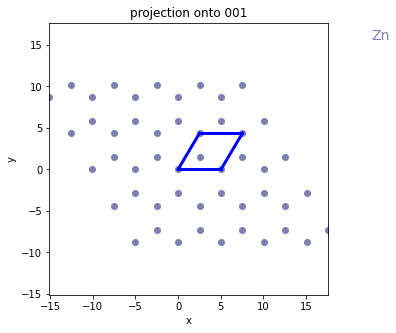

Calculating Properties of the Isolated Unit Cell
electrons 4.0     basis functions 8 

Sampling BZ in a 3 x 4 x 3 grid
Interpolating the 1st Brillouin zone to convert a 3 x 4 x 3 grid to a 9 x 10 x 10 grid
Locating the Fermi level
looking for Fermi level with 2.0 filled levels
average fermi level -11.23 eV
Calculating DOS
Calculation complete


In [31]:
plt.close('all')

print("PERIODIC EXTENDED HUCKEL THEORY",'\n')
print("A notebook for calculating DOS, PDOS and band structures for common inorganic solids",'\n')
print(list_of_structures)
title=input('name of input file (without .input extension)?')
while title not in crystal_dict:
    print("that is not in the library:")
    print('\n')
    print(list_of_structures)
    print('\n')
    title=input('name of input file (without .input extension)?  ')
    
input_from_file=False
input_from_library=True
cartesian=False
parameters=modified_Cerda
#parameter_file='parameters'
if input_from_file:
    a0,b0,c0,beta,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,\
    E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts=read_from_file(title,parameters)
elif input_from_library:
    a0,b0,c0,beta,crystal,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,\
    E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts=read_from_library(title,parameters,cartesian)
print('\n')
#~~~~~~~~~~~~~~~~~~~~~~~~~HERE IS THE WORKFLOW~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
#read from dictionaries and 
#set up lattice vectors, reciprocal lattice vectors, displacements, coordinates etc

print('\n')
print("###############################################")
print("Starting the periodic calculation")
a,b,c,A,B,C,atoms,coords_in_angstrom,coords_in_au,element_coord,Q,displacements,BZ_path,BZ_labels,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,\
DOS_min,DOS_max,E_pts,symmetry,d1,d2,d3,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts\
=setup(cartesian,a0,b0,c0,beta,title,symmetry,atoms,Q,coords,nptsx,nptsy,nptsz,interp_pointsx,interp_pointsy,interp_pointsz,span,DOS_min,DOS_max,E_pts,plot_all,plot_DOS,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,levels,offset,nneighbours,repeats,bloch_orbitals,bloch_kpts)
print("Structure projected onto the 001 plane")
unit_cell_2d(title,a0,b0,c0,a,b,c,coords_in_au,atoms,d1,d2,d3,repeats,symmetry)
#calculate an isolated unit cell. There is not much value in this, but I need the S and H matrices for later, so may as well diagonalise it.
S,H,eh_basis_functs,bf_index,coeff,no_electrons,emin=isolated_unit_cell(coords_in_au,atoms,element_coord,parameters,parameter_file,Q,dist_cutoff,title,WH)
#print(eh_basis_functs)
#calculate the S and H matrices for extensions along the displacement coordinates.
map_S,map_H,map_S_tran,map_H_tran=extended_S_and_H(coords_in_au,atoms,displacements,parameters,dist_cutoff,eh_basis_functs,WH)
#define a 3d grid of kx,ky,kz covering the symmetry-unique portion of the BZ 
print("Sampling BZ in a",nptsx,"x",nptsy,"x",nptsz,"grid")
kx,ky,kz=define_BZ(symmetry,A,B,C,nptsx,nptsy,nptsz,d1,d2,d3)
#and solve at range of kpoints defined by kx,ky,kz
all_energies,all_pts_x,all_pts_y,all_pts_z,all_contributions,all_coop,all_pts=full_BZ_sample(kx,ky,kz,nptsx,nptsy,nptsz,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,symmetry,eh_basis_functs,plot_COOP,d1,d2,d3)
#do some interpolation
if interpolate_flag:
    print("Interpolating the 1st Brillouin zone to convert a",nptsx,"x",nptsy,"x",nptsz,"grid to a",interp_pointsx,"x",interp_pointsy,"x",interp_pointsz,"grid") 
    all_energies,all_pts_interp=interpolate_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_energies,eh_basis_functs,d1,d2,d3)
    if PDOS_by_basis_funct or PDOS_by_atom or PDOS_by_atom_and_l:
        all_contributions=interpolate_contributions_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_contributions,eh_basis_functs,d1,d2,d3)
    if plot_COOP:
        all_coop=interpolate_coop_BZ(interp_pointsx,interp_pointsy,interp_pointsz,kx,ky,kz,all_coop,eh_basis_functs)
#find the Fermi level
print("Locating the Fermi level")
Energy_range,states,proj_states,coops,average_Fermi_level=fermi_level(all_energies,E_pts,emin-10,DOS_min,DOS_max,all_contributions,eh_basis_functs,plot_COOP,mesh,span,no_electrons)
#calulate the DOS and PDOS
print("Calculating DOS")
Energy_range_DOS,DOS,all_PDOS,pdos_summed_over_atoms,pdos_summed_over_atoms_and_l,unique_elements=DOS(states,proj_states,Energy_range,eh_basis_functs,atoms)
if plot_COOP:
    print("Calculating COOP")
    Energy_range_COOP,all_COOP=COOP(coops,Energy_range)
print("Calculation complete")

do you want to plot the DOS?  Y/N  Y
DOS plots: the default settings are:


Plotting DOS projected onto all atoms


plotting total DOS and DOS projected onto separate angular momenta of each atom 
plot window:  -20.0 eV to  0.0 eV in  250  steps 



do you want to change the DOS plotting options?  Y/N  N


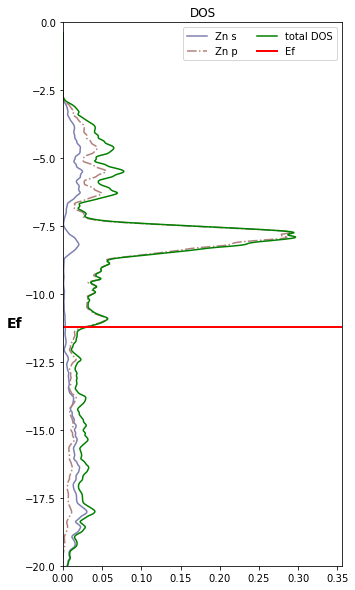

In [32]:
#~~~~~~~~~~~~~~~~~~~~~~~NOW PLOT THE DOS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
make_DOS=input('do you want to plot the DOS?  Y/N  ')
if make_DOS=='Y':
    plot_DOS==True
    print("DOS plots: the default settings are:")
    print('\n')
    print('Plotting DOS projected onto all atoms')
    print('\n')
    if PDOS_by_atom==True:
        print("plotting total DOS and DOS projected onto separate atoms ")
    elif PDOS_by_atom_and_l==True:
        print("plotting total DOS and DOS projected onto separate angular momenta of each atom ")
    elif PDOS_by_basis_funct==True:
        print("plotting total DOS and DOS projected onto separate orbitals of each atom ")    
    print("plot window: ", float(DOS_min),"eV to ",float(DOS_max),"eV in ",E_pts,' steps','\n')
    print('\n')          
    OK=input('do you want to change the DOS plotting options?  Y/N  ') 
    new_DOS_min=DOS_min;new_DOS_max=DOS_max;new_E_pts=E_pts  #initialise at original values
    elements_to_plot=list(set(atoms)) #plot all atoms by default
    total_DOS_plot=True
    while OK=='Y' or OK=='y':
        print('\n')
        element_choice=input("restrict plots to a subset of element types: input a comma separated list of integers, or return to continue  "  )
        if element_choice:
            elements_to_plot=[int(s) for s in element_choice.split(',')]    
        
        print('\n')
        print("1 to plot PDOS projected onto atoms") 
        print("2 for PDOS projected onto separate angular momentum components, l")
        print("3 to plot PDOS projected onto separate ml")
        print("10 to exit  "  )
        plot_choice=int(input("type an integer, 1, 2 or 3  "  ))
        #print(plot_choice)
        if plot_choice==1:
            PDOS_by_atom=True;PDOS_by_atom_and_l=False;PDOS_by_basis_funct=False      #project DOS onto atoms
        elif plot_choice==2:
            PDOS_by_atom=False;PDOS_by_atom_and_l=True;PDOS_by_basis_funct=False      #project DOS onto atoms
        elif plot_choice==3:
            PDOS_by_atom=False;PDOS_by_atom_and_l=False;PDOS_by_basis_funct=True      #project DOS onto atoms
        elif plot_choice==10:
            break
        print('\n')
        print("input new plot range:  Emin, Emax, in units of eV "  )
        print('\n')
        range_choice=input("enter a comma separated list of floats or hit return if default values are OK  "  )
        if range_choice:
            new_DOS_min,new_DOS_max=[float(s) for s in range_choice.split(',')]
        print('\n')
        #print(new_DOS_min,new_DOS_max)
        print("input number of steps for the energy scan (more will give a better sample but may be noisy)")
        steps=input("input an integer or hit return if default value is OK  "  )
        if steps:
            new_E_pts=int(steps)
        print('\n')
        print("new plot range: ", new_DOS_min,"eV to ",new_DOS_max,"eV in ",E_pts,' steps','\n')
        print('\n')
        
        total_DOS=input("do you want to plot the total DOS? Y or N. Default is Y "  )
        if total_DOS==('N' or 'n'):
            total_DOS_plot=False
        OK=input('do you want to change anything else?  Y/N  ') 
        print('\n')

    DOS_plot(total_DOS_plot,elements_to_plot,DOS,Energy_range_DOS,new_E_pts,PDOS_by_atom,PDOS_by_atom_and_l,PDOS_by_basis_funct,all_PDOS,pdos_summed_over_atoms,pdos_summed_over_atoms_and_l,unique_elements,average_Fermi_level,new_DOS_min,new_DOS_max)  

In [33]:
#special points used earlier on, converted to a dictionary
from fractions import Fraction

special_point_dictionary={"t":{"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"R":[0.5,0.0,0.5],"M":[0.5,0.5,0.],"A":[0.5,0.5,0.5],"Z":[0.,0.,0.5]},
                         "c":{"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"M":[0.5,0.5,0.],"R":[0.5,0.5,0.5]},
                         "o":{"gamma":[0.,0.,0.],"X":[0.5,0.,0.],"Y":[0.,0.5,0.],"Z":[0.0,0.0,0.5],"T":[0.0,0.5,0.5],"U":[0.5,0.0,0.5],"S":[0.5,0.5,0.],"R":[0.5,0.5,0.5]},
                         "fcc":{"gamma":[0.,0.,0.],"X":[0,1/2,1/2],"L":[1/2,1/2,1/2],"W":[1/4,3/4,1/2],"U":[5/8,1/4,5/8],"K":[3/8,3/8,3/4]},
                         "bcc":{"gamma":[0.,0.,0.],"N":[0,0,1/2],"P":[1/4,1/4,1/4],"H":[-1/2,1/2,1/2]},
                         "h":{"gamma":[0.,0.,0.],"K":[2/3,-1/3,0.],"A":[0,0,1/2],"H":[2/3,-1/3,1/2],"M":[1/2,0,0],"L":[1/2,0,1/2]},
                         "m":{"gamma":[0.,0.,0.],"Z":[0,1/2,0],"B":[1/2,0,0],"Y":[0,0,1/2],"C":[0,1/2,1/2],"D":[1/2,1/2,0],"A":[1/2,0,-1/2]},
                         "d1":{"gamma":[0,0,0],"X":[0,0,1/2]},
                         "d2_square":{"gamma":[0,0,0],"X":[0,1/2,0],"M":[1/2,1/2,0]},
                         "d2_h":{"gamma":[0,0,0],"K":[2/3,-1/3,0],"M":[1/2,0,0]}}

#can't use a number as start of dictionary key, si I need to redefine some symmetries
if symmetry=="2d_h":
    symmetry="d2_h"
elif symmetry=="2d_square":
    symmetry="d2_square"
elif symmetry=="1d":
    symmetry="d1"


make_band=input('do you want to plot the band structure? Y/N   ')
if make_band=='Y':
    BZ_labels_to_print=[]
    #print(BZ_labels)
    for item in BZ_labels:
        if item=='$\\Gamma$':
            BZ_labels_to_print.append('\N{greek capital letter gamma}')
            BZ_labels_to_print.append("➜")
        elif item=='$\\Pi$/a':
            BZ_labels_to_print.append('\N{greek capital letter pi}/a')
            BZ_labels_to_print.append("➜")
        else:
            BZ_labels_to_print.append(item)
            BZ_labels_to_print.append("➜")
    print('\n')
    print("The default path through the Brillouin zone is:" )
    print(*BZ_labels_to_print[:-1])   #the final arrow is removed
    print('\n')
    special_points=special_point_dictionary[symmetry]
    special_kpoints=[]
    for key in special_points:
        fractional_list=[]
        for item in special_points[key]:
            frac=str(Fraction(item).limit_denominator())
            fractional_list.append(frac)
        special_kpoints.append((key,fractional_list))
        #special_kpointsf.append((key,fractional_list))
    #print(special_kpointsf)
    print("The available special kpoints are:" )
    list_of_special_points=[]
    for item in special_kpoints:
        if item[0]=="gamma":
            print('\N{greek capital letter gamma}','[',', '.join(item[1]),']')
        else:
            print(item[0],'[',', '.join(item[1]),']')
        list_of_special_points.append(item[0])
    print('\n')
    new_kpt_labels=[];new_kpt_keys=[]
    kpt_choice=input('input a special point, gamma, A, X etc or hit return to finish  ') 
    while kpt_choice:
        if kpt_choice not in list_of_special_points:
            print('that is not one of the special points  ')
        elif kpt_choice=="gamma":
            new_kpt_keys.append("gamma")
            new_kpt_labels.append('$\\Gamma$')                
        else:
            new_kpt_labels.append(kpt_choice)
            new_kpt_keys.append(kpt_choice)
        kpt_choice=str(input("input another point of return to finish  "  ))
    if new_kpt_keys:
        new_kpt_coords=[]
        for item in new_kpt_keys:
            new_kpt_coords.append(special_points[item])
        final_BZ_path=new_kpt_coords;final_BZ_labels=new_kpt_labels    
    else:
        final_BZ_path=BZ_path;final_BZ_labels=BZ_labels
    
    final_BZ_labels_to_print=[]
    for item in final_BZ_labels:
        if item=='$\\Gamma$':
            final_BZ_labels_to_print.append('\N{greek capital letter gamma}')
            final_BZ_labels_to_print.append("➜")
        elif item=='$\\Pi$/a':
            final_BZ_labels_to_print.append('\N{greek capital letter pi}/a')
            final_BZ_labels_to_print.append("➜")
        else:
            final_BZ_labels_to_print.append(item)
            final_BZ_labels_to_print.append("➜")
    print('\n')
    print("The final path through the Brillouin zone is:" )
    
    print(*final_BZ_labels_to_print[:-1])   #the final arrow is removed
    print('\n')
    
    Band_structure_plot(eh_basis_functs,final_BZ_path,final_BZ_labels,S,map_S,map_S_tran,H,map_H,map_H_tran,A,B,C,a,b,c,displacements,no_electrons,npts_line,DOS_min,DOS_max,average_Fermi_level,d1,d2,d3)


do you want to plot the band structure? Y/N   N
